# Projek Akhir Visualisasi Data
---
Kelompok 4 VD A
Anggota:
- Riza Setiawan Soetedjo (195150207111062)
- Andriko Fajar Prakoso (195150200111073)
- Lenny Raufi Syafitri (195150201111011)

# Persiapan Environment

## Import Library

Melakukan import untuk library-library yang akan digunakan pada Colab ini. 

**PENTING**: Setelah perintah pip install, restart runtime kemudian run ulang lagi Colabnya

In [ ]:
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

## Extract Data

Proses untuk memasukkan dataset [Students Adaptability Level in Online Education](https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education) ke dalam Colab menggunakan API dari kaggle

In [ ]:
key = {"username":"rizastwn","key":"0327b40f2fdff1517d37c62424548c47"}
with open('kaggle.json', 'w') as json_file:
    json.dump(key, json_file)

In [ ]:
!pip install kaggle
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download mdmahmudulhasansuzan/students-adaptability-level-in-online-education
!ls
!unzip \*.zip  && rm *.zip
!ls

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
rm: cannot remove '/root/.kaggle': No such file or directory
  0% 0.00/6.43k [00:00<?, ?B/s]
100% 6.43k/6.43k [00:00<00:00, 4.66MB/s]
kaggle.json  sample_data  students-adaptability-level-in-online-education.zip
Archive:  students-adaptability-level-in-online-education.zip
  inflating: students_adaptability_level_online_education.csv  
kaggle.json  sample_data  students_adaptability_level_online_education.csv


# Deskripsi Data

Dataset Students Adaptability Level in Online Education membahas tentang efektivitas dari pendidikan online sejak pandemi. Data ini dikumpulkan secara online dan offline melalui survey ke beberapa siswa di beberapa tingkatan. Total data yang diperoleh adalah **1205 siswa** dari 10 Desember 2020 hingga 5 Februari 2021. Data ini memiliki **13 fitur dan 1 label**. Semua fitur dari dataset ini merupakan **data kategorikal**. 

Pada cell di bawah, terdapat *data dictionary* atau kamus data yang akan menampilkan informasi umum untuk setiap fitur yang ada.

Data Dictionary

| No. 	| Nama Fitur          	| Tipe Data 	| Satuan/Unit                           	| Deskripsi Data                                           	| Contoh Data 	|
|-----	|---------------------	|-----------	|---------------------------------------	|----------------------------------------------------------	|-------------	|
| 1.  	| Gender              	| string    	| Boy atau Girl                         	| Jenis kelamin siswa                                      	| Boy         	|
| 2.  	| Age                 	| string    	| Rentang usia setiap 5 tahun dari 1-30 	| Rentang usia siswa                                       	| 1-5         	|
| 3.  	| Education Level     	| string    	| College, School, atau University      	| Tingkat institusi pendidikan                             	| School      	|
| 4.  	| Institution Type    	| string    	| Non Government atau Government        	| Jenis institusi pendidikan                               	| Government  	|
| 5.  	| IT Student          	| string    	| Yes atau No                           	| Belajar sebagai siswa IT atau tidak                      	| Yes         	|
| 6.  	| Location            	| string    	| Yes atau No                           	| Apakah lokasi siswa di kota?                             	| Yes         	|
| 7.  	| Load-shedding       	| string    	| Low atau High                         	| Tingkat pelepasan beban                                  	| Low         	|
| 8.  	| Financial Condition 	| string    	| Mid, Poor, atau Rich                  	| Kondisi keuangan keluarga                                	| Mid         	|
| 9.  	| Internet Type       	| string    	| Mobile Data atau Wifi                 	| Jenis internet yang paling banyak digunakan di perangkat 	| Wifi        	|
| 10. 	| Network Type        	| string    	| 2G, 3G, atau 4G                       	| Jenis konektivitas jaringan                              	| 2G          	|
| 11. 	| Class Duration      	| string    	| 0, 1-3, atau 3-6                      	| Durasi kelas harian                                      	| 0           	|
| 12. 	| Self Lms            	| string    	| Yes atau No                           	| Ketersediaan LMS milik institusi                         	| Yes         	|
| 13. 	| Device              	| string    	| Computer, Mobile, atau Tab            	| Perangkat yang paling sering digunakan di kelas          	| Mobile      	|
| 14. 	| Adaptivity Level    	| string    	| High, Low, Moderate                   	| Label tingkat kemampuan beradaptasi siswa                	| Low         	|




# Exploratory Data Analysis

Dataset dimuat sebagai dataframe dengan menggunakan fungsi `read_csv()` dari library pandas

In [ ]:
df_eda = pd.read_csv("students_adaptability_level_online_education.csv")
df_eda.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


Mencetak nama kolom yang terdapat pada dataframe

In [ ]:
print(df_eda.columns)

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')


Dataframe berukuran 1205 x 14 atau dengan kata lain terdapat 1205 baris serta 14 kolom

In [ ]:
df_eda.shape

(1205, 14)

Cell ini akan mencetak deskripsi statistik dataframe. Dikarenakan `df_eda` merupakan dataset kategorikal, maka fungsi `describe()` hanya menunjukkan banyak data, banyak data unik, kategori terbanyak dan frekuensinya. 

In [ ]:
df_eda.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


Cell ini mengubah nama kolom `Location` menjadi `Is City` agar lebih sesuai dengan tujuan dari kolom ini.

In [ ]:
df_eda = df_eda.rename({'Location':'Is City'},axis=1)

Cell ini mengecek apakah terdapat nilai yang null dengan menggunakan fungsi `isnull()`. Ternyata, tidak terdapat data yang null 

In [ ]:
df_eda.isnull().any()

Gender                 False
Age                    False
Education Level        False
Institution Type       False
IT Student             False
Is City                False
Load-shedding          False
Financial Condition    False
Internet Type          False
Network Type           False
Class Duration         False
Self Lms               False
Device                 False
Adaptivity Level       False
dtype: bool

Cell ini mengecek nilai unik yang terdapat pada masing-masing kolom.

In [ ]:
columns = df_eda.columns
values = {}
for col in columns:
  values[col] = np.unique(df_eda[col])
print(values)

{'Gender': array(['Boy', 'Girl'], dtype=object), 'Age': array(['1-5', '11-15', '16-20', '21-25', '26-30', '6-10'], dtype=object), 'Education Level': array(['College', 'School', 'University'], dtype=object), 'Institution Type': array(['Government', 'Non Government'], dtype=object), 'IT Student': array(['No', 'Yes'], dtype=object), 'Is City': array(['No', 'Yes'], dtype=object), 'Load-shedding': array(['High', 'Low'], dtype=object), 'Financial Condition': array(['Mid', 'Poor', 'Rich'], dtype=object), 'Internet Type': array(['Mobile Data', 'Wifi'], dtype=object), 'Network Type': array(['2G', '3G', '4G'], dtype=object), 'Class Duration': array(['0', '1-3', '3-6'], dtype=object), 'Self Lms': array(['No', 'Yes'], dtype=object), 'Device': array(['Computer', 'Mobile', 'Tab'], dtype=object), 'Adaptivity Level': array(['High', 'Low', 'Moderate'], dtype=object)}


## Method Pembantu

Fungsi-fungsi berikut digunakan hanya untuk memudahkan EDA yang dilakukan secara repetitif.

In [ ]:
#Function pembantu
def cetakPersentase(kategori, isi):
  print(f'Persentase {kategori} pada {isi}:')
  for el in df_eda[kategori].unique():
    total_el = df_eda.loc[df_eda[kategori]==el ,isi].count()
    rata = round(total_el/df_eda.shape[0]*100,2)
    rasio_cat = [f"{label}:{round(df_eda.loc[(df_eda[kategori]==el) & (df_eda[isi]==label) ,isi].count()/total_el*100,2)}% ({df_eda.loc[(df_eda[kategori]==el) & (df_eda[isi]==label) ,isi].count()}/{total_el})" for label in df_eda[isi].unique()]
    print(f'{el}: {rata}% ({total_el}/{df_eda.shape[0]}) [{", ".join(rasio_cat)}]')

def cetakBar(kategori, legenda):
  n = df_eda[kategori].unique()
  label = df_eda[legenda].unique()
  axs = np.arange(len(n))
  label_count = {x:[df_eda.loc[(df_eda[kategori]==y) & (df_eda[legenda]==x),kategori].count() for y in n] for x in label}
  jarak = 0.2*min(len(n),len(label))/(len(label)-1)
  awal = -0.1*min(len(n),len(label))
  for key,val in label_count.items():
    # print(awal,jarak)
    p = plt.bar(axs + (awal), val, jarak, label = key)
    plt.bar_label(p)
    awal +=jarak
  plt.xticks(axs,n)
  plt.legend()
  plt.xlabel(kategori)
  plt.ylabel('Count')
  plt.title(f'Bar chart {kategori} berdasarkan {legenda}')
  plt.show()

def cetakPie(kategori, size, title):
  plt.figure(figsize=size)
  plt.pie(df_eda[kategori].value_counts(),autopct='%.1f',labels=df_eda[kategori].value_counts().keys())
  plt.title(title)
  plt.show()

## EDA 1 Fitur

EDA berikut lebih fokus untuk melihat proporsi dari nilai-nilai unik pada tiap-tiap fitur dan label.

Cell dibawah menunjukkan bahwa label dari data ini memiliki 3 nilai unik yang **imbalance** sehingga pada saat tahap preprocessing, ketidakseimbangan antar jumlah nilai unik harus diatasi.

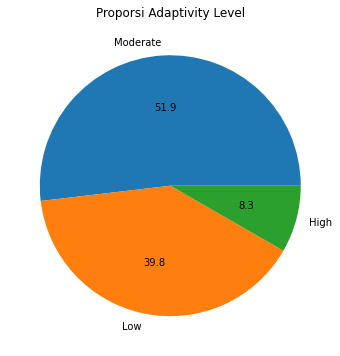

In [ ]:
#Adaptivity Level
cetakPie('Adaptivity Level',(8,6), 'Proporsi Adaptivity Level')

Cell dibawah menunjukkan bahwa proporsi antara laki-laki dan perempuan memiliki sedikit imbalance tetapi hanya selisih yang kecil.

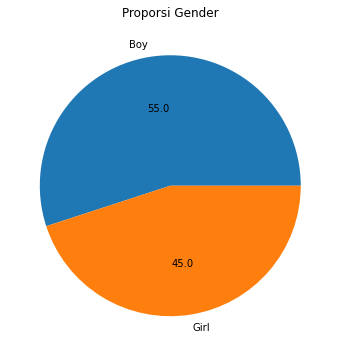

In [ ]:
#Gender
cetakPie('Gender',(8,6), 'Proporsi Gender')

Cell dibawah menunjukkan 2 grafik yaitu bar chart yang diurutkan sesuai umurnya agar terlihat seperti histogram dan proporsi dari tiap kategori range umur. Dapat disimpulkan bahwa umur 11 - 25 menjadi umur siswa yang dominan pada data ini.

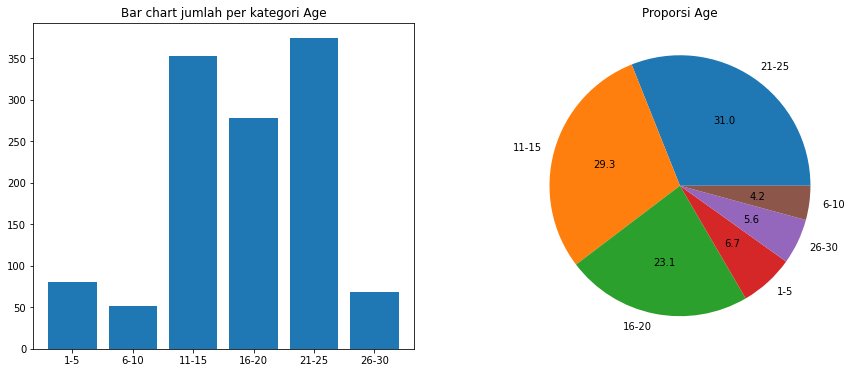

In [ ]:
#Age
fig,(ax1,ax2) = plt.subplots(1,2)
df_eda['Age'].value_counts().sort_index(key=lambda x: [int(y[0]) for y in x.str.split('-')]).plot(kind='bar',width=0.8, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=0)
ax1.set_title('Bar chart jumlah per kategori Age')
ax2.pie(df_eda['Age'].value_counts(),autopct='%.1f',labels=df_eda['Age'].value_counts().keys())
ax2.set_title('Proporsi Age')
fig.set_size_inches(15,6)
plt.show()

Cell dibawah menunjukkan bahwa proporsi antara tingkatan pendidikan memiliki imbalance, terutama jumlah data `College` dibanding tingkatan lain.

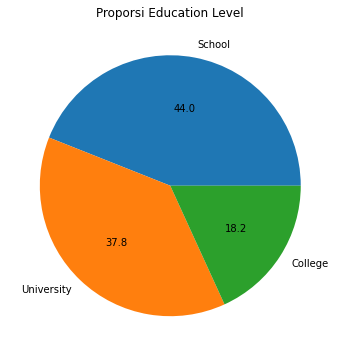

In [ ]:
#Education Level
cetakPie('Education Level',(8,6), 'Proporsi Education Level')

Cell dibawah menunjukkan bahwa proporsi antara tipe institusi pendidikan memiliki imbalance, terutama selisih yang cukup jauh antara institusi swasta dan institusi negeri/pemerintah.

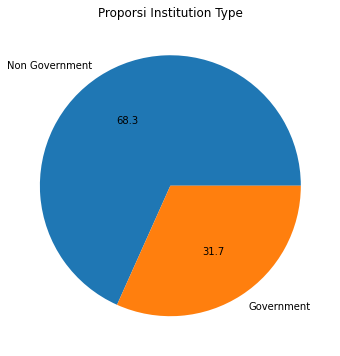

In [ ]:
#Institution Type
cetakPie('Institution Type',(8,6), 'Proporsi Institution Type')

Cell dibawah menunjukkan bahwa proporsi antara siswa di bidang IT dan non IT memiliki imbalance yang cukup besar.

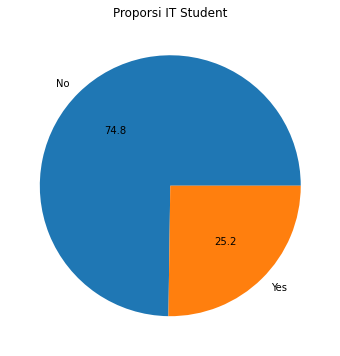

In [ ]:
#IT Student
cetakPie('IT Student',(8,6), 'Proporsi IT Student')

Cell dibawah menunjukkan bahwa proporsi antara siswa yang tinggal di kota dan non kota memiliki imbalance yang cukup besar.

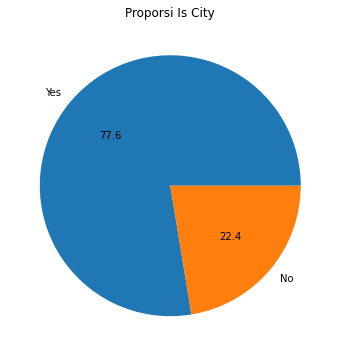

In [ ]:
#Is City
cetakPie('Is City',(8,6), 'Proporsi Is City')

Cell dibawah menunjukkan bahwa proporsi antara siswa yang memiliki tingkat pelepasan stres/beban rendah dan yang tinggi memiliki imbalance yang sangat besar.

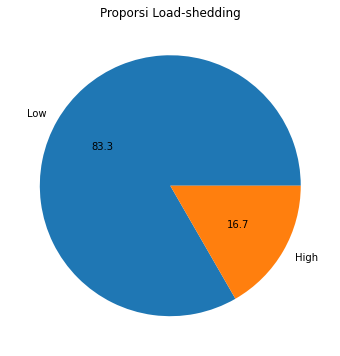

In [ ]:
#Load-shedding
cetakPie('Load-shedding',(8,6), 'Proporsi Load-shedding')

Cell dibawah menunjukkan bahwa proporsi antara kondisi keuangan siswa didominasi oleh kondisi keuangan `Mid` yang dilanjutkan oleh `Poor` kemudian `Rich`.

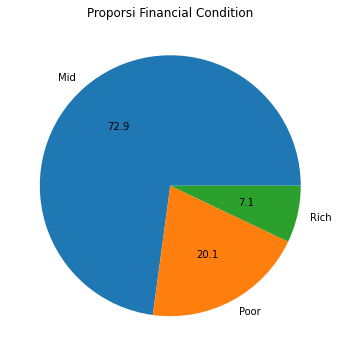

In [ ]:
#Financial Condition
cetakPie('Financial Condition',(8,6), 'Proporsi Financial Condition')

Cell dibawah menunjukkan bahwa proporsi antara tipe internet memiliki sedikit imbalance dan lebih banyak siswa yang menggunakan `Mobile Data`

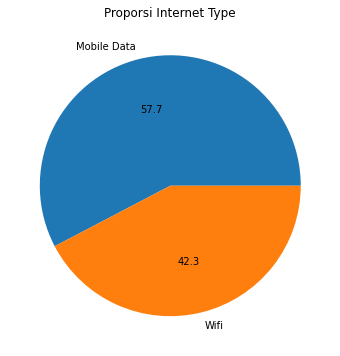

In [ ]:
#Internet Type
cetakPie('Internet Type',(8,6), 'Proporsi Internet Type')

Cell dibawah menunjukkan bahwa proporsi antara tipe jaringan memiliki imbalance yang besar dimana jumlah siswa yang menggunakan jaringan `4G` mendominasi yang kemudian dilanjutkan oleh jaringan `3G` dan masih ada beberapa siswa yang menggunakan `2G`.

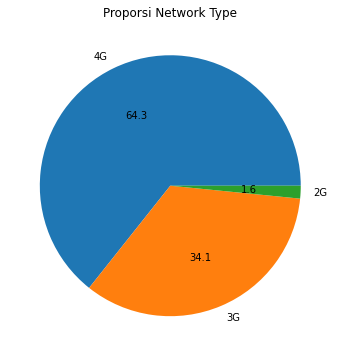

In [ ]:
#Network Type
cetakPie('Network Type',(8,6), 'Proporsi Network Type')

Cell dibawah menunjukkan bahwa proporsi antar durasi kelas didominasi oleh `1-3` jam dan dilanjutkan oleh `3-6` jam dan kemudian `0` jam.

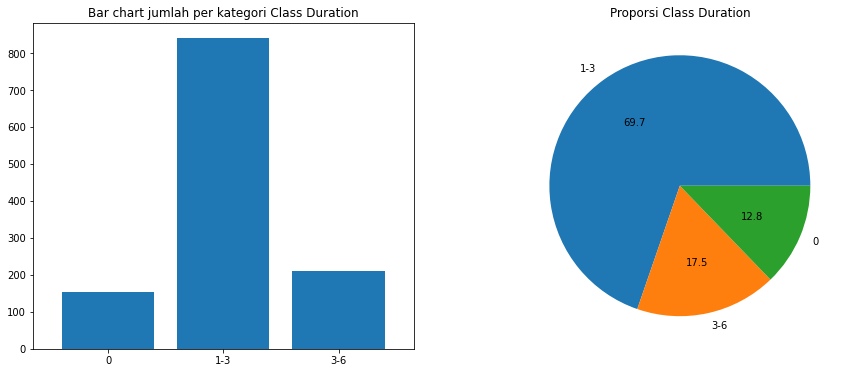

In [ ]:
#Class Duration
fig,(ax1,ax2) = plt.subplots(1,2)
df_eda['Class Duration'].value_counts().sort_index(key=lambda x: [int(y[0]) for y in x.str.split('-')]).plot(kind='bar',width=0.8, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=0)
ax1.set_title('Bar chart jumlah per kategori Class Duration')
ax2.pie(df_eda['Class Duration'].value_counts(),autopct='%.1f',labels=df_eda['Class Duration'].value_counts().keys())
ax2.set_title('Proporsi Class Duration')
fig.set_size_inches(15,6)
plt.show()

Cell dibawah menunjukkan bahwa proporsi institusi yang memiliki LMS sendiri masih sangat sedikit dibandingkan dengan institusi yang tidak punya.

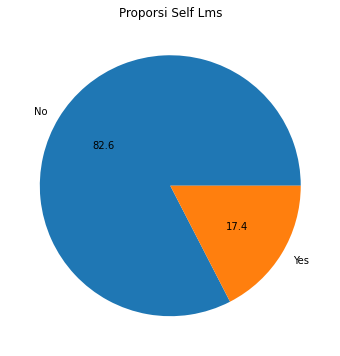

In [ ]:
#Self Lms
cetakPie('Self Lms',(8,6), 'Proporsi Self Lms')

Cell dibawah menunjukkan bahwa proporsi antara gadget memiliki imbalance yang besar dimana jumlah siswa yang menggunakan `Hp` mendominasi yang kemudian dilanjutkan oleh `Komputer` dan ada beberapa siswa yang menggunakan `Tab`.

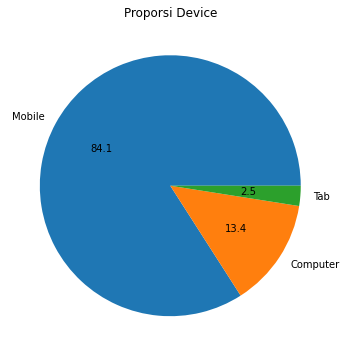

In [ ]:
#Device
cetakPie('Device',(8,6), 'Proporsi Device')

## EDA 2 Fitur

EDA berikut membuat Bar Chart dan mencetak persentase antar kombinasi 2 fitur yang berbeda. EDA berikut lebih fokus untuk melihat informasi yang bisa didapatkan antar 2 fitur secara sekilas. Ada kemungkinan adanya lebih dari 1 informasi yang sama pada 2 bagian yang berbeda.

### Adaptivity Level

Informasi yang diperoleh

- Laki-laki memiliki adaptivity level yang lebih tinggi daripada perempuan, hal ini dibuktikan bahwa 10.71% laki-laki memiliki adaptivity level high sedangkan perempuan hanya 5.35% dan hanya 36.95% laki-laki memiliki adaptivity level low sedangkan perempuan memiliki 43.46%.
- Pada Age 1-5 tidak ada siswa yang memiliki high adaptivity level (tidak tahu bgmn cara mereka melakukan survey pada anak umur 1-5)
- Pada umur 16-20 dan 26-30, level dengan jumlah siswa terbanyak adalah low. Utamanya pada umur 16-20, siswa dengan adaptivity level high sangatlah sedikit yaitu hanya 1.8% saja.
- Siswa di tingkat edukasi College memiliki adaptivity level terendah dikarenakan memiliki 54.79% memiliki level low dan hanya 1.37% yang memiliki level high
- Siswa yang berada di sekolah negeri lebih berkemungkinan untuk memiliki low adaptivity level dibanding sekolah swasta
- Siswa IT lebih berkemungkinan untuk memiliki adaptasi tinggi dibanding siswa non IT
-  Siswa yang tidak tinggal di daerah perkotaan lebih susah beradaptasi dibanding siswa yang tinggal di daerah perkotaan
- Siswa dengan tingkat pelepasan stres rendah memiliki tingkat adaptasi yang sedikit lebih tinggi dibanding dengan siswa dengan tingkat pelepasan stres tinggi
- Semakin bagus kondisi keuangan seorang siswa, maka semakin mudah siswa tersebut beradaptasi
- Internet type tidak terlalu memberi pengaruh ke tingkat adaptasi seorang siswa, tetapi tipe jaringan yang mereka gunakan memberi sedikit pengaruh yang mana semakin bagus jaringannnya maka semakin tinggi tingkat adaptasinya
- Walaupun kelasnya dalam bentuk online, siswa masih tetap memerlukan kelas secara sinkron agar dapat beradaptasi dengan lebih mudah
- Siswa yang sekolahnya memiliki self lms memiliki tingkat adaptasi yang sedikit lebih tinggi
- Kebanyakan siswa menggunakan hp untuk sarana pembelajaran mereka tetapi sarana yang memberikan tingkat adaptasi tertinggi adalah komputer

Persentase Gender pada Adaptivity Level:
Boy: 55.02% (663/1205) [Moderate:52.34% (347/663), Low:36.95% (245/663), High:10.71% (71/663)]
Girl: 44.98% (542/1205) [Moderate:51.29% (278/542), Low:43.36% (235/542), High:5.35% (29/542)]


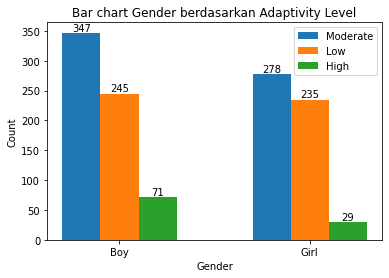

Persentase Age pada Adaptivity Level:
21-25: 31.04% (374/1205) [Moderate:52.67% (197/374), Low:37.17% (139/374), High:10.16% (38/374)]
16-20: 23.07% (278/1205) [Moderate:46.4% (129/278), Low:51.8% (144/278), High:1.8% (5/278)]
11-15: 29.29% (353/1205) [Moderate:58.07% (205/353), Low:33.99% (120/353), High:7.93% (28/353)]
26-30: 5.64% (68/1205) [Moderate:29.41% (20/68), Low:52.94% (36/68), High:17.65% (12/68)]
6-10: 4.23% (51/1205) [Moderate:19.61% (10/51), Low:47.06% (24/51), High:33.33% (17/51)]
1-5: 6.72% (81/1205) [Moderate:79.01% (64/81), Low:20.99% (17/81), High:0.0% (0/81)]


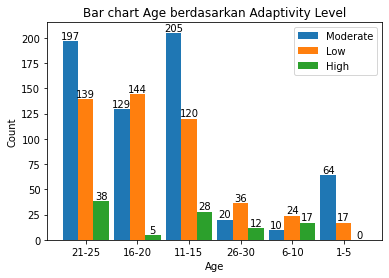

Persentase Education Level pada Adaptivity Level:
University: 37.84% (456/1205) [Moderate:50.0% (228/456), Low:39.04% (178/456), High:10.96% (50/456)]
College: 18.17% (219/1205) [Moderate:43.84% (96/219), Low:54.79% (120/219), High:1.37% (3/219)]
School: 43.98% (530/1205) [Moderate:56.79% (301/530), Low:34.34% (182/530), High:8.87% (47/530)]


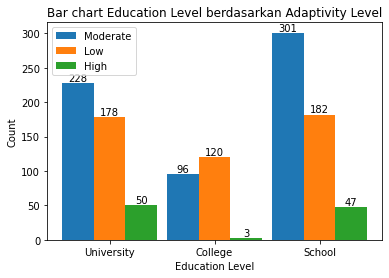

Persentase Institution Type pada Adaptivity Level:
Non Government: 68.3% (823/1205) [Moderate:60.39% (497/823), Low:29.89% (246/823), High:9.72% (80/823)]
Government: 31.7% (382/1205) [Moderate:33.51% (128/382), Low:61.26% (234/382), High:5.24% (20/382)]


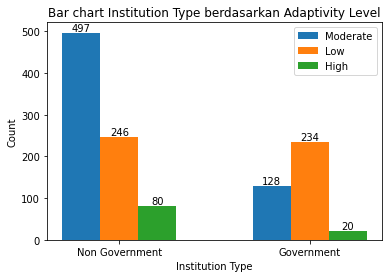

Persentase IT Student pada Adaptivity Level:
No: 74.77% (901/1205) [Moderate:49.17% (443/901), Low:43.4% (391/901), High:7.44% (67/901)]
Yes: 25.23% (304/1205) [Moderate:59.87% (182/304), Low:29.28% (89/304), High:10.86% (33/304)]


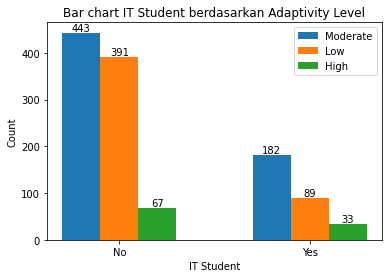

Persentase Is City pada Adaptivity Level:
Yes: 77.59% (935/1205) [Moderate:57.11% (534/935), Low:33.05% (309/935), High:9.84% (92/935)]
No: 22.41% (270/1205) [Moderate:33.7% (91/270), Low:63.33% (171/270), High:2.96% (8/270)]


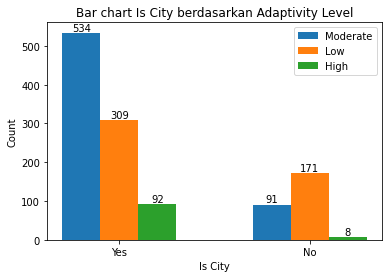

Persentase Load-shedding pada Adaptivity Level:
Low: 83.32% (1004/1205) [Moderate:53.49% (537/1004), Low:37.85% (380/1004), High:8.67% (87/1004)]
High: 16.68% (201/1205) [Moderate:43.78% (88/201), Low:49.75% (100/201), High:6.47% (13/201)]


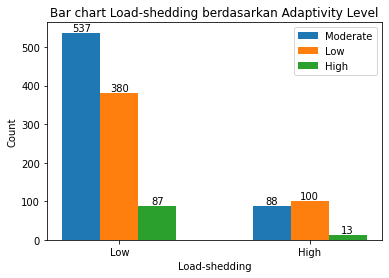

Persentase Financial Condition pada Adaptivity Level:
Mid: 72.86% (878/1205) [Moderate:57.06% (501/878), Low:38.84% (341/878), High:4.1% (36/878)]
Poor: 20.08% (242/1205) [Moderate:37.6% (91/242), Low:53.31% (129/242), High:9.09% (22/242)]
Rich: 7.05% (85/1205) [Moderate:38.82% (33/85), Low:11.76% (10/85), High:49.41% (42/85)]


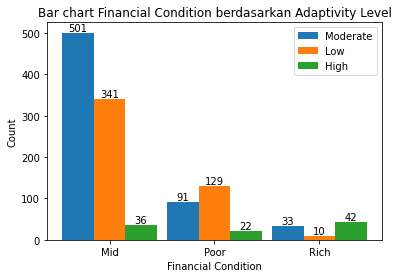

Persentase Internet Type pada Adaptivity Level:
Wifi: 42.32% (510/1205) [Moderate:49.8% (254/510), Low:37.65% (192/510), High:12.55% (64/510)]
Mobile Data: 57.68% (695/1205) [Moderate:53.38% (371/695), Low:41.44% (288/695), High:5.18% (36/695)]


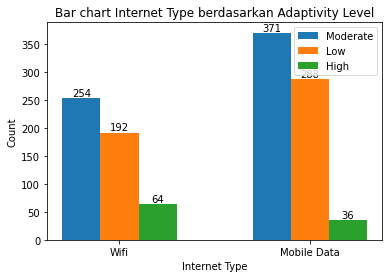

Persentase Network Type pada Adaptivity Level:
4G: 64.32% (775/1205) [Moderate:54.06% (419/775), Low:35.87% (278/775), High:10.06% (78/775)]
3G: 34.11% (411/1205) [Moderate:49.39% (203/411), Low:45.26% (186/411), High:5.35% (22/411)]
2G: 1.58% (19/1205) [Moderate:15.79% (3/19), Low:84.21% (16/19), High:0.0% (0/19)]


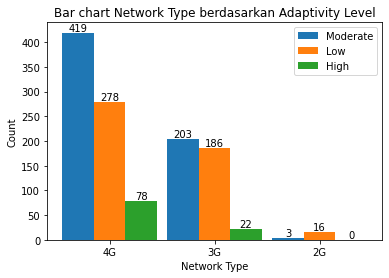

Persentase Class Duration pada Adaptivity Level:
3-6: 17.51% (211/1205) [Moderate:69.67% (147/211), Low:21.8% (46/211), High:8.53% (18/211)]
1-3: 69.71% (840/1205) [Moderate:55.71% (468/840), Low:34.52% (290/840), High:9.76% (82/840)]
0: 12.78% (154/1205) [Moderate:6.49% (10/154), Low:93.51% (144/154), High:0.0% (0/154)]


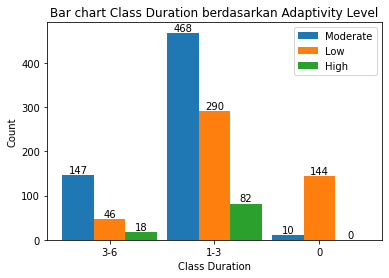

Persentase Self Lms pada Adaptivity Level:
No: 82.57% (995/1205) [Moderate:49.95% (497/995), Low:43.02% (428/995), High:7.04% (70/995)]
Yes: 17.43% (210/1205) [Moderate:60.95% (128/210), Low:24.76% (52/210), High:14.29% (30/210)]


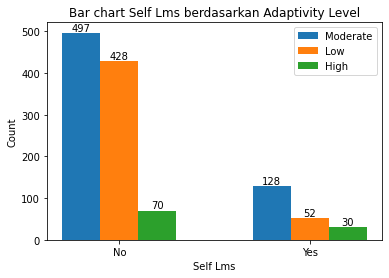

Persentase Device pada Adaptivity Level:
Tab: 2.49% (30/1205) [Moderate:86.67% (26/30), Low:6.67% (2/30), High:6.67% (2/30)]
Mobile: 84.07% (1013/1205) [Moderate:50.05% (507/1013), Low:43.24% (438/1013), High:6.71% (68/1013)]
Computer: 13.44% (162/1205) [Moderate:56.79% (92/162), Low:24.69% (40/162), High:18.52% (30/162)]


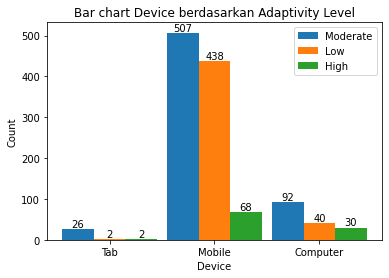

In [ ]:
#graf kotak antar categorical fitur dan label
for col in df_eda.columns[:-1]:
  cetakPersentase(col,'Adaptivity Level')
  cetakBar(col,'Adaptivity Level')

###Gender

Informasi yang diperoleh

- Rasio laki-laki lebih banyak dari perempuan ada pada umur 11-15,21-25, dan 26-30 sedangkan sebaliknya ada pada umur 1-5, 6-10, dan 16-20
- Perempuan lebih banyak melanjutkan pendidikannya ke College sedangkan laki-laki lebih banyak melanjutkan pendidikannya ke universitas
- Laki-laki mendominasi di kedua tipe sekolah baik negeri maupun swasta
- 75% siswa IT adalah laki-laki
- Tidak ada pengaruh tinggal di kota dan gender
- Tidak ada pengaruh pelepasan tingkat stres dan gender
- Tidak ada pengaruh kondisi keuangan dan gender
- Tidak ada pengaruh internet type dan gender
- Anehnya, pengguna 2G kebanyakan adalah perempuan
- Tidak ada pengaruh class duration dan gender
- Tidak ada pengaruh self lms dan gender
- 76% dari pengguna komputer adalah laki-laki

Persentase Age pada Gender:
21-25: 31.04% (374/1205) [Boy:70.86% (265/374), Girl:29.14% (109/374)]
16-20: 23.07% (278/1205) [Boy:39.21% (109/278), Girl:60.79% (169/278)]
11-15: 29.29% (353/1205) [Boy:59.77% (211/353), Girl:40.23% (142/353)]
26-30: 5.64% (68/1205) [Boy:61.76% (42/68), Girl:38.24% (26/68)]
6-10: 4.23% (51/1205) [Boy:43.14% (22/51), Girl:56.86% (29/51)]
1-5: 6.72% (81/1205) [Boy:17.28% (14/81), Girl:82.72% (67/81)]


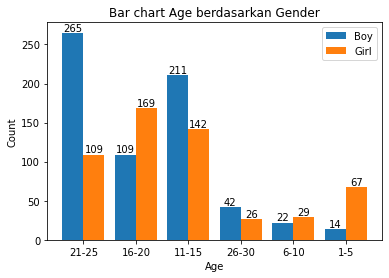

Persentase Education Level pada Gender:
University: 37.84% (456/1205) [Boy:66.67% (304/456), Girl:33.33% (152/456)]
College: 18.17% (219/1205) [Boy:40.18% (88/219), Girl:59.82% (131/219)]
School: 43.98% (530/1205) [Boy:51.13% (271/530), Girl:48.87% (259/530)]


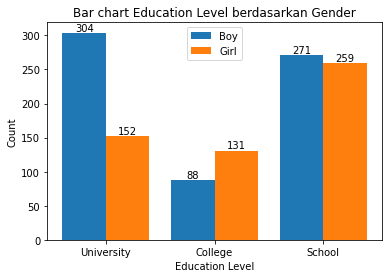

Persentase Institution Type pada Gender:
Non Government: 68.3% (823/1205) [Boy:51.4% (423/823), Girl:48.6% (400/823)]
Government: 31.7% (382/1205) [Boy:62.83% (240/382), Girl:37.17% (142/382)]


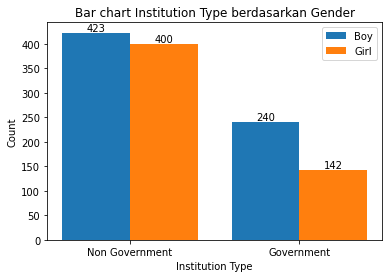

Persentase IT Student pada Gender:
No: 74.77% (901/1205) [Boy:48.28% (435/901), Girl:51.72% (466/901)]
Yes: 25.23% (304/1205) [Boy:75.0% (228/304), Girl:25.0% (76/304)]


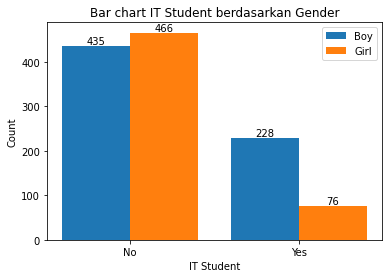

Persentase Is City pada Gender:
Yes: 77.59% (935/1205) [Boy:55.94% (523/935), Girl:44.06% (412/935)]
No: 22.41% (270/1205) [Boy:51.85% (140/270), Girl:48.15% (130/270)]


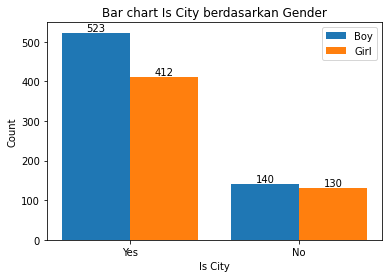

Persentase Load-shedding pada Gender:
Low: 83.32% (1004/1205) [Boy:53.69% (539/1004), Girl:46.31% (465/1004)]
High: 16.68% (201/1205) [Boy:61.69% (124/201), Girl:38.31% (77/201)]


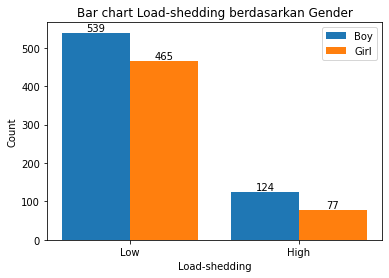

Persentase Financial Condition pada Gender:
Mid: 72.86% (878/1205) [Boy:54.9% (482/878), Girl:45.1% (396/878)]
Poor: 20.08% (242/1205) [Boy:53.31% (129/242), Girl:46.69% (113/242)]
Rich: 7.05% (85/1205) [Boy:61.18% (52/85), Girl:38.82% (33/85)]


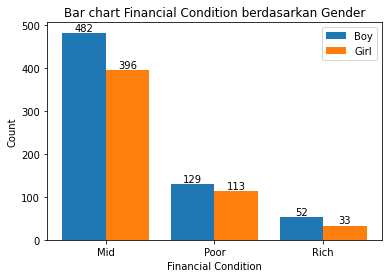

Persentase Internet Type pada Gender:
Wifi: 42.32% (510/1205) [Boy:56.27% (287/510), Girl:43.73% (223/510)]
Mobile Data: 57.68% (695/1205) [Boy:54.1% (376/695), Girl:45.9% (319/695)]


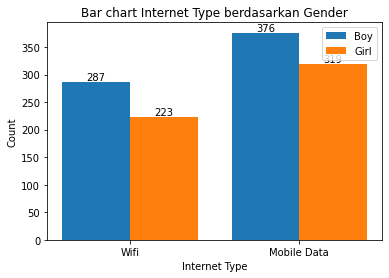

Persentase Network Type pada Gender:
4G: 64.32% (775/1205) [Boy:55.61% (431/775), Girl:44.39% (344/775)]
3G: 34.11% (411/1205) [Boy:55.23% (227/411), Girl:44.77% (184/411)]
2G: 1.58% (19/1205) [Boy:26.32% (5/19), Girl:73.68% (14/19)]


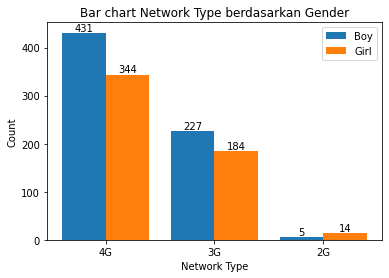

Persentase Class Duration pada Gender:
3-6: 17.51% (211/1205) [Boy:61.61% (130/211), Girl:38.39% (81/211)]
1-3: 69.71% (840/1205) [Boy:53.1% (446/840), Girl:46.9% (394/840)]
0: 12.78% (154/1205) [Boy:56.49% (87/154), Girl:43.51% (67/154)]


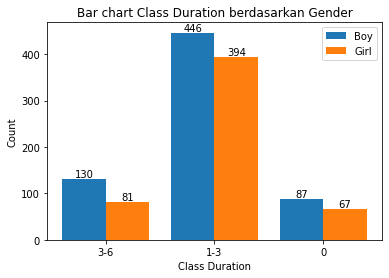

Persentase Self Lms pada Gender:
No: 82.57% (995/1205) [Boy:51.86% (516/995), Girl:48.14% (479/995)]
Yes: 17.43% (210/1205) [Boy:70.0% (147/210), Girl:30.0% (63/210)]


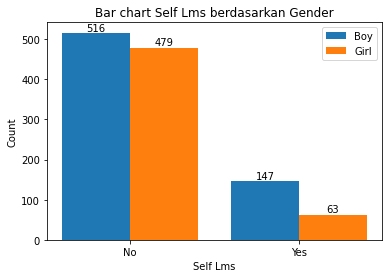

Persentase Device pada Gender:
Tab: 2.49% (30/1205) [Boy:63.33% (19/30), Girl:36.67% (11/30)]
Mobile: 84.07% (1013/1205) [Boy:51.33% (520/1013), Girl:48.67% (493/1013)]
Computer: 13.44% (162/1205) [Boy:76.54% (124/162), Girl:23.46% (38/162)]


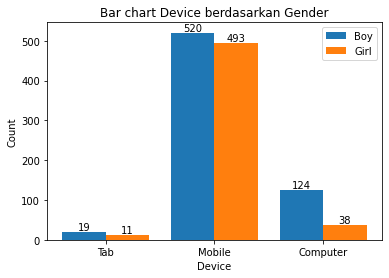

Persentase Adaptivity Level pada Gender:
Moderate: 51.87% (625/1205) [Boy:55.52% (347/625), Girl:44.48% (278/625)]
Low: 39.83% (480/1205) [Boy:51.04% (245/480), Girl:48.96% (235/480)]
High: 8.3% (100/1205) [Boy:71.0% (71/100), Girl:29.0% (29/100)]


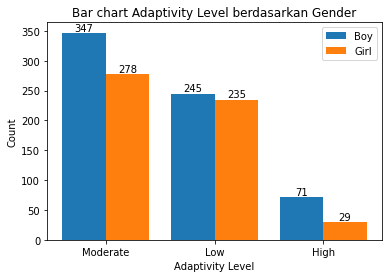

In [ ]:
for col in [x for x in df_eda.columns if x != 'Gender']:
  cetakPersentase(col,'Gender')
  cetakBar(col,'Gender')

###Age

Informasi yang diperoleh

- Laki-laki yang paling banyak diambil datanya ada pada umur 11-15 dan 21-25 sedangkan perempuan pada umur 11-15 dan 16-20
- Umur kebanyakan siswa pada tingkat sekolah yaitu 11-15, tingkat college yaitu 16-20, dan tingkat universitas yaitu 21-25
- Umur kebanyakan siswa pada sekolah swasta adalah 11-15 dan 21-25 sedangkan pada sekolah negeri adalah 16-20 dan 21-25
- Walaupun kebanyakan siswa IT ada pada umur 21-25, terdapat juga siswa IT pada umur 11-20
- Kebanyakan siswa yang tidak tinggal di kota dari umur 16-25
- Siswa yang memiliki tingkat pelepasan stres tinggi itu pada umur 21-25
- Tidak ada hubungan kondisi keuangan dan umur
- Siswa dibawah umur 15 lebih banyak menggunakan mobile data daripada wifi
- Tidak ada hubungan tipe jaringan dan umur
- Siswa pada umur 11-15 cenderung memiliki kelas dengan durasi 1-3 sedangkan 21-25 cenderung memiliki kelas dengan durasi 3-6
- Siswa yang memiliki self lms kebanyakan pada umur 16 keatas tetapi anehnya ada juga pada umur 1-5.
- Siswa pada umur 21-25 memiliki variasi gadget terbanyak dibanding yang lain
- Siswa pada umur 16-20 yang paling susah beradaptasi

Persentase Gender pada Age:
Boy: 55.02% (663/1205) [21-25:39.97% (265/663), 16-20:16.44% (109/663), 11-15:31.83% (211/663), 26-30:6.33% (42/663), 6-10:3.32% (22/663), 1-5:2.11% (14/663)]
Girl: 44.98% (542/1205) [21-25:20.11% (109/542), 16-20:31.18% (169/542), 11-15:26.2% (142/542), 26-30:4.8% (26/542), 6-10:5.35% (29/542), 1-5:12.36% (67/542)]


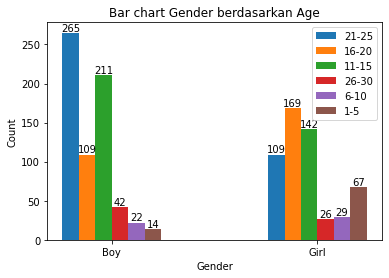

Persentase Education Level pada Age:
University: 37.84% (456/1205) [21-25:77.19% (352/456), 16-20:7.89% (36/456), 11-15:0.0% (0/456), 26-30:14.91% (68/456), 6-10:0.0% (0/456), 1-5:0.0% (0/456)]
College: 18.17% (219/1205) [21-25:10.05% (22/219), 16-20:89.95% (197/219), 11-15:0.0% (0/219), 26-30:0.0% (0/219), 6-10:0.0% (0/219), 1-5:0.0% (0/219)]
School: 43.98% (530/1205) [21-25:0.0% (0/530), 16-20:8.49% (45/530), 11-15:66.6% (353/530), 26-30:0.0% (0/530), 6-10:9.62% (51/530), 1-5:15.28% (81/530)]


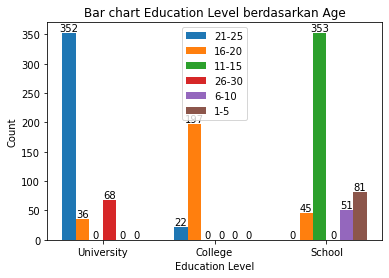

Persentase Institution Type pada Age:
Non Government: 68.3% (823/1205) [21-25:32.56% (268/823), 16-20:15.67% (129/823), 11-15:36.57% (301/823), 26-30:1.58% (13/823), 6-10:4.5% (37/823), 1-5:9.11% (75/823)]
Government: 31.7% (382/1205) [21-25:27.75% (106/382), 16-20:39.01% (149/382), 11-15:13.61% (52/382), 26-30:14.4% (55/382), 6-10:3.66% (14/382), 1-5:1.57% (6/382)]


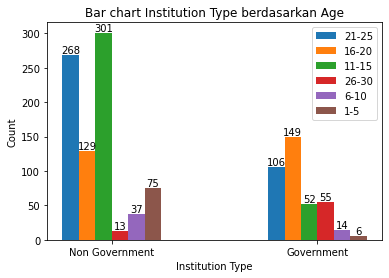

Persentase IT Student pada Age:
No: 74.77% (901/1205) [21-25:18.53% (167/901), 16-20:26.42% (238/901), 11-15:36.18% (326/901), 26-30:4.22% (38/901), 6-10:5.66% (51/901), 1-5:8.99% (81/901)]
Yes: 25.23% (304/1205) [21-25:68.09% (207/304), 16-20:13.16% (40/304), 11-15:8.88% (27/304), 26-30:9.87% (30/304), 6-10:0.0% (0/304), 1-5:0.0% (0/304)]


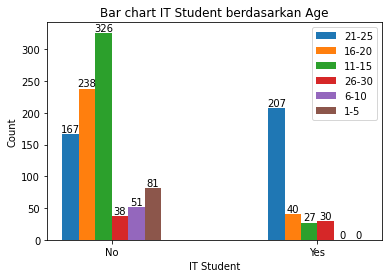

Persentase Is City pada Age:
Yes: 77.59% (935/1205) [21-25:28.66% (268/935), 16-20:19.36% (181/935), 11-15:34.55% (323/935), 26-30:4.6% (43/935), 6-10:4.49% (42/935), 1-5:8.34% (78/935)]
No: 22.41% (270/1205) [21-25:39.26% (106/270), 16-20:35.93% (97/270), 11-15:11.11% (30/270), 26-30:9.26% (25/270), 6-10:3.33% (9/270), 1-5:1.11% (3/270)]


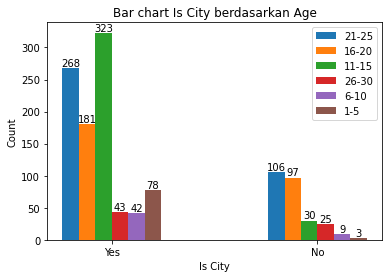

Persentase Load-shedding pada Age:
Low: 83.32% (1004/1205) [21-25:26.69% (268/1004), 16-20:21.71% (218/1004), 11-15:32.27% (324/1004), 26-30:6.37% (64/1004), 6-10:4.88% (49/1004), 1-5:8.07% (81/1004)]
High: 16.68% (201/1205) [21-25:52.74% (106/201), 16-20:29.85% (60/201), 11-15:14.43% (29/201), 26-30:1.99% (4/201), 6-10:1.0% (2/201), 1-5:0.0% (0/201)]


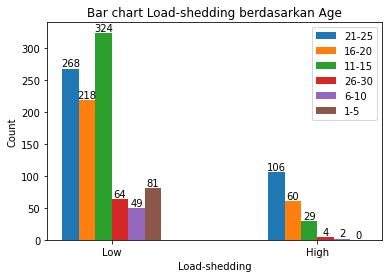

Persentase Financial Condition pada Age:
Mid: 72.86% (878/1205) [21-25:33.37% (293/878), 16-20:27.45% (241/878), 11-15:27.33% (240/878), 26-30:3.99% (35/878), 6-10:3.08% (27/878), 1-5:4.78% (42/878)]
Poor: 20.08% (242/1205) [21-25:23.97% (58/242), 16-20:10.74% (26/242), 11-15:35.95% (87/242), 26-30:9.92% (24/242), 6-10:4.55% (11/242), 1-5:14.88% (36/242)]
Rich: 7.05% (85/1205) [21-25:27.06% (23/85), 16-20:12.94% (11/85), 11-15:30.59% (26/85), 26-30:10.59% (9/85), 6-10:15.29% (13/85), 1-5:3.53% (3/85)]


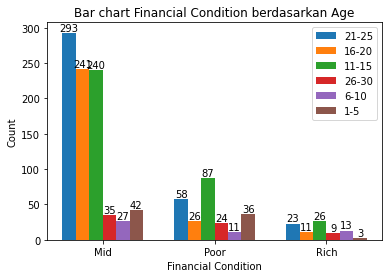

Persentase Internet Type pada Age:
Wifi: 42.32% (510/1205) [21-25:39.22% (200/510), 16-20:31.96% (163/510), 11-15:16.27% (83/510), 26-30:6.86% (35/510), 6-10:3.14% (16/510), 1-5:2.55% (13/510)]
Mobile Data: 57.68% (695/1205) [21-25:25.04% (174/695), 16-20:16.55% (115/695), 11-15:38.85% (270/695), 26-30:4.75% (33/695), 6-10:5.04% (35/695), 1-5:9.78% (68/695)]


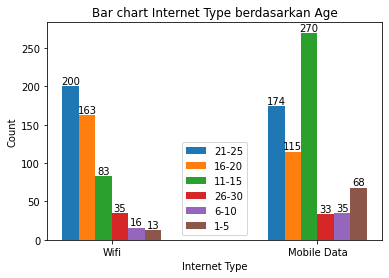

Persentase Network Type pada Age:
4G: 64.32% (775/1205) [21-25:30.45% (236/775), 16-20:26.19% (203/775), 11-15:22.71% (176/775), 26-30:7.87% (61/775), 6-10:2.32% (18/775), 1-5:10.45% (81/775)]
3G: 34.11% (411/1205) [21-25:31.39% (129/411), 16-20:17.52% (72/411), 11-15:42.34% (174/411), 26-30:1.7% (7/411), 6-10:7.06% (29/411), 1-5:0.0% (0/411)]
2G: 1.58% (19/1205) [21-25:47.37% (9/19), 16-20:15.79% (3/19), 11-15:15.79% (3/19), 26-30:0.0% (0/19), 6-10:21.05% (4/19), 1-5:0.0% (0/19)]


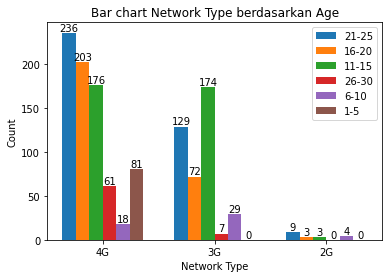

Persentase Class Duration pada Age:
3-6: 17.51% (211/1205) [21-25:70.14% (148/211), 16-20:20.38% (43/211), 11-15:6.16% (13/211), 26-30:1.42% (3/211), 6-10:1.9% (4/211), 1-5:0.0% (0/211)]
1-3: 69.71% (840/1205) [21-25:21.43% (180/840), 16-20:23.93% (201/840), 11-15:36.43% (306/840), 26-30:5.0% (42/840), 6-10:3.93% (33/840), 1-5:9.29% (78/840)]
0: 12.78% (154/1205) [21-25:29.87% (46/154), 16-20:22.08% (34/154), 11-15:22.08% (34/154), 26-30:14.94% (23/154), 6-10:9.09% (14/154), 1-5:1.95% (3/154)]


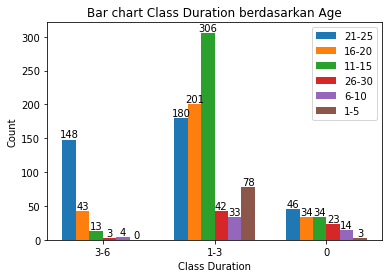

Persentase Self Lms pada Age:
No: 82.57% (995/1205) [21-25:22.31% (222/995), 16-20:23.22% (231/995), 11-15:35.48% (353/995), 26-30:6.03% (60/995), 6-10:5.13% (51/995), 1-5:7.84% (78/995)]
Yes: 17.43% (210/1205) [21-25:72.38% (152/210), 16-20:22.38% (47/210), 11-15:0.0% (0/210), 26-30:3.81% (8/210), 6-10:0.0% (0/210), 1-5:1.43% (3/210)]


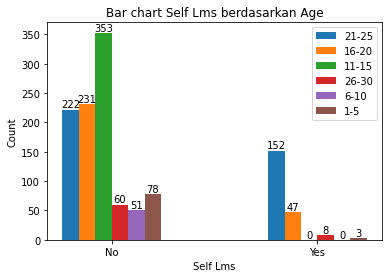

Persentase Device pada Age:
Tab: 2.49% (30/1205) [21-25:83.33% (25/30), 16-20:16.67% (5/30), 11-15:0.0% (0/30), 26-30:0.0% (0/30), 6-10:0.0% (0/30), 1-5:0.0% (0/30)]
Mobile: 84.07% (1013/1205) [21-25:23.2% (235/1013), 16-20:24.98% (253/1013), 11-15:33.76% (342/1013), 26-30:5.03% (51/1013), 6-10:5.03% (51/1013), 1-5:8.0% (81/1013)]
Computer: 13.44% (162/1205) [21-25:70.37% (114/162), 16-20:12.35% (20/162), 11-15:6.79% (11/162), 26-30:10.49% (17/162), 6-10:0.0% (0/162), 1-5:0.0% (0/162)]


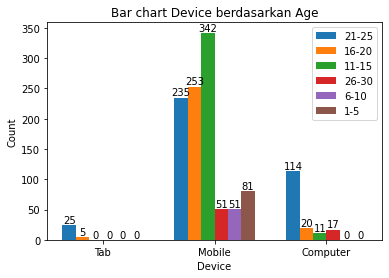

Persentase Adaptivity Level pada Age:
Moderate: 51.87% (625/1205) [21-25:31.52% (197/625), 16-20:20.64% (129/625), 11-15:32.8% (205/625), 26-30:3.2% (20/625), 6-10:1.6% (10/625), 1-5:10.24% (64/625)]
Low: 39.83% (480/1205) [21-25:28.96% (139/480), 16-20:30.0% (144/480), 11-15:25.0% (120/480), 26-30:7.5% (36/480), 6-10:5.0% (24/480), 1-5:3.54% (17/480)]
High: 8.3% (100/1205) [21-25:38.0% (38/100), 16-20:5.0% (5/100), 11-15:28.0% (28/100), 26-30:12.0% (12/100), 6-10:17.0% (17/100), 1-5:0.0% (0/100)]


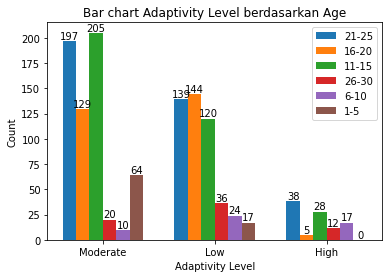

In [ ]:
for col in [x for x in df_eda.columns if x != 'Age']:
  cetakPersentase(col,'Age')
  cetakBar(col,'Age')

###Education Level

Informasi yang diperoleh

- Laki-laki lebih cenderung melanjutkan pendidikannya ke universitas dibanding perempuan
- Umur 16-20 yang memiliki variasi tingkat edukasi terbanyak
- Kebanyakan sekolah dan universitas merupakan swasta dibanding negeri sedangkan college kebanyakan negeri dibanding swasta
- Kebanyakan siswa IT di universitas tetapi ada juga siswa IT di sekolah
- Kebanyakan institusi edukasi berada di kota tetapi jumlah college yang terletak kota dan bukan kota tidak terlalu jauh
- Semakin tinggi tingkat edukasinya, semakin berkemungkinan untuk memiliki tingkat pelepasan stres yang tinggi
- Hanya 2.35% dari orang yang kaya melanjutkan pendidikannya ke college
- Walaupun dengan kondisi keuangan miskin, 33.88% siswa masih tetap melanjutkan pendidikan ke universitas
- Kebanyakan siswa di sekolah menggunakan mobile data sedangkan kebanyakan siswa di universitas menggunakan wifi
- Tidak ada pengaruh tipe jaringan dengan tingkat pendidikan
- Kebanyakan institusi hanya memberikan kelas berdurasi 1-3 jam, terutama sekolah, tetapi universitas juga masih ada cukup banyak yang kelasnya berdurasi 3-6 jam
- Universitas dominan memiliki Self Lms daripada tingkat pendidikan lain
- Hanya universitas yang mempunya variasi penggunaan gadget dibanding tingkat pendidikan lain
- Hanya 3% dari siswa yang memiliki tingkat adaptasi tinggi yang berpendidikan di college

Persentase Gender pada Education Level:
Boy: 55.02% (663/1205) [University:45.85% (304/663), College:13.27% (88/663), School:40.87% (271/663)]
Girl: 44.98% (542/1205) [University:28.04% (152/542), College:24.17% (131/542), School:47.79% (259/542)]


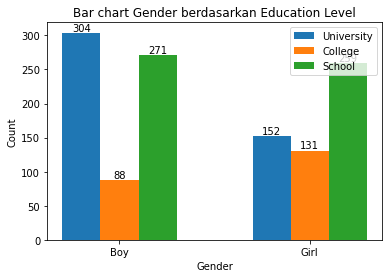

Persentase Age pada Education Level:
21-25: 31.04% (374/1205) [University:94.12% (352/374), College:5.88% (22/374), School:0.0% (0/374)]
16-20: 23.07% (278/1205) [University:12.95% (36/278), College:70.86% (197/278), School:16.19% (45/278)]
11-15: 29.29% (353/1205) [University:0.0% (0/353), College:0.0% (0/353), School:100.0% (353/353)]
26-30: 5.64% (68/1205) [University:100.0% (68/68), College:0.0% (0/68), School:0.0% (0/68)]
6-10: 4.23% (51/1205) [University:0.0% (0/51), College:0.0% (0/51), School:100.0% (51/51)]
1-5: 6.72% (81/1205) [University:0.0% (0/81), College:0.0% (0/81), School:100.0% (81/81)]


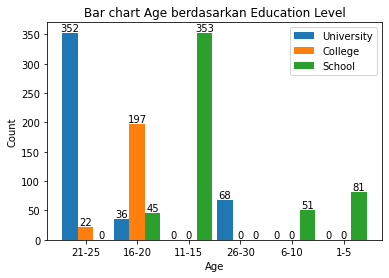

Persentase Institution Type pada Education Level:
Non Government: 68.3% (823/1205) [University:36.57% (301/823), College:11.18% (92/823), School:52.25% (430/823)]
Government: 31.7% (382/1205) [University:40.58% (155/382), College:33.25% (127/382), School:26.18% (100/382)]


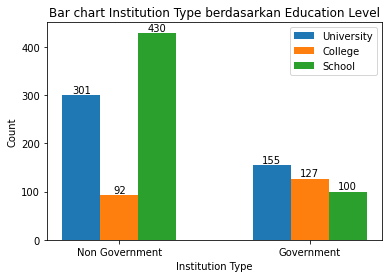

Persentase IT Student pada Education Level:
No: 74.77% (901/1205) [University:23.2% (209/901), College:20.98% (189/901), School:55.83% (503/901)]
Yes: 25.23% (304/1205) [University:81.25% (247/304), College:9.87% (30/304), School:8.88% (27/304)]


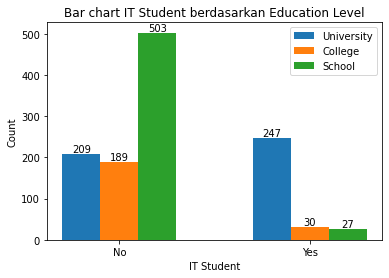

Persentase Is City pada Education Level:
Yes: 77.59% (935/1205) [University:35.29% (330/935), College:13.16% (123/935), School:51.55% (482/935)]
No: 22.41% (270/1205) [University:46.67% (126/270), College:35.56% (96/270), School:17.78% (48/270)]


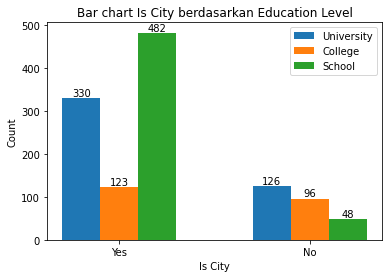

Persentase Load-shedding pada Education Level:
Low: 83.32% (1004/1205) [University:35.06% (352/1004), College:15.24% (153/1004), School:49.7% (499/1004)]
High: 16.68% (201/1205) [University:51.74% (104/201), College:32.84% (66/201), School:15.42% (31/201)]


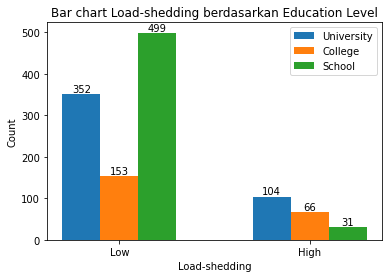

Persentase Financial Condition pada Education Level:
Mid: 72.86% (878/1205) [University:38.95% (342/878), College:22.78% (200/878), School:38.27% (336/878)]
Poor: 20.08% (242/1205) [University:33.88% (82/242), College:7.02% (17/242), School:59.09% (143/242)]
Rich: 7.05% (85/1205) [University:37.65% (32/85), College:2.35% (2/85), School:60.0% (51/85)]


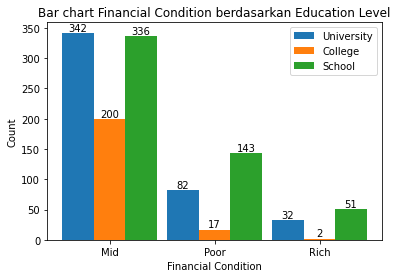

Persentase Internet Type pada Education Level:
Wifi: 42.32% (510/1205) [University:50.0% (255/510), College:23.53% (120/510), School:26.47% (135/510)]
Mobile Data: 57.68% (695/1205) [University:28.92% (201/695), College:14.24% (99/695), School:56.83% (395/695)]


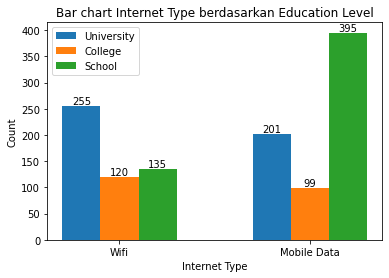

Persentase Network Type pada Education Level:
4G: 64.32% (775/1205) [University:38.58% (299/775), College:21.29% (165/775), School:40.13% (311/775)]
3G: 34.11% (411/1205) [University:36.01% (148/411), College:12.41% (51/411), School:51.58% (212/411)]
2G: 1.58% (19/1205) [University:47.37% (9/19), College:15.79% (3/19), School:36.84% (7/19)]


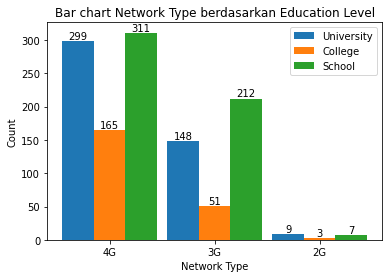

Persentase Class Duration pada Education Level:
3-6: 17.51% (211/1205) [University:73.93% (156/211), College:18.01% (38/211), School:8.06% (17/211)]
1-3: 69.71% (840/1205) [University:28.69% (241/840), College:17.86% (150/840), School:53.45% (449/840)]
0: 12.78% (154/1205) [University:38.31% (59/154), College:20.13% (31/154), School:41.56% (64/154)]


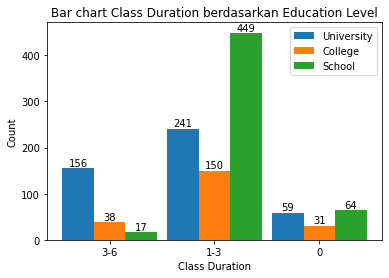

Persentase Self Lms pada Education Level:
No: 82.57% (995/1205) [University:27.94% (278/995), College:19.1% (190/995), School:52.96% (527/995)]
Yes: 17.43% (210/1205) [University:84.76% (178/210), College:13.81% (29/210), School:1.43% (3/210)]


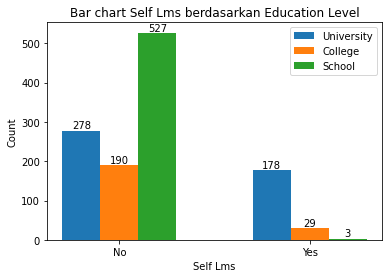

Persentase Device pada Education Level:
Tab: 2.49% (30/1205) [University:83.33% (25/30), College:16.67% (5/30), School:0.0% (0/30)]
Mobile: 84.07% (1013/1205) [University:28.33% (287/1013), College:20.63% (209/1013), School:51.04% (517/1013)]
Computer: 13.44% (162/1205) [University:88.89% (144/162), College:3.09% (5/162), School:8.02% (13/162)]


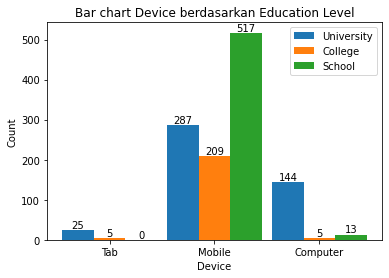

Persentase Adaptivity Level pada Education Level:
Moderate: 51.87% (625/1205) [University:36.48% (228/625), College:15.36% (96/625), School:48.16% (301/625)]
Low: 39.83% (480/1205) [University:37.08% (178/480), College:25.0% (120/480), School:37.92% (182/480)]
High: 8.3% (100/1205) [University:50.0% (50/100), College:3.0% (3/100), School:47.0% (47/100)]


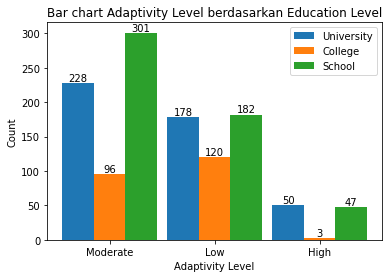

In [ ]:
for col in [x for x in df_eda.columns if x != 'Education Level']:
  cetakPersentase(col,'Education Level')
  cetakBar(col,'Education Level')

###Institution Type

Informasi yang diperoleh

- Tidak ada hubungan gender dan tipe institusi tetapi kebanyakan yang mengikuti pendidikan adalah laki-laki
- Siswa pada umur 1-15 dan 21-25 kebanyakan bersekolah pada sekolah swasta sedangkan pada umur 16-20 dan 26-30 kebanyakan pada sekolah negeri
- Hanya 18.87% dari sekolah merupakan sekolah negeri, sedangkan college lebih banyak yang negeri dibanding yang swasta
- Tidak ada hubungan IT Student dan tipe institusi
- Kebanyakan sekolah swasta berada di kota, untungnya sekolah negeri seimbang antara kota dan non kota
- Tidak ada hubungan load-shedding dan tipe institusi
- Tidak ada pengaruh kondisi keuangan terhadap tipe institusi
- Tidak ada pengaruh internet type terhadap tipe institusi
- Tidak ada pengaruh network type terhadap tipe institusi
- Sekolah swasta lebih berkemungkinan untuk memiliki durasi kelas lebih lama dibanding sekolah negeri. 70% dari durasi kelas 0 jam berasal dari sekolah negeri
- Sekolah swasta lebih berkemungkinan untuk memiliki self lms
- Siswa sekolah swasta memiliki variasi gadget yang digunakan dibanding sekolah negeri
- Sekolah swasta lebih berkemungkinan untuk memberikan tingkat adaptasi tinggi ke siswa

Persentase Gender pada Institution Type:
Boy: 55.02% (663/1205) [Non Government:63.8% (423/663), Government:36.2% (240/663)]
Girl: 44.98% (542/1205) [Non Government:73.8% (400/542), Government:26.2% (142/542)]


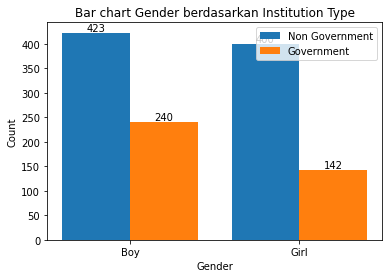

Persentase Age pada Institution Type:
21-25: 31.04% (374/1205) [Non Government:71.66% (268/374), Government:28.34% (106/374)]
16-20: 23.07% (278/1205) [Non Government:46.4% (129/278), Government:53.6% (149/278)]
11-15: 29.29% (353/1205) [Non Government:85.27% (301/353), Government:14.73% (52/353)]
26-30: 5.64% (68/1205) [Non Government:19.12% (13/68), Government:80.88% (55/68)]
6-10: 4.23% (51/1205) [Non Government:72.55% (37/51), Government:27.45% (14/51)]
1-5: 6.72% (81/1205) [Non Government:92.59% (75/81), Government:7.41% (6/81)]


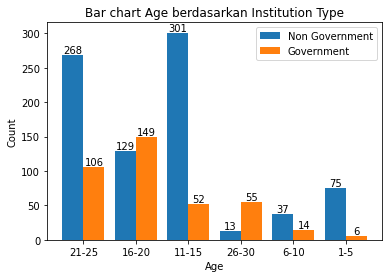

Persentase Education Level pada Institution Type:
University: 37.84% (456/1205) [Non Government:66.01% (301/456), Government:33.99% (155/456)]
College: 18.17% (219/1205) [Non Government:42.01% (92/219), Government:57.99% (127/219)]
School: 43.98% (530/1205) [Non Government:81.13% (430/530), Government:18.87% (100/530)]


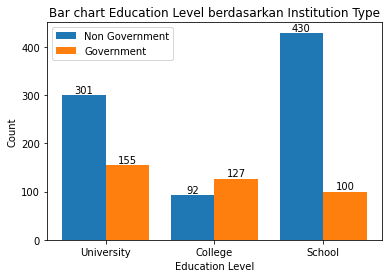

Persentase IT Student pada Institution Type:
No: 74.77% (901/1205) [Non Government:65.48% (590/901), Government:34.52% (311/901)]
Yes: 25.23% (304/1205) [Non Government:76.64% (233/304), Government:23.36% (71/304)]


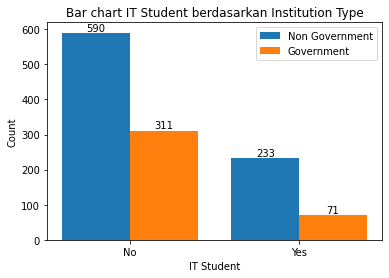

Persentase Is City pada Institution Type:
Yes: 77.59% (935/1205) [Non Government:76.47% (715/935), Government:23.53% (220/935)]
No: 22.41% (270/1205) [Non Government:40.0% (108/270), Government:60.0% (162/270)]


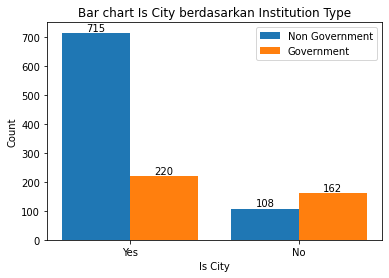

Persentase Load-shedding pada Institution Type:
Low: 83.32% (1004/1205) [Non Government:67.93% (682/1004), Government:32.07% (322/1004)]
High: 16.68% (201/1205) [Non Government:70.15% (141/201), Government:29.85% (60/201)]


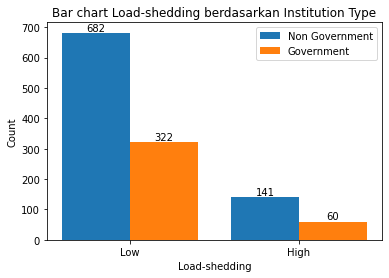

Persentase Financial Condition pada Institution Type:
Mid: 72.86% (878/1205) [Non Government:67.2% (590/878), Government:32.8% (288/878)]
Poor: 20.08% (242/1205) [Non Government:74.38% (180/242), Government:25.62% (62/242)]
Rich: 7.05% (85/1205) [Non Government:62.35% (53/85), Government:37.65% (32/85)]


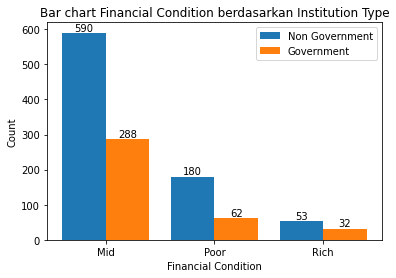

Persentase Internet Type pada Institution Type:
Wifi: 42.32% (510/1205) [Non Government:71.57% (365/510), Government:28.43% (145/510)]
Mobile Data: 57.68% (695/1205) [Non Government:65.9% (458/695), Government:34.1% (237/695)]


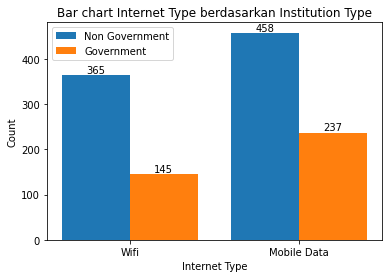

Persentase Network Type pada Institution Type:
4G: 64.32% (775/1205) [Non Government:65.29% (506/775), Government:34.71% (269/775)]
3G: 34.11% (411/1205) [Non Government:75.43% (310/411), Government:24.57% (101/411)]
2G: 1.58% (19/1205) [Non Government:36.84% (7/19), Government:63.16% (12/19)]


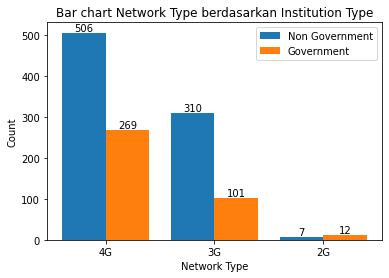

Persentase Class Duration pada Institution Type:
3-6: 17.51% (211/1205) [Non Government:91.0% (192/211), Government:9.0% (19/211)]
1-3: 69.71% (840/1205) [Non Government:69.64% (585/840), Government:30.36% (255/840)]
0: 12.78% (154/1205) [Non Government:29.87% (46/154), Government:70.13% (108/154)]


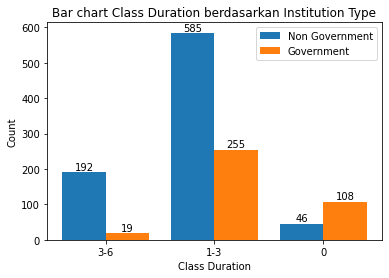

Persentase Self Lms pada Institution Type:
No: 82.57% (995/1205) [Non Government:66.23% (659/995), Government:33.77% (336/995)]
Yes: 17.43% (210/1205) [Non Government:78.1% (164/210), Government:21.9% (46/210)]


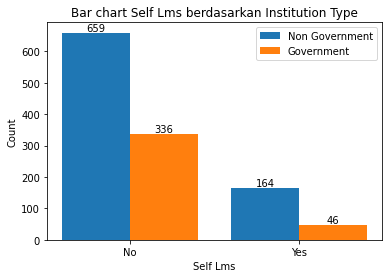

Persentase Device pada Institution Type:
Tab: 2.49% (30/1205) [Non Government:83.33% (25/30), Government:16.67% (5/30)]
Mobile: 84.07% (1013/1205) [Non Government:65.35% (662/1013), Government:34.65% (351/1013)]
Computer: 13.44% (162/1205) [Non Government:83.95% (136/162), Government:16.05% (26/162)]


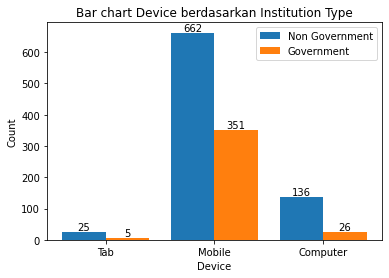

Persentase Adaptivity Level pada Institution Type:
Moderate: 51.87% (625/1205) [Non Government:79.52% (497/625), Government:20.48% (128/625)]
Low: 39.83% (480/1205) [Non Government:51.25% (246/480), Government:48.75% (234/480)]
High: 8.3% (100/1205) [Non Government:80.0% (80/100), Government:20.0% (20/100)]


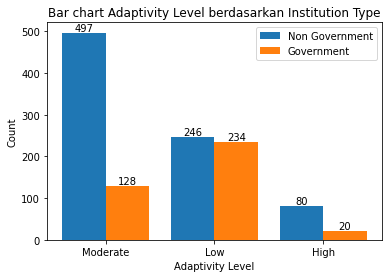

In [ ]:
for col in [x for x in df_eda.columns if x != 'Institution Type']:
  cetakPersentase(col,'Institution Type')
  cetakBar(col,'Institution Type')

###IT Student

Informasi yang diperoleh

- siswa IT kebanyakan laki-laki
- siswa IT terbanyak pada umur 21-25
- siswa IT terbanyak pada tingkat universitas 
- siswa IT terbanyak pada institusi swasta
- Tidak ada pengaruh siswa IT dan tinggal di kota
- Tidak ada pengaruh siswa IT dan tingkat pelepasan stres
- Tidak ada pengaruh siswa IT dan kondisi keuangan
- Tidak ada pengaruh siswa IT dan tipe internet
- Dari 19 orang yang menggunakan 2G, ada 2 orang siswa IT
- Durasi kelas siswa IT dominan dari 1-6 jam
- Kebanyakan yang menggunakan self lms adalah siswa IT
- Kebanyakan siswa IT menggunakan komputer dan hp
- Tidak ada pengaruh siswa IT dan adaptivity level

Persentase Gender pada IT Student:
Boy: 55.02% (663/1205) [No:65.61% (435/663), Yes:34.39% (228/663)]
Girl: 44.98% (542/1205) [No:85.98% (466/542), Yes:14.02% (76/542)]


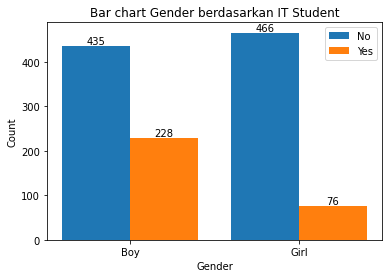

Persentase Age pada IT Student:
21-25: 31.04% (374/1205) [No:44.65% (167/374), Yes:55.35% (207/374)]
16-20: 23.07% (278/1205) [No:85.61% (238/278), Yes:14.39% (40/278)]
11-15: 29.29% (353/1205) [No:92.35% (326/353), Yes:7.65% (27/353)]
26-30: 5.64% (68/1205) [No:55.88% (38/68), Yes:44.12% (30/68)]
6-10: 4.23% (51/1205) [No:100.0% (51/51), Yes:0.0% (0/51)]
1-5: 6.72% (81/1205) [No:100.0% (81/81), Yes:0.0% (0/81)]


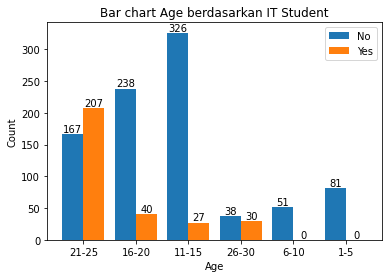

Persentase Education Level pada IT Student:
University: 37.84% (456/1205) [No:45.83% (209/456), Yes:54.17% (247/456)]
College: 18.17% (219/1205) [No:86.3% (189/219), Yes:13.7% (30/219)]
School: 43.98% (530/1205) [No:94.91% (503/530), Yes:5.09% (27/530)]


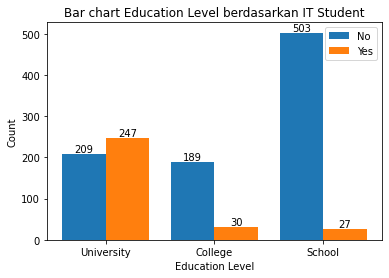

Persentase Institution Type pada IT Student:
Non Government: 68.3% (823/1205) [No:71.69% (590/823), Yes:28.31% (233/823)]
Government: 31.7% (382/1205) [No:81.41% (311/382), Yes:18.59% (71/382)]


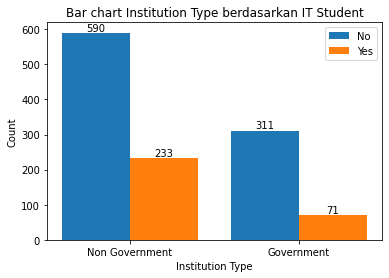

Persentase Is City pada IT Student:
Yes: 77.59% (935/1205) [No:74.55% (697/935), Yes:25.45% (238/935)]
No: 22.41% (270/1205) [No:75.56% (204/270), Yes:24.44% (66/270)]


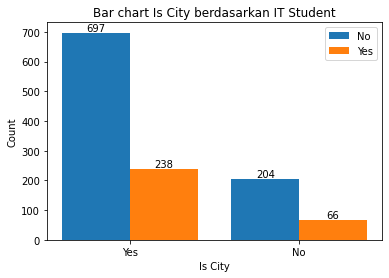

Persentase Load-shedding pada IT Student:
Low: 83.32% (1004/1205) [No:78.39% (787/1004), Yes:21.61% (217/1004)]
High: 16.68% (201/1205) [No:56.72% (114/201), Yes:43.28% (87/201)]


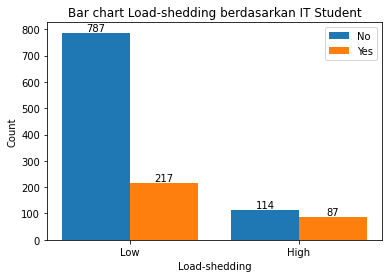

Persentase Financial Condition pada IT Student:
Mid: 72.86% (878/1205) [No:73.46% (645/878), Yes:26.54% (233/878)]
Poor: 20.08% (242/1205) [No:80.99% (196/242), Yes:19.01% (46/242)]
Rich: 7.05% (85/1205) [No:70.59% (60/85), Yes:29.41% (25/85)]


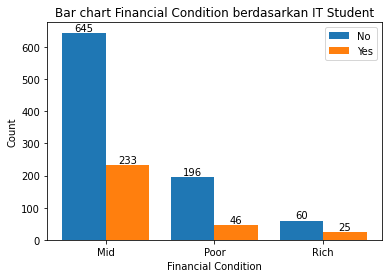

Persentase Internet Type pada IT Student:
Wifi: 42.32% (510/1205) [No:69.02% (352/510), Yes:30.98% (158/510)]
Mobile Data: 57.68% (695/1205) [No:78.99% (549/695), Yes:21.01% (146/695)]


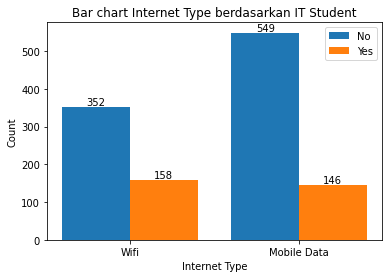

Persentase Network Type pada IT Student:
4G: 64.32% (775/1205) [No:79.61% (617/775), Yes:20.39% (158/775)]
3G: 34.11% (411/1205) [No:64.96% (267/411), Yes:35.04% (144/411)]
2G: 1.58% (19/1205) [No:89.47% (17/19), Yes:10.53% (2/19)]


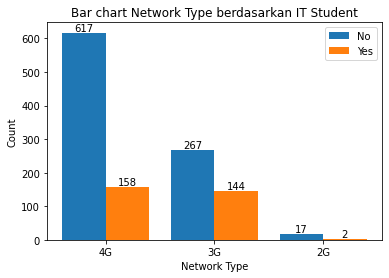

Persentase Class Duration pada IT Student:
3-6: 17.51% (211/1205) [No:54.5% (115/211), Yes:45.5% (96/211)]
1-3: 69.71% (840/1205) [No:77.14% (648/840), Yes:22.86% (192/840)]
0: 12.78% (154/1205) [No:89.61% (138/154), Yes:10.39% (16/154)]


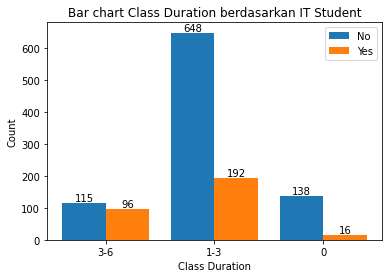

Persentase Self Lms pada IT Student:
No: 82.57% (995/1205) [No:83.82% (834/995), Yes:16.18% (161/995)]
Yes: 17.43% (210/1205) [No:31.9% (67/210), Yes:68.1% (143/210)]


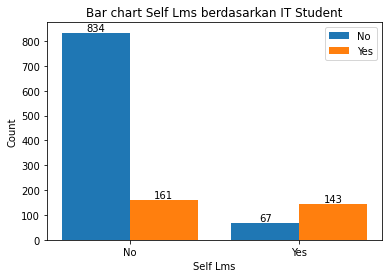

Persentase Device pada IT Student:
Tab: 2.49% (30/1205) [No:76.67% (23/30), Yes:23.33% (7/30)]
Mobile: 84.07% (1013/1205) [No:82.33% (834/1013), Yes:17.67% (179/1013)]
Computer: 13.44% (162/1205) [No:27.16% (44/162), Yes:72.84% (118/162)]


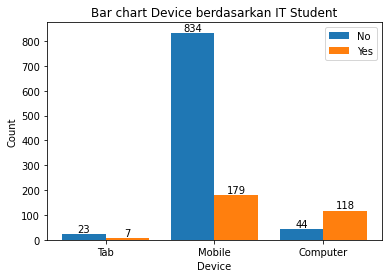

Persentase Adaptivity Level pada IT Student:
Moderate: 51.87% (625/1205) [No:70.88% (443/625), Yes:29.12% (182/625)]
Low: 39.83% (480/1205) [No:81.46% (391/480), Yes:18.54% (89/480)]
High: 8.3% (100/1205) [No:67.0% (67/100), Yes:33.0% (33/100)]


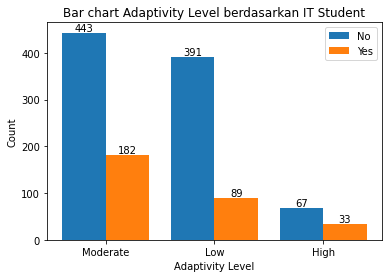

In [ ]:
for col in [x for x in df_eda.columns if x != 'IT Student']:
  cetakPersentase(col,'IT Student')
  cetakBar(col,'IT Student')

###Is City

Informasi yang diperoleh

- Tidak ada pengaruh gender terhadap tinggal di kota
- 91.5% dari siswa umur 11-15 tinggal di kota
- Kebanyakan institusi yang berada di kota adalah sekolah dan universitas
- 86.88% dari institusi swasta berada di kota
- Tidak ada pengaruh IT student dan tinggal di kota
- Hanya 17.83% siswa dengan tingkat pelepasan stres rendah tinggal di non kota
- Dari 85 siswa yang kondisi keuangannya kaya, hanya 4 orang yang tinggal di non kota
- Kebanyakan orang yang menggunakan wifi tinggal di kota
- Hanya 5/19 orang yang masih menggunakan 2G di kota
- Kebanyakan siswa yang durasi kelasnya 3-6 jam berada di kota
- Tidak ada hubungan self lms dan is city
- Kebanyakan orang yang memiliki gadget selain hp berada di kota
- Siswa yang tinggal di kota lebih berkemungkinan untuk memiliki tingkat adaptasi lebih tinggi

Persentase Gender pada Is City:
Boy: 55.02% (663/1205) [Yes:78.88% (523/663), No:21.12% (140/663)]
Girl: 44.98% (542/1205) [Yes:76.01% (412/542), No:23.99% (130/542)]


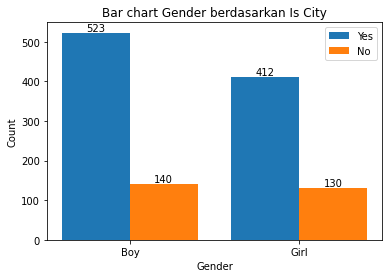

Persentase Age pada Is City:
21-25: 31.04% (374/1205) [Yes:71.66% (268/374), No:28.34% (106/374)]
16-20: 23.07% (278/1205) [Yes:65.11% (181/278), No:34.89% (97/278)]
11-15: 29.29% (353/1205) [Yes:91.5% (323/353), No:8.5% (30/353)]
26-30: 5.64% (68/1205) [Yes:63.24% (43/68), No:36.76% (25/68)]
6-10: 4.23% (51/1205) [Yes:82.35% (42/51), No:17.65% (9/51)]
1-5: 6.72% (81/1205) [Yes:96.3% (78/81), No:3.7% (3/81)]


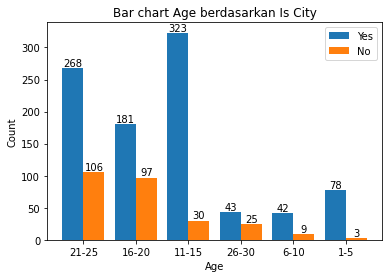

Persentase Education Level pada Is City:
University: 37.84% (456/1205) [Yes:72.37% (330/456), No:27.63% (126/456)]
College: 18.17% (219/1205) [Yes:56.16% (123/219), No:43.84% (96/219)]
School: 43.98% (530/1205) [Yes:90.94% (482/530), No:9.06% (48/530)]


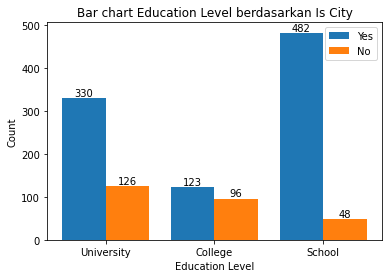

Persentase Institution Type pada Is City:
Non Government: 68.3% (823/1205) [Yes:86.88% (715/823), No:13.12% (108/823)]
Government: 31.7% (382/1205) [Yes:57.59% (220/382), No:42.41% (162/382)]


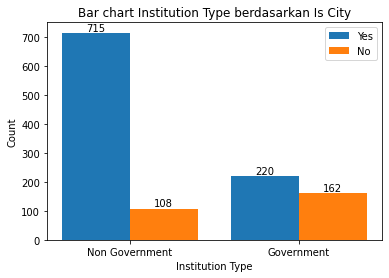

Persentase IT Student pada Is City:
No: 74.77% (901/1205) [Yes:77.36% (697/901), No:22.64% (204/901)]
Yes: 25.23% (304/1205) [Yes:78.29% (238/304), No:21.71% (66/304)]


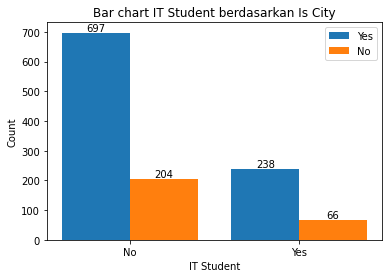

Persentase Load-shedding pada Is City:
Low: 83.32% (1004/1205) [Yes:82.17% (825/1004), No:17.83% (179/1004)]
High: 16.68% (201/1205) [Yes:54.73% (110/201), No:45.27% (91/201)]


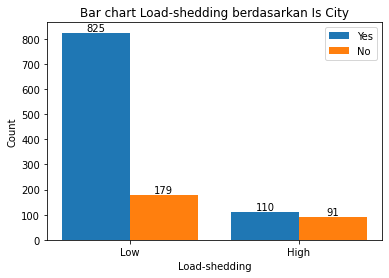

Persentase Financial Condition pada Is City:
Mid: 72.86% (878/1205) [Yes:77.33% (679/878), No:22.67% (199/878)]
Poor: 20.08% (242/1205) [Yes:72.31% (175/242), No:27.69% (67/242)]
Rich: 7.05% (85/1205) [Yes:95.29% (81/85), No:4.71% (4/85)]


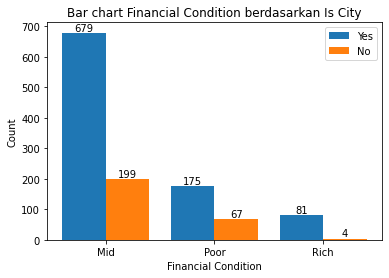

Persentase Internet Type pada Is City:
Wifi: 42.32% (510/1205) [Yes:88.43% (451/510), No:11.57% (59/510)]
Mobile Data: 57.68% (695/1205) [Yes:69.64% (484/695), No:30.36% (211/695)]


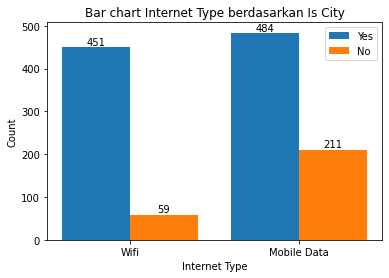

Persentase Network Type pada Is City:
4G: 64.32% (775/1205) [Yes:82.06% (636/775), No:17.94% (139/775)]
3G: 34.11% (411/1205) [Yes:71.53% (294/411), No:28.47% (117/411)]
2G: 1.58% (19/1205) [Yes:26.32% (5/19), No:73.68% (14/19)]


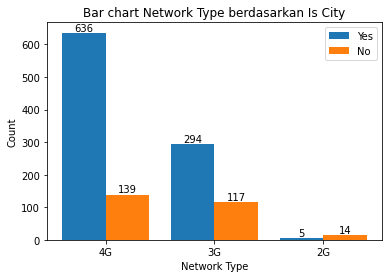

Persentase Class Duration pada Is City:
3-6: 17.51% (211/1205) [Yes:81.99% (173/211), No:18.01% (38/211)]
1-3: 69.71% (840/1205) [Yes:82.5% (693/840), No:17.5% (147/840)]
0: 12.78% (154/1205) [Yes:44.81% (69/154), No:55.19% (85/154)]


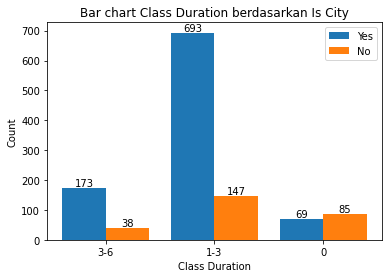

Persentase Self Lms pada Is City:
No: 82.57% (995/1205) [Yes:78.29% (779/995), No:21.71% (216/995)]
Yes: 17.43% (210/1205) [Yes:74.29% (156/210), No:25.71% (54/210)]


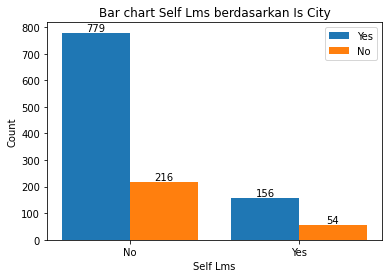

Persentase Device pada Is City:
Tab: 2.49% (30/1205) [Yes:93.33% (28/30), No:6.67% (2/30)]
Mobile: 84.07% (1013/1205) [Yes:75.32% (763/1013), No:24.68% (250/1013)]
Computer: 13.44% (162/1205) [Yes:88.89% (144/162), No:11.11% (18/162)]


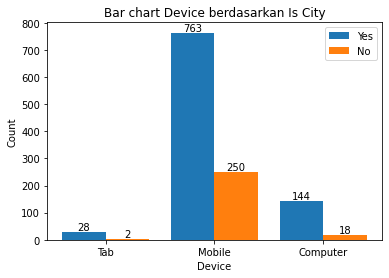

Persentase Adaptivity Level pada Is City:
Moderate: 51.87% (625/1205) [Yes:85.44% (534/625), No:14.56% (91/625)]
Low: 39.83% (480/1205) [Yes:64.38% (309/480), No:35.62% (171/480)]
High: 8.3% (100/1205) [Yes:92.0% (92/100), No:8.0% (8/100)]


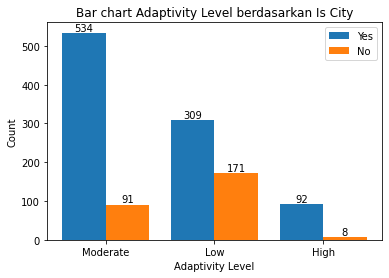

In [ ]:
for col in [x for x in df_eda.columns if x != 'Is City']:
  cetakPersentase(col,'Is City')
  cetakBar(col,'Is City')

###Load-shedding

Informasi yang diperoleh

- Tidak ada hubungan gender dan load-shedding
- Umur 16-25 cenderung memiliki tingkat pelepasan stres yang tinggi dibanding yang lain
- Tingkat pelepasan stres yang tinggi terbanyak berasal dari university
- Tidak ada hubungan load-shedding dan tipe institusi
- Tidak ada hubungan load-shedding dan siswa IT
- Tidak ada hubungan load-shedding dan tinggal di kota
- Siswa dengan kondisi keuangan kaya tidak mengalami tingkat pelepasan stres yang tinggi
- Tidak ada hubungan load-shedding dan internet type
- 10/19 siswa yang menggunakan jaringan 2G memiliki tingkat pelepasan stres yang tinggi
- Tidak ada hubungan class duration dan load-shedding
- Siswa yang menggunakan self-lms lebih berkemungkinan untuk memiliki tingkat pelepasan stres yang tinggi
- Tidak ada hubungan device dan load-shedding
- Tidak ada hubungan adaptivity level dan load-shedding

Persentase Gender pada Load-shedding:
Boy: 55.02% (663/1205) [Low:81.3% (539/663), High:18.7% (124/663)]
Girl: 44.98% (542/1205) [Low:85.79% (465/542), High:14.21% (77/542)]


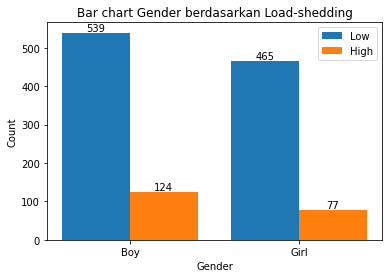

Persentase Age pada Load-shedding:
21-25: 31.04% (374/1205) [Low:71.66% (268/374), High:28.34% (106/374)]
16-20: 23.07% (278/1205) [Low:78.42% (218/278), High:21.58% (60/278)]
11-15: 29.29% (353/1205) [Low:91.78% (324/353), High:8.22% (29/353)]
26-30: 5.64% (68/1205) [Low:94.12% (64/68), High:5.88% (4/68)]
6-10: 4.23% (51/1205) [Low:96.08% (49/51), High:3.92% (2/51)]
1-5: 6.72% (81/1205) [Low:100.0% (81/81), High:0.0% (0/81)]


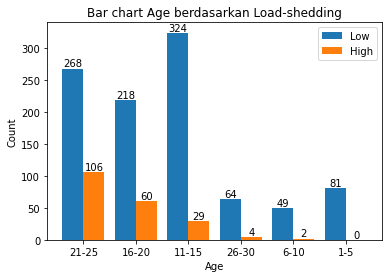

Persentase Education Level pada Load-shedding:
University: 37.84% (456/1205) [Low:77.19% (352/456), High:22.81% (104/456)]
College: 18.17% (219/1205) [Low:69.86% (153/219), High:30.14% (66/219)]
School: 43.98% (530/1205) [Low:94.15% (499/530), High:5.85% (31/530)]


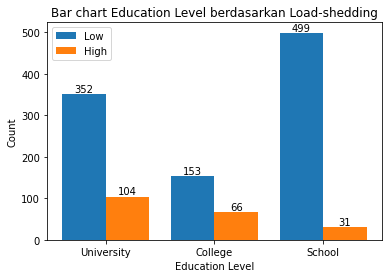

Persentase Institution Type pada Load-shedding:
Non Government: 68.3% (823/1205) [Low:82.87% (682/823), High:17.13% (141/823)]
Government: 31.7% (382/1205) [Low:84.29% (322/382), High:15.71% (60/382)]


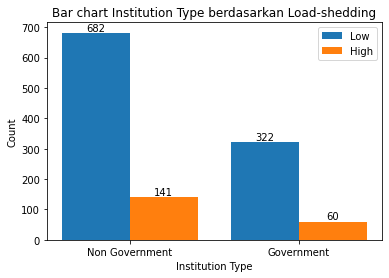

Persentase IT Student pada Load-shedding:
No: 74.77% (901/1205) [Low:87.35% (787/901), High:12.65% (114/901)]
Yes: 25.23% (304/1205) [Low:71.38% (217/304), High:28.62% (87/304)]


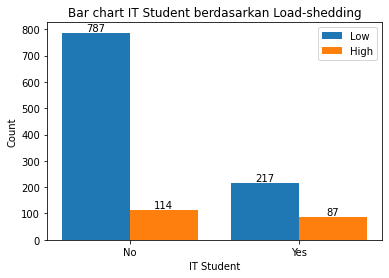

Persentase Is City pada Load-shedding:
Yes: 77.59% (935/1205) [Low:88.24% (825/935), High:11.76% (110/935)]
No: 22.41% (270/1205) [Low:66.3% (179/270), High:33.7% (91/270)]


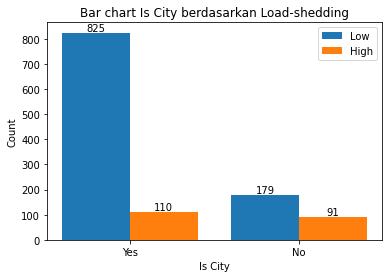

Persentase Financial Condition pada Load-shedding:
Mid: 72.86% (878/1205) [Low:84.97% (746/878), High:15.03% (132/878)]
Poor: 20.08% (242/1205) [Low:71.49% (173/242), High:28.51% (69/242)]
Rich: 7.05% (85/1205) [Low:100.0% (85/85), High:0.0% (0/85)]


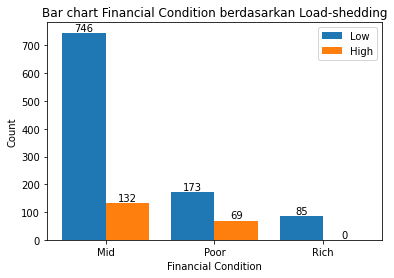

Persentase Internet Type pada Load-shedding:
Wifi: 42.32% (510/1205) [Low:82.75% (422/510), High:17.25% (88/510)]
Mobile Data: 57.68% (695/1205) [Low:83.74% (582/695), High:16.26% (113/695)]


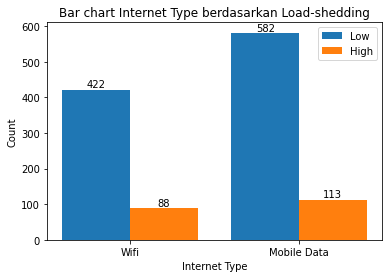

Persentase Network Type pada Load-shedding:
4G: 64.32% (775/1205) [Low:87.35% (677/775), High:12.65% (98/775)]
3G: 34.11% (411/1205) [Low:77.37% (318/411), High:22.63% (93/411)]
2G: 1.58% (19/1205) [Low:47.37% (9/19), High:52.63% (10/19)]


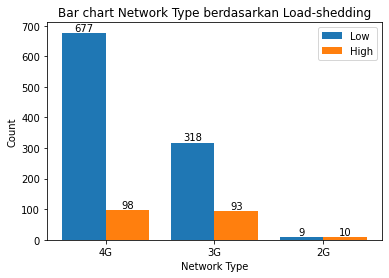

Persentase Class Duration pada Load-shedding:
3-6: 17.51% (211/1205) [Low:68.72% (145/211), High:31.28% (66/211)]
1-3: 69.71% (840/1205) [Low:87.14% (732/840), High:12.86% (108/840)]
0: 12.78% (154/1205) [Low:82.47% (127/154), High:17.53% (27/154)]


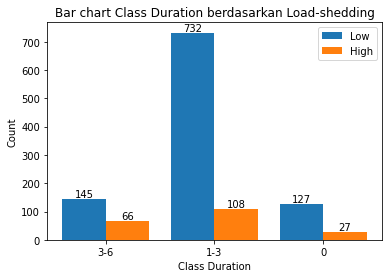

Persentase Self Lms pada Load-shedding:
No: 82.57% (995/1205) [Low:86.53% (861/995), High:13.47% (134/995)]
Yes: 17.43% (210/1205) [Low:68.1% (143/210), High:31.9% (67/210)]


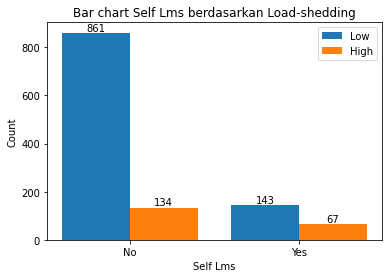

Persentase Device pada Load-shedding:
Tab: 2.49% (30/1205) [Low:93.33% (28/30), High:6.67% (2/30)]
Mobile: 84.07% (1013/1205) [Low:83.61% (847/1013), High:16.39% (166/1013)]
Computer: 13.44% (162/1205) [Low:79.63% (129/162), High:20.37% (33/162)]


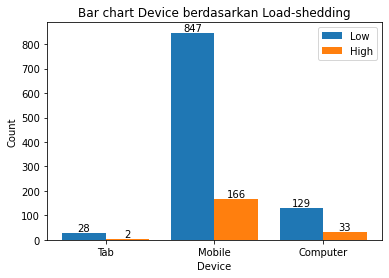

Persentase Adaptivity Level pada Load-shedding:
Moderate: 51.87% (625/1205) [Low:85.92% (537/625), High:14.08% (88/625)]
Low: 39.83% (480/1205) [Low:79.17% (380/480), High:20.83% (100/480)]
High: 8.3% (100/1205) [Low:87.0% (87/100), High:13.0% (13/100)]


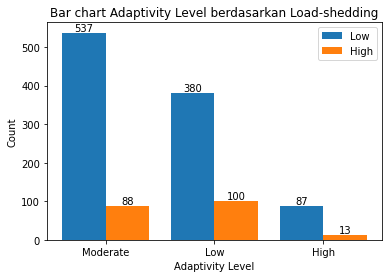

In [ ]:
for col in [x for x in df_eda.columns if x != 'Load-shedding']:
  cetakPersentase(col,'Load-shedding')
  cetakBar(col,'Load-shedding')

###Financial Condition

Informasi yang diperoleh

- Tidak ada hubungan gender dan financial condition
- Kebanyakan siswa dengan keuangan miskin berada di umur 1-5 dan 11-15
- Hanya 0.91% siswa yang kaya masuk ke college
- Tidak ada hubungan institution type dan financial condition
- Tidak ada hubungan it student dan financial condition
- Hanya 1.48% siswa yang tinggal di non kota merupakan siswa kaya
- Tidak ada orang kaya yang memiliki load-shedding tinggi
- Siswa yang kaya lebih berkemungkinan menggunakan wifi dibanding mobile data
- Tidak ada siswa yang kaya yang menggunakan 2G sedangkan siswa miskin lebih cenderung menggunakan 3G dibanding 4G
- Hanya 1.3% siswa yang kaya memiliki kelas dengan durasi 0 jam
- Tidak ada hubungan self lms dan financial condition
- 80% dari pengguna tab adalah kalangan mid
- Semakin bagus kondisi keuangan, semakin mudah untuk beradaptasi

Persentase Gender pada Financial Condition:
Boy: 55.02% (663/1205) [Mid:72.7% (482/663), Poor:19.46% (129/663), Rich:7.84% (52/663)]
Girl: 44.98% (542/1205) [Mid:73.06% (396/542), Poor:20.85% (113/542), Rich:6.09% (33/542)]


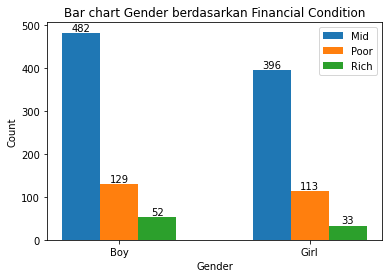

Persentase Age pada Financial Condition:
21-25: 31.04% (374/1205) [Mid:78.34% (293/374), Poor:15.51% (58/374), Rich:6.15% (23/374)]
16-20: 23.07% (278/1205) [Mid:86.69% (241/278), Poor:9.35% (26/278), Rich:3.96% (11/278)]
11-15: 29.29% (353/1205) [Mid:67.99% (240/353), Poor:24.65% (87/353), Rich:7.37% (26/353)]
26-30: 5.64% (68/1205) [Mid:51.47% (35/68), Poor:35.29% (24/68), Rich:13.24% (9/68)]
6-10: 4.23% (51/1205) [Mid:52.94% (27/51), Poor:21.57% (11/51), Rich:25.49% (13/51)]
1-5: 6.72% (81/1205) [Mid:51.85% (42/81), Poor:44.44% (36/81), Rich:3.7% (3/81)]


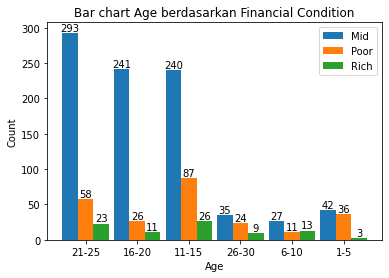

Persentase Education Level pada Financial Condition:
University: 37.84% (456/1205) [Mid:75.0% (342/456), Poor:17.98% (82/456), Rich:7.02% (32/456)]
College: 18.17% (219/1205) [Mid:91.32% (200/219), Poor:7.76% (17/219), Rich:0.91% (2/219)]
School: 43.98% (530/1205) [Mid:63.4% (336/530), Poor:26.98% (143/530), Rich:9.62% (51/530)]


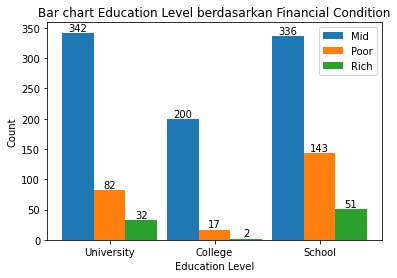

Persentase Institution Type pada Financial Condition:
Non Government: 68.3% (823/1205) [Mid:71.69% (590/823), Poor:21.87% (180/823), Rich:6.44% (53/823)]
Government: 31.7% (382/1205) [Mid:75.39% (288/382), Poor:16.23% (62/382), Rich:8.38% (32/382)]


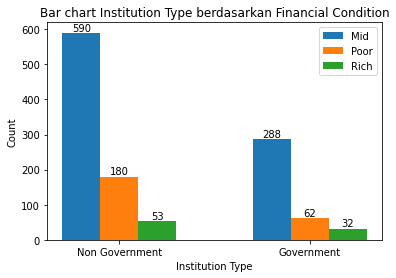

Persentase IT Student pada Financial Condition:
No: 74.77% (901/1205) [Mid:71.59% (645/901), Poor:21.75% (196/901), Rich:6.66% (60/901)]
Yes: 25.23% (304/1205) [Mid:76.64% (233/304), Poor:15.13% (46/304), Rich:8.22% (25/304)]


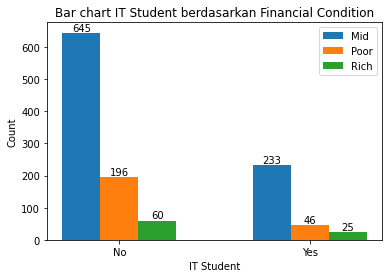

Persentase Is City pada Financial Condition:
Yes: 77.59% (935/1205) [Mid:72.62% (679/935), Poor:18.72% (175/935), Rich:8.66% (81/935)]
No: 22.41% (270/1205) [Mid:73.7% (199/270), Poor:24.81% (67/270), Rich:1.48% (4/270)]


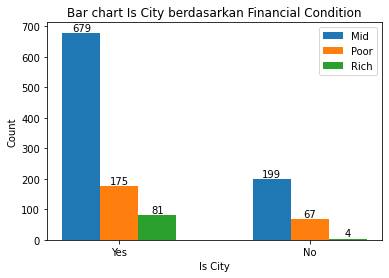

Persentase Load-shedding pada Financial Condition:
Low: 83.32% (1004/1205) [Mid:74.3% (746/1004), Poor:17.23% (173/1004), Rich:8.47% (85/1004)]
High: 16.68% (201/1205) [Mid:65.67% (132/201), Poor:34.33% (69/201), Rich:0.0% (0/201)]


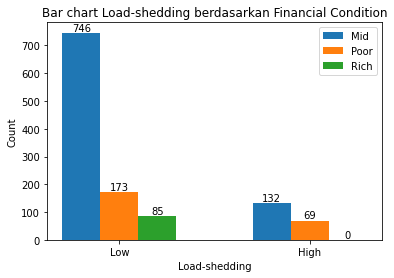

Persentase Internet Type pada Financial Condition:
Wifi: 42.32% (510/1205) [Mid:79.41% (405/510), Poor:8.43% (43/510), Rich:12.16% (62/510)]
Mobile Data: 57.68% (695/1205) [Mid:68.06% (473/695), Poor:28.63% (199/695), Rich:3.31% (23/695)]


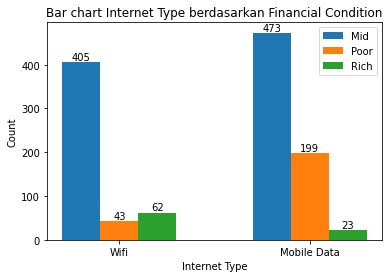

Persentase Network Type pada Financial Condition:
4G: 64.32% (775/1205) [Mid:75.74% (587/775), Poor:15.1% (117/775), Rich:9.16% (71/775)]
3G: 34.11% (411/1205) [Mid:68.13% (280/411), Poor:28.47% (117/411), Rich:3.41% (14/411)]
2G: 1.58% (19/1205) [Mid:57.89% (11/19), Poor:42.11% (8/19), Rich:0.0% (0/19)]


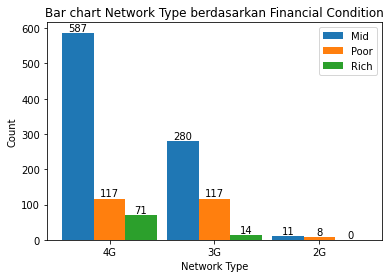

Persentase Class Duration pada Financial Condition:
3-6: 17.51% (211/1205) [Mid:76.78% (162/211), Poor:12.8% (27/211), Rich:10.43% (22/211)]
1-3: 69.71% (840/1205) [Mid:71.67% (602/840), Poor:21.07% (177/840), Rich:7.26% (61/840)]
0: 12.78% (154/1205) [Mid:74.03% (114/154), Poor:24.68% (38/154), Rich:1.3% (2/154)]


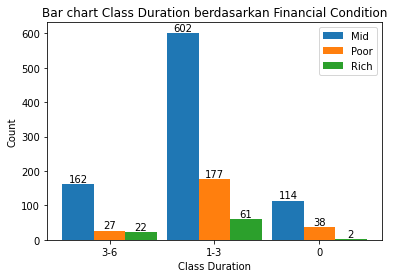

Persentase Self Lms pada Financial Condition:
No: 82.57% (995/1205) [Mid:71.76% (714/995), Poor:20.5% (204/995), Rich:7.74% (77/995)]
Yes: 17.43% (210/1205) [Mid:78.1% (164/210), Poor:18.1% (38/210), Rich:3.81% (8/210)]


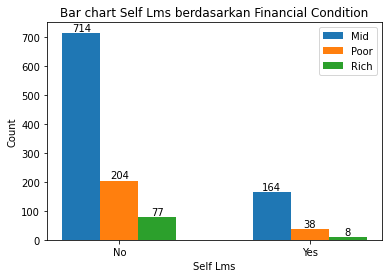

Persentase Device pada Financial Condition:
Tab: 2.49% (30/1205) [Mid:80.0% (24/30), Poor:6.67% (2/30), Rich:13.33% (4/30)]
Mobile: 84.07% (1013/1205) [Mid:72.16% (731/1013), Poor:22.01% (223/1013), Rich:5.82% (59/1013)]
Computer: 13.44% (162/1205) [Mid:75.93% (123/162), Poor:10.49% (17/162), Rich:13.58% (22/162)]


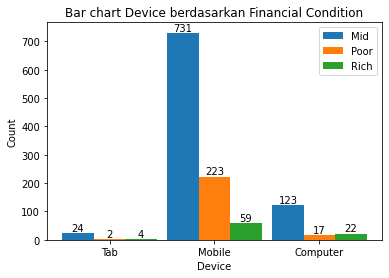

Persentase Adaptivity Level pada Financial Condition:
Moderate: 51.87% (625/1205) [Mid:80.16% (501/625), Poor:14.56% (91/625), Rich:5.28% (33/625)]
Low: 39.83% (480/1205) [Mid:71.04% (341/480), Poor:26.88% (129/480), Rich:2.08% (10/480)]
High: 8.3% (100/1205) [Mid:36.0% (36/100), Poor:22.0% (22/100), Rich:42.0% (42/100)]


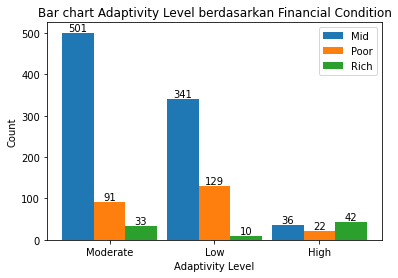

In [ ]:
for col in [x for x in df_eda.columns if x != 'Financial Condition']:
  cetakPersentase(col,'Financial Condition')
  cetakBar(col,'Financial Condition')

###Internet Type

Informasi yang diperoleh

- Tidak ada hubungan gender dan internet type
- Siswa pada umur dibawah 15 tahun lebih cenderung menggunakan mobile data dibanding wifi
- Kebanyakan pengguna mobile data adalah siswa yang masih di sekolah
- Tidak ada hubungan tipe institusi dan tipe internet
- Siswa non IT lebih cenderung untuk menggunakan mobile data daripada wifi
- Siswa yang tinggal di non kota cenderung untuk menggunakan mobile data daripada wifi
- Tidak ada hubungan load shedding dan internet type
- Siswa yang kaya cenderung untuk menggunakan wifi dan siswa yang miskin cenderung menggunakan mobile data
- Kebanyakan wifi sudah 4g tapi masih ada wifi yang 2G
- Siswa dengan durasi kelas 3-6 jam lebih cenderung untuk menggunakan wifi
- Tidak ada hubungan self lms dan internet type
- Pengguna komputer dan tab cenderung menggunakan wifi, terutama pengguna tab yang sudah tidak ada yang menggunakan mobile data
- Siswa yang menggunakan wifi lebih cenderung memiliki tingkat adaptasi yang tinggi

Persentase Gender pada Internet Type:
Boy: 55.02% (663/1205) [Wifi:43.29% (287/663), Mobile Data:56.71% (376/663)]
Girl: 44.98% (542/1205) [Wifi:41.14% (223/542), Mobile Data:58.86% (319/542)]


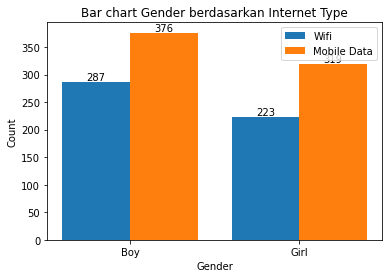

Persentase Age pada Internet Type:
21-25: 31.04% (374/1205) [Wifi:53.48% (200/374), Mobile Data:46.52% (174/374)]
16-20: 23.07% (278/1205) [Wifi:58.63% (163/278), Mobile Data:41.37% (115/278)]
11-15: 29.29% (353/1205) [Wifi:23.51% (83/353), Mobile Data:76.49% (270/353)]
26-30: 5.64% (68/1205) [Wifi:51.47% (35/68), Mobile Data:48.53% (33/68)]
6-10: 4.23% (51/1205) [Wifi:31.37% (16/51), Mobile Data:68.63% (35/51)]
1-5: 6.72% (81/1205) [Wifi:16.05% (13/81), Mobile Data:83.95% (68/81)]


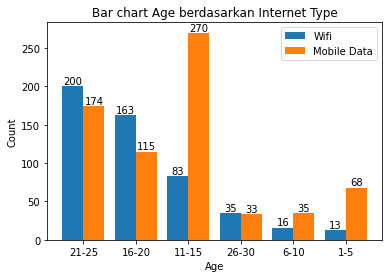

Persentase Education Level pada Internet Type:
University: 37.84% (456/1205) [Wifi:55.92% (255/456), Mobile Data:44.08% (201/456)]
College: 18.17% (219/1205) [Wifi:54.79% (120/219), Mobile Data:45.21% (99/219)]
School: 43.98% (530/1205) [Wifi:25.47% (135/530), Mobile Data:74.53% (395/530)]


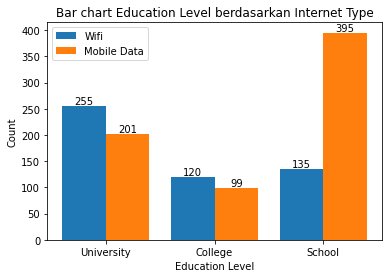

Persentase Institution Type pada Internet Type:
Non Government: 68.3% (823/1205) [Wifi:44.35% (365/823), Mobile Data:55.65% (458/823)]
Government: 31.7% (382/1205) [Wifi:37.96% (145/382), Mobile Data:62.04% (237/382)]


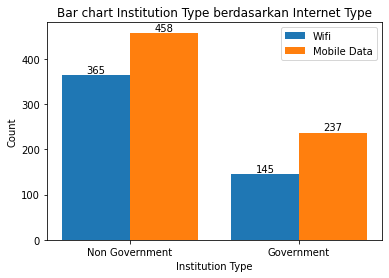

Persentase IT Student pada Internet Type:
No: 74.77% (901/1205) [Wifi:39.07% (352/901), Mobile Data:60.93% (549/901)]
Yes: 25.23% (304/1205) [Wifi:51.97% (158/304), Mobile Data:48.03% (146/304)]


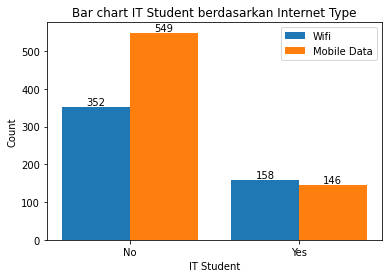

Persentase Is City pada Internet Type:
Yes: 77.59% (935/1205) [Wifi:48.24% (451/935), Mobile Data:51.76% (484/935)]
No: 22.41% (270/1205) [Wifi:21.85% (59/270), Mobile Data:78.15% (211/270)]


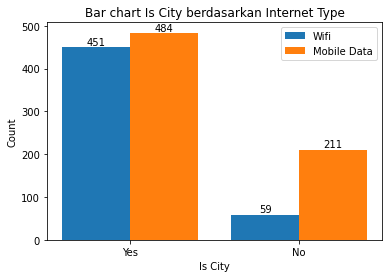

Persentase Load-shedding pada Internet Type:
Low: 83.32% (1004/1205) [Wifi:42.03% (422/1004), Mobile Data:57.97% (582/1004)]
High: 16.68% (201/1205) [Wifi:43.78% (88/201), Mobile Data:56.22% (113/201)]


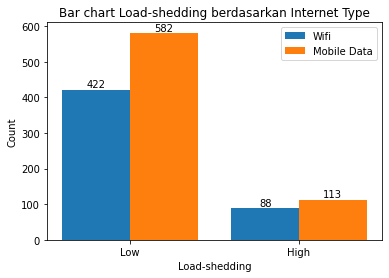

Persentase Financial Condition pada Internet Type:
Mid: 72.86% (878/1205) [Wifi:46.13% (405/878), Mobile Data:53.87% (473/878)]
Poor: 20.08% (242/1205) [Wifi:17.77% (43/242), Mobile Data:82.23% (199/242)]
Rich: 7.05% (85/1205) [Wifi:72.94% (62/85), Mobile Data:27.06% (23/85)]


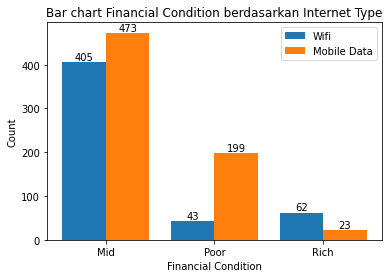

Persentase Network Type pada Internet Type:
4G: 64.32% (775/1205) [Wifi:55.23% (428/775), Mobile Data:44.77% (347/775)]
3G: 34.11% (411/1205) [Wifi:18.73% (77/411), Mobile Data:81.27% (334/411)]
2G: 1.58% (19/1205) [Wifi:26.32% (5/19), Mobile Data:73.68% (14/19)]


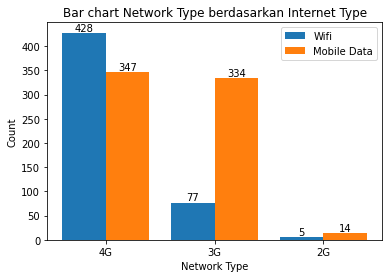

Persentase Class Duration pada Internet Type:
3-6: 17.51% (211/1205) [Wifi:71.56% (151/211), Mobile Data:28.44% (60/211)]
1-3: 69.71% (840/1205) [Wifi:37.38% (314/840), Mobile Data:62.62% (526/840)]
0: 12.78% (154/1205) [Wifi:29.22% (45/154), Mobile Data:70.78% (109/154)]


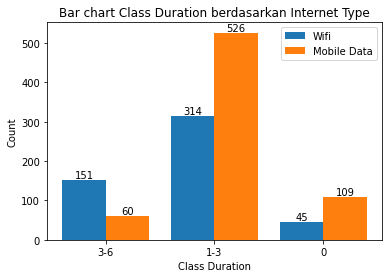

Persentase Self Lms pada Internet Type:
No: 82.57% (995/1205) [Wifi:40.4% (402/995), Mobile Data:59.6% (593/995)]
Yes: 17.43% (210/1205) [Wifi:51.43% (108/210), Mobile Data:48.57% (102/210)]


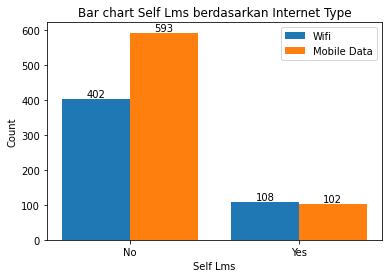

Persentase Device pada Internet Type:
Tab: 2.49% (30/1205) [Wifi:100.0% (30/30), Mobile Data:0.0% (0/30)]
Mobile: 84.07% (1013/1205) [Wifi:33.27% (337/1013), Mobile Data:66.73% (676/1013)]
Computer: 13.44% (162/1205) [Wifi:88.27% (143/162), Mobile Data:11.73% (19/162)]


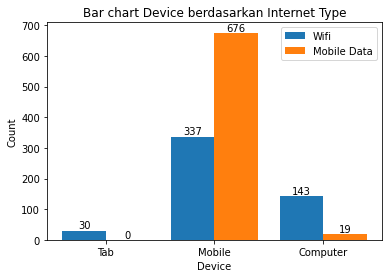

Persentase Adaptivity Level pada Internet Type:
Moderate: 51.87% (625/1205) [Wifi:40.64% (254/625), Mobile Data:59.36% (371/625)]
Low: 39.83% (480/1205) [Wifi:40.0% (192/480), Mobile Data:60.0% (288/480)]
High: 8.3% (100/1205) [Wifi:64.0% (64/100), Mobile Data:36.0% (36/100)]


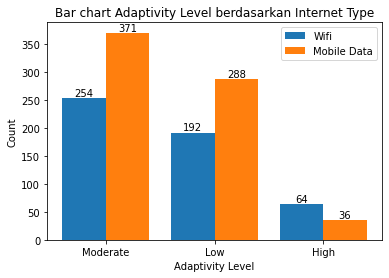

In [ ]:
for col in [x for x in df_eda.columns if x != 'Internet Type']:
  cetakPersentase(col,'Internet Type')
  cetakBar(col,'Internet Type')

###Network Type

Informasi yang diperoleh

- Tidak ada hubungan gender dan network type
- Tidak ada siswa di umur 1-5 yang menggunakan selain jaringan 4G, kebanyakan yang menggunakan 2G merupakan umur 21-25
- Tidak ada hubungan education level dan network type
- 12/19 siswa yang menggunakan 2G berada di sekolah negeri
- 2/19 siswa yang menggunakan 2G merupakan siswa IT
- 5/19 siswa yang menggunakan 2G tinggal di kota
- Tidak ada siswa kaya yang menggunakan 2G
- Hampir semua wifi sudah 4G
- Tidak ada hubungan class duration dan network type
- Siswa yang menggunakan self lms lebih cenderung menggunakan 3G dibanding 4G
- Masih ada siswa pengguna Tab yang menggunakan 2G tetapi tidak ada komputer yang mengggunakna 2G
- Semakin bagus tipe networknya, semakin tinggi tingkat adaptasinya

Persentase Gender pada Network Type:
Boy: 55.02% (663/1205) [4G:65.01% (431/663), 3G:34.24% (227/663), 2G:0.75% (5/663)]
Girl: 44.98% (542/1205) [4G:63.47% (344/542), 3G:33.95% (184/542), 2G:2.58% (14/542)]


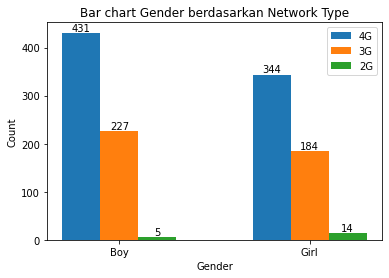

Persentase Age pada Network Type:
21-25: 31.04% (374/1205) [4G:63.1% (236/374), 3G:34.49% (129/374), 2G:2.41% (9/374)]
16-20: 23.07% (278/1205) [4G:73.02% (203/278), 3G:25.9% (72/278), 2G:1.08% (3/278)]
11-15: 29.29% (353/1205) [4G:49.86% (176/353), 3G:49.29% (174/353), 2G:0.85% (3/353)]
26-30: 5.64% (68/1205) [4G:89.71% (61/68), 3G:10.29% (7/68), 2G:0.0% (0/68)]
6-10: 4.23% (51/1205) [4G:35.29% (18/51), 3G:56.86% (29/51), 2G:7.84% (4/51)]
1-5: 6.72% (81/1205) [4G:100.0% (81/81), 3G:0.0% (0/81), 2G:0.0% (0/81)]


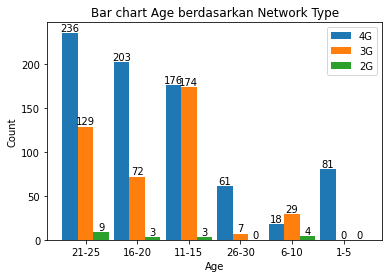

Persentase Education Level pada Network Type:
University: 37.84% (456/1205) [4G:65.57% (299/456), 3G:32.46% (148/456), 2G:1.97% (9/456)]
College: 18.17% (219/1205) [4G:75.34% (165/219), 3G:23.29% (51/219), 2G:1.37% (3/219)]
School: 43.98% (530/1205) [4G:58.68% (311/530), 3G:40.0% (212/530), 2G:1.32% (7/530)]


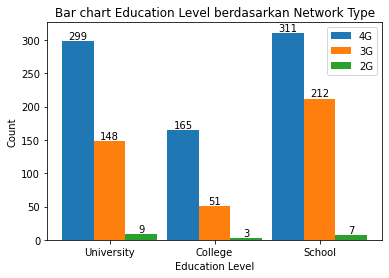

Persentase Institution Type pada Network Type:
Non Government: 68.3% (823/1205) [4G:61.48% (506/823), 3G:37.67% (310/823), 2G:0.85% (7/823)]
Government: 31.7% (382/1205) [4G:70.42% (269/382), 3G:26.44% (101/382), 2G:3.14% (12/382)]


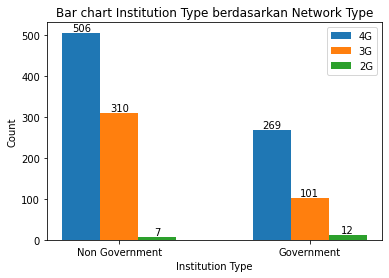

Persentase IT Student pada Network Type:
No: 74.77% (901/1205) [4G:68.48% (617/901), 3G:29.63% (267/901), 2G:1.89% (17/901)]
Yes: 25.23% (304/1205) [4G:51.97% (158/304), 3G:47.37% (144/304), 2G:0.66% (2/304)]


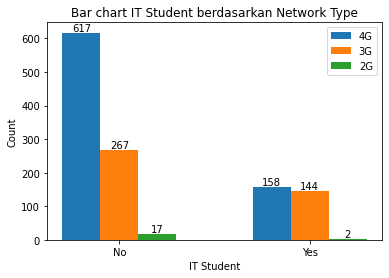

Persentase Is City pada Network Type:
Yes: 77.59% (935/1205) [4G:68.02% (636/935), 3G:31.44% (294/935), 2G:0.53% (5/935)]
No: 22.41% (270/1205) [4G:51.48% (139/270), 3G:43.33% (117/270), 2G:5.19% (14/270)]


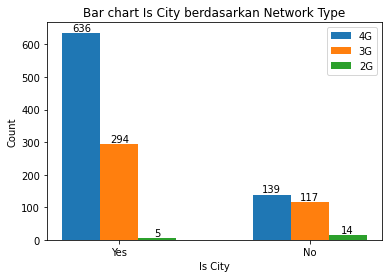

Persentase Load-shedding pada Network Type:
Low: 83.32% (1004/1205) [4G:67.43% (677/1004), 3G:31.67% (318/1004), 2G:0.9% (9/1004)]
High: 16.68% (201/1205) [4G:48.76% (98/201), 3G:46.27% (93/201), 2G:4.98% (10/201)]


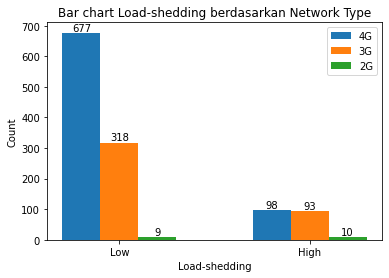

Persentase Financial Condition pada Network Type:
Mid: 72.86% (878/1205) [4G:66.86% (587/878), 3G:31.89% (280/878), 2G:1.25% (11/878)]
Poor: 20.08% (242/1205) [4G:48.35% (117/242), 3G:48.35% (117/242), 2G:3.31% (8/242)]
Rich: 7.05% (85/1205) [4G:83.53% (71/85), 3G:16.47% (14/85), 2G:0.0% (0/85)]


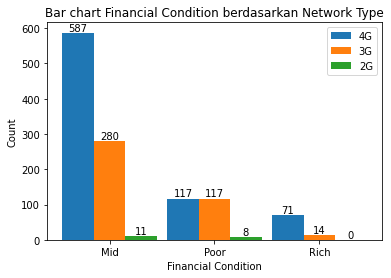

Persentase Internet Type pada Network Type:
Wifi: 42.32% (510/1205) [4G:83.92% (428/510), 3G:15.1% (77/510), 2G:0.98% (5/510)]
Mobile Data: 57.68% (695/1205) [4G:49.93% (347/695), 3G:48.06% (334/695), 2G:2.01% (14/695)]


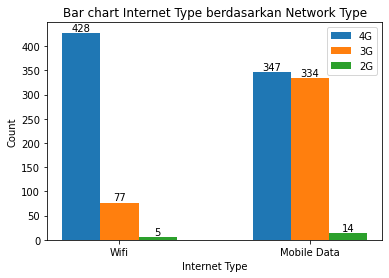

Persentase Class Duration pada Network Type:
3-6: 17.51% (211/1205) [4G:66.82% (141/211), 3G:30.81% (65/211), 2G:2.37% (5/211)]
1-3: 69.71% (840/1205) [4G:62.5% (525/840), 3G:36.07% (303/840), 2G:1.43% (12/840)]
0: 12.78% (154/1205) [4G:70.78% (109/154), 3G:27.92% (43/154), 2G:1.3% (2/154)]


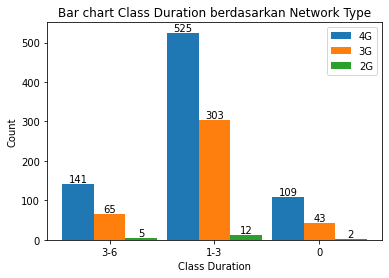

Persentase Self Lms pada Network Type:
No: 82.57% (995/1205) [4G:69.35% (690/995), 3G:28.94% (288/995), 2G:1.71% (17/995)]
Yes: 17.43% (210/1205) [4G:40.48% (85/210), 3G:58.57% (123/210), 2G:0.95% (2/210)]


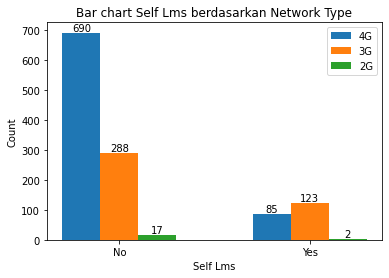

Persentase Device pada Network Type:
Tab: 2.49% (30/1205) [4G:93.33% (28/30), 3G:0.0% (0/30), 2G:6.67% (2/30)]
Mobile: 84.07% (1013/1205) [4G:61.5% (623/1013), 3G:36.82% (373/1013), 2G:1.68% (17/1013)]
Computer: 13.44% (162/1205) [4G:76.54% (124/162), 3G:23.46% (38/162), 2G:0.0% (0/162)]


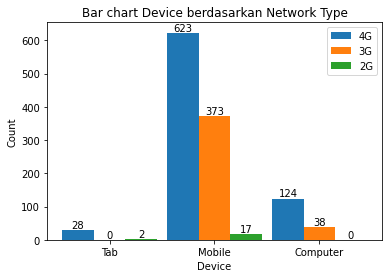

Persentase Adaptivity Level pada Network Type:
Moderate: 51.87% (625/1205) [4G:67.04% (419/625), 3G:32.48% (203/625), 2G:0.48% (3/625)]
Low: 39.83% (480/1205) [4G:57.92% (278/480), 3G:38.75% (186/480), 2G:3.33% (16/480)]
High: 8.3% (100/1205) [4G:78.0% (78/100), 3G:22.0% (22/100), 2G:0.0% (0/100)]


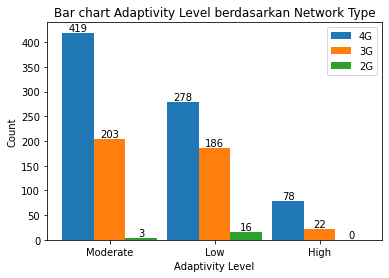

In [ ]:
for col in [x for x in df_eda.columns if x != 'Network Type']:
  cetakPersentase(col,'Network Type')
  cetakBar(col,'Network Type')

###Class Duration

Informasi yang diperoleh

- Tidak ada hubungan gender dan class duration
- Kebanyakan durasi kelas 3-6 jam adalah kelas siswa umur 21-25
- Kebanyakan durasi kelas 3-6 jam adalah universitas
- Institusi negeri lebih berkemungkinan untuk memiliki durasi kelas 0 jam sedangkan institusi swasta lebih berkemungkinan memiliki durasi kelas 3-6 jam
- Siswa IT lebih berkemungkinan untuk memiliki kelas 3-6 jam
- 31.48% dari siswa yang tinggal di non kota memiliki kelas dengan durasi 0 jam
- 32.84% dari siswa yang memiliki tingkat pelepasan stres tinggi memiliki kelas 3-6 jam
- Hanya 2/85 siswa kaya yang memiliki durasi kelas 0 jam
- Siswa yang memiliki kelas 3-6 jam cenderung menggunakan wifi dibanding mobile data
- Tidak ada hubungan network type dan class duration
- Siswa yang sekolahnya memiliki self lms cenderung memiliki kelas 3-6 jam 
- Siswa dengan durasi 3-6 jam lebih cenderung menggunakan tab atau komputer
- Siswa yang memiliki kelas 0 jam lebih cenderung memiliki tingkat adaptasi rendah

Persentase Gender pada Class Duration:
Boy: 55.02% (663/1205) [3-6:19.61% (130/663), 1-3:67.27% (446/663), 0:13.12% (87/663)]
Girl: 44.98% (542/1205) [3-6:14.94% (81/542), 1-3:72.69% (394/542), 0:12.36% (67/542)]


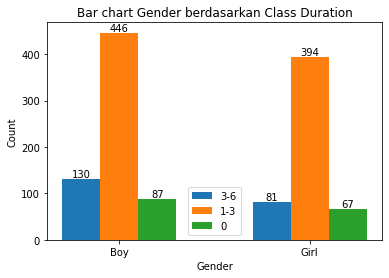

Persentase Age pada Class Duration:
21-25: 31.04% (374/1205) [3-6:39.57% (148/374), 1-3:48.13% (180/374), 0:12.3% (46/374)]
16-20: 23.07% (278/1205) [3-6:15.47% (43/278), 1-3:72.3% (201/278), 0:12.23% (34/278)]
11-15: 29.29% (353/1205) [3-6:3.68% (13/353), 1-3:86.69% (306/353), 0:9.63% (34/353)]
26-30: 5.64% (68/1205) [3-6:4.41% (3/68), 1-3:61.76% (42/68), 0:33.82% (23/68)]
6-10: 4.23% (51/1205) [3-6:7.84% (4/51), 1-3:64.71% (33/51), 0:27.45% (14/51)]
1-5: 6.72% (81/1205) [3-6:0.0% (0/81), 1-3:96.3% (78/81), 0:3.7% (3/81)]


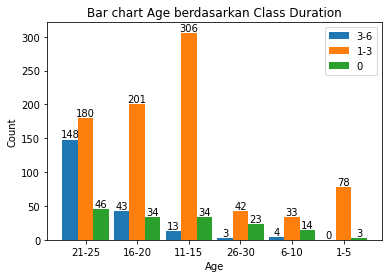

Persentase Education Level pada Class Duration:
University: 37.84% (456/1205) [3-6:34.21% (156/456), 1-3:52.85% (241/456), 0:12.94% (59/456)]
College: 18.17% (219/1205) [3-6:17.35% (38/219), 1-3:68.49% (150/219), 0:14.16% (31/219)]
School: 43.98% (530/1205) [3-6:3.21% (17/530), 1-3:84.72% (449/530), 0:12.08% (64/530)]


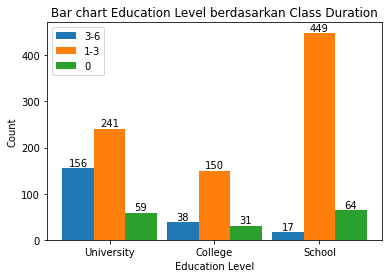

Persentase Institution Type pada Class Duration:
Non Government: 68.3% (823/1205) [3-6:23.33% (192/823), 1-3:71.08% (585/823), 0:5.59% (46/823)]
Government: 31.7% (382/1205) [3-6:4.97% (19/382), 1-3:66.75% (255/382), 0:28.27% (108/382)]


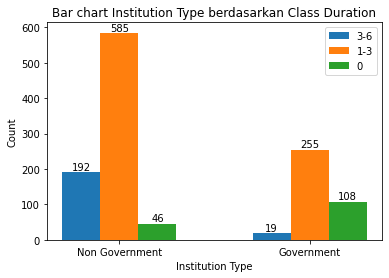

Persentase IT Student pada Class Duration:
No: 74.77% (901/1205) [3-6:12.76% (115/901), 1-3:71.92% (648/901), 0:15.32% (138/901)]
Yes: 25.23% (304/1205) [3-6:31.58% (96/304), 1-3:63.16% (192/304), 0:5.26% (16/304)]


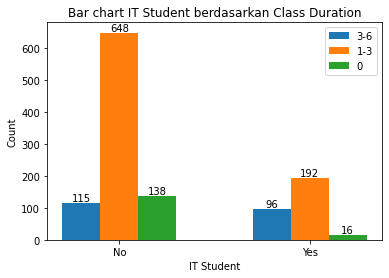

Persentase Is City pada Class Duration:
Yes: 77.59% (935/1205) [3-6:18.5% (173/935), 1-3:74.12% (693/935), 0:7.38% (69/935)]
No: 22.41% (270/1205) [3-6:14.07% (38/270), 1-3:54.44% (147/270), 0:31.48% (85/270)]


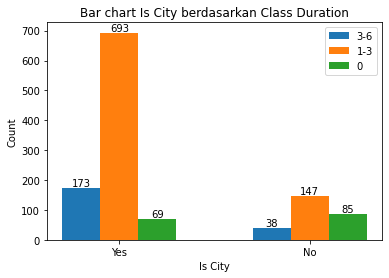

Persentase Load-shedding pada Class Duration:
Low: 83.32% (1004/1205) [3-6:14.44% (145/1004), 1-3:72.91% (732/1004), 0:12.65% (127/1004)]
High: 16.68% (201/1205) [3-6:32.84% (66/201), 1-3:53.73% (108/201), 0:13.43% (27/201)]


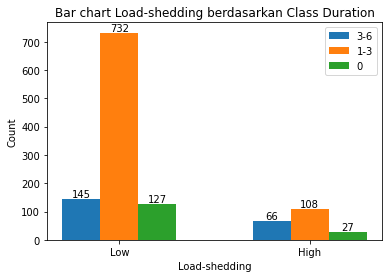

Persentase Financial Condition pada Class Duration:
Mid: 72.86% (878/1205) [3-6:18.45% (162/878), 1-3:68.56% (602/878), 0:12.98% (114/878)]
Poor: 20.08% (242/1205) [3-6:11.16% (27/242), 1-3:73.14% (177/242), 0:15.7% (38/242)]
Rich: 7.05% (85/1205) [3-6:25.88% (22/85), 1-3:71.76% (61/85), 0:2.35% (2/85)]


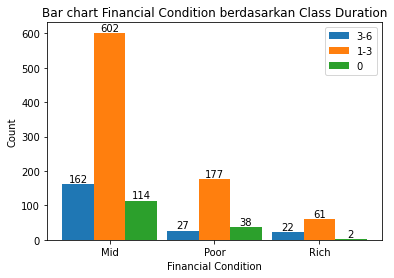

Persentase Internet Type pada Class Duration:
Wifi: 42.32% (510/1205) [3-6:29.61% (151/510), 1-3:61.57% (314/510), 0:8.82% (45/510)]
Mobile Data: 57.68% (695/1205) [3-6:8.63% (60/695), 1-3:75.68% (526/695), 0:15.68% (109/695)]


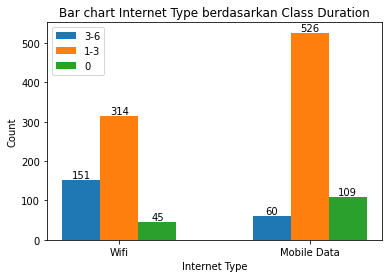

Persentase Network Type pada Class Duration:
4G: 64.32% (775/1205) [3-6:18.19% (141/775), 1-3:67.74% (525/775), 0:14.06% (109/775)]
3G: 34.11% (411/1205) [3-6:15.82% (65/411), 1-3:73.72% (303/411), 0:10.46% (43/411)]
2G: 1.58% (19/1205) [3-6:26.32% (5/19), 1-3:63.16% (12/19), 0:10.53% (2/19)]


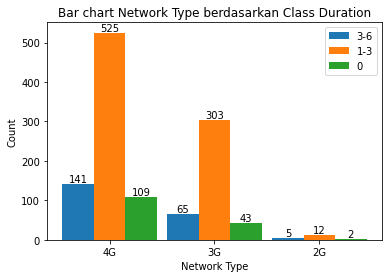

Persentase Self Lms pada Class Duration:
No: 82.57% (995/1205) [3-6:13.77% (137/995), 1-3:70.95% (706/995), 0:15.28% (152/995)]
Yes: 17.43% (210/1205) [3-6:35.24% (74/210), 1-3:63.81% (134/210), 0:0.95% (2/210)]


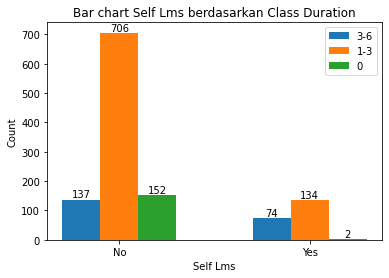

Persentase Device pada Class Duration:
Tab: 2.49% (30/1205) [3-6:83.33% (25/30), 1-3:16.67% (5/30), 0:0.0% (0/30)]
Mobile: 84.07% (1013/1205) [3-6:11.35% (115/1013), 1-3:74.04% (750/1013), 0:14.61% (148/1013)]
Computer: 13.44% (162/1205) [3-6:43.83% (71/162), 1-3:52.47% (85/162), 0:3.7% (6/162)]


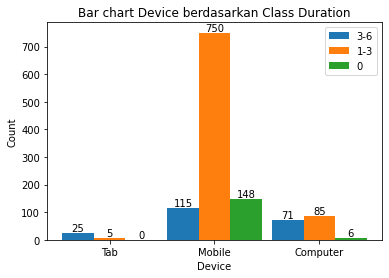

Persentase Adaptivity Level pada Class Duration:
Moderate: 51.87% (625/1205) [3-6:23.52% (147/625), 1-3:74.88% (468/625), 0:1.6% (10/625)]
Low: 39.83% (480/1205) [3-6:9.58% (46/480), 1-3:60.42% (290/480), 0:30.0% (144/480)]
High: 8.3% (100/1205) [3-6:18.0% (18/100), 1-3:82.0% (82/100), 0:0.0% (0/100)]


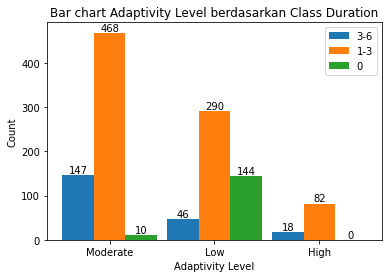

In [ ]:
for col in [x for x in df_eda.columns if x != 'Class Duration']:
  cetakPersentase(col,'Class Duration')
  cetakBar(col,'Class Duration')

###Self Lms

Informasi yang diperoleh

- Tidak ada hubungan gender dan self lms
- Siswa cenderung menggunakan self lms mulai umur 16
- Universitas yang paling cenderung menggunakan self lms sedangkan sekolah yang paling tidak mungkin
- Tidak ada hubungan self lms dan institution type
- siswa non IT lebih cenderung tidak menggunakan self lms
- Tidak ada hubungan self lms dan is city
- Siswa dengan tingkat pelepasan stress tinggi lebih cenderung menggunakan self lms
- Tidak ada hubungan self lms dan financial condition
- Tidak ada hubungan self lms dan internet type
- Pengguna 3G lebih cenderung menggunakan self lms
- Semakin lama durasi kelasnya, maka semakin berkemungkinan untuk menggunakan self lms
- Siswa yang menggunakan self lms lebih cenderung menggunakan komputer
- Semakin menggunakan self lms, semakin berkemungkinan untuk memiliki tingkat adaptasi tinggi

Persentase Gender pada Self Lms:
Boy: 55.02% (663/1205) [No:77.83% (516/663), Yes:22.17% (147/663)]
Girl: 44.98% (542/1205) [No:88.38% (479/542), Yes:11.62% (63/542)]


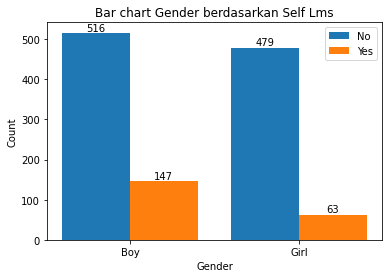

Persentase Age pada Self Lms:
21-25: 31.04% (374/1205) [No:59.36% (222/374), Yes:40.64% (152/374)]
16-20: 23.07% (278/1205) [No:83.09% (231/278), Yes:16.91% (47/278)]
11-15: 29.29% (353/1205) [No:100.0% (353/353), Yes:0.0% (0/353)]
26-30: 5.64% (68/1205) [No:88.24% (60/68), Yes:11.76% (8/68)]
6-10: 4.23% (51/1205) [No:100.0% (51/51), Yes:0.0% (0/51)]
1-5: 6.72% (81/1205) [No:96.3% (78/81), Yes:3.7% (3/81)]


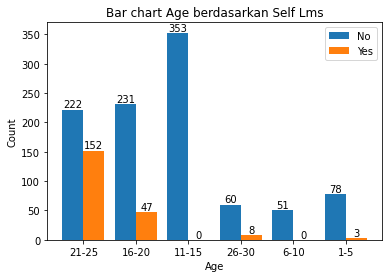

Persentase Education Level pada Self Lms:
University: 37.84% (456/1205) [No:60.96% (278/456), Yes:39.04% (178/456)]
College: 18.17% (219/1205) [No:86.76% (190/219), Yes:13.24% (29/219)]
School: 43.98% (530/1205) [No:99.43% (527/530), Yes:0.57% (3/530)]


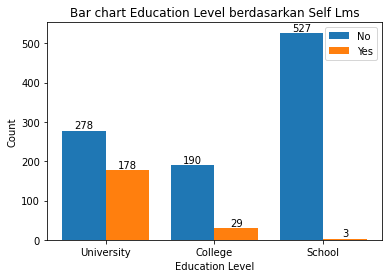

Persentase Institution Type pada Self Lms:
Non Government: 68.3% (823/1205) [No:80.07% (659/823), Yes:19.93% (164/823)]
Government: 31.7% (382/1205) [No:87.96% (336/382), Yes:12.04% (46/382)]


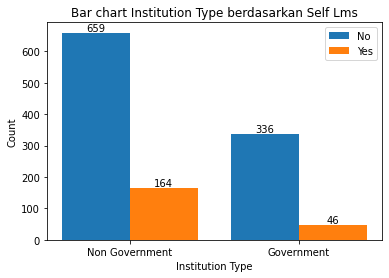

Persentase IT Student pada Self Lms:
No: 74.77% (901/1205) [No:92.56% (834/901), Yes:7.44% (67/901)]
Yes: 25.23% (304/1205) [No:52.96% (161/304), Yes:47.04% (143/304)]


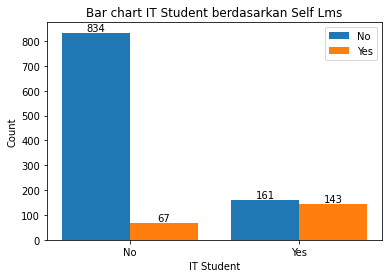

Persentase Is City pada Self Lms:
Yes: 77.59% (935/1205) [No:83.32% (779/935), Yes:16.68% (156/935)]
No: 22.41% (270/1205) [No:80.0% (216/270), Yes:20.0% (54/270)]


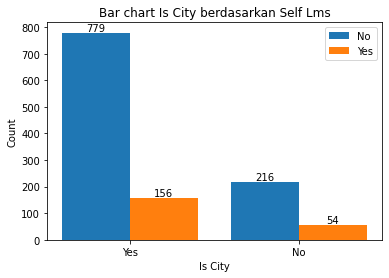

Persentase Load-shedding pada Self Lms:
Low: 83.32% (1004/1205) [No:85.76% (861/1004), Yes:14.24% (143/1004)]
High: 16.68% (201/1205) [No:66.67% (134/201), Yes:33.33% (67/201)]


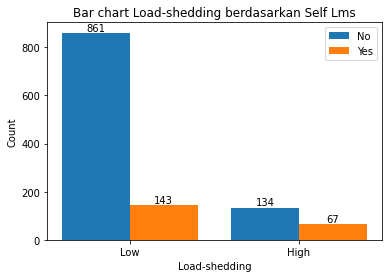

Persentase Financial Condition pada Self Lms:
Mid: 72.86% (878/1205) [No:81.32% (714/878), Yes:18.68% (164/878)]
Poor: 20.08% (242/1205) [No:84.3% (204/242), Yes:15.7% (38/242)]
Rich: 7.05% (85/1205) [No:90.59% (77/85), Yes:9.41% (8/85)]


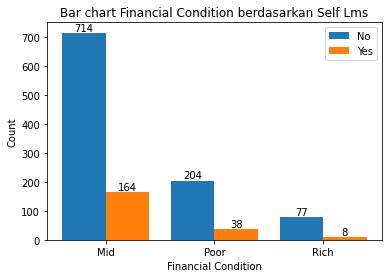

Persentase Internet Type pada Self Lms:
Wifi: 42.32% (510/1205) [No:78.82% (402/510), Yes:21.18% (108/510)]
Mobile Data: 57.68% (695/1205) [No:85.32% (593/695), Yes:14.68% (102/695)]


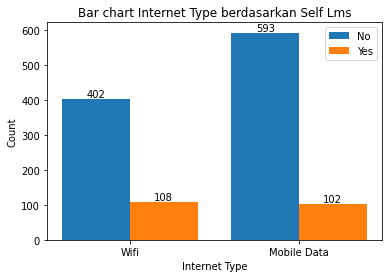

Persentase Network Type pada Self Lms:
4G: 64.32% (775/1205) [No:89.03% (690/775), Yes:10.97% (85/775)]
3G: 34.11% (411/1205) [No:70.07% (288/411), Yes:29.93% (123/411)]
2G: 1.58% (19/1205) [No:89.47% (17/19), Yes:10.53% (2/19)]


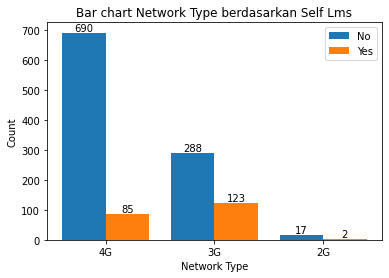

Persentase Class Duration pada Self Lms:
3-6: 17.51% (211/1205) [No:64.93% (137/211), Yes:35.07% (74/211)]
1-3: 69.71% (840/1205) [No:84.05% (706/840), Yes:15.95% (134/840)]
0: 12.78% (154/1205) [No:98.7% (152/154), Yes:1.3% (2/154)]


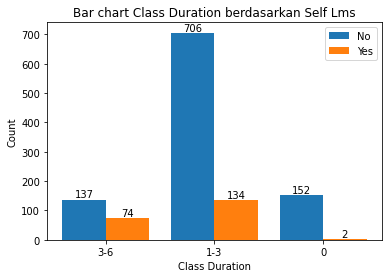

Persentase Device pada Self Lms:
Tab: 2.49% (30/1205) [No:76.67% (23/30), Yes:23.33% (7/30)]
Mobile: 84.07% (1013/1205) [No:86.57% (877/1013), Yes:13.43% (136/1013)]
Computer: 13.44% (162/1205) [No:58.64% (95/162), Yes:41.36% (67/162)]


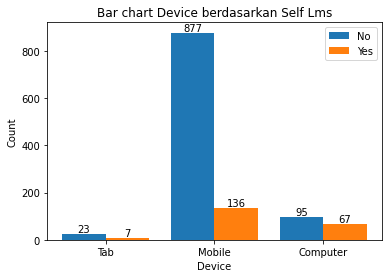

Persentase Adaptivity Level pada Self Lms:
Moderate: 51.87% (625/1205) [No:79.52% (497/625), Yes:20.48% (128/625)]
Low: 39.83% (480/1205) [No:89.17% (428/480), Yes:10.83% (52/480)]
High: 8.3% (100/1205) [No:70.0% (70/100), Yes:30.0% (30/100)]


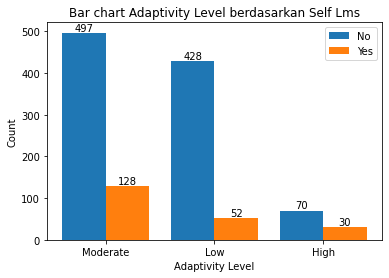

In [ ]:
for col in [x for x in df_eda.columns if x != 'Self Lms']:
  cetakPersentase(col,'Self Lms')
  cetakBar(col,'Self Lms')

###Device

Informasi yang diperoleh

- Laki-laki lebih cenderung menggunakan komputer dibandingkan perempuan
- Pengguna gadget paling bervariasi di umur 21-25 dan mulai menggunakan gadget selain hp di umur 11-15
- Siswa universitas lebih cenderung menggunakan komputer dan tab dibanding siswa di tingkat lain
- Siswa di institusi swasta lebih cenderung menggunakan komputer dibanding siswa di institusi negeri
- Siswa IT lebih cenderung menggunakan komputer dibanding siswa non IT
- Siswa yang tinggal di kota cenderung memiliki variasi gadget
- Tidak ada hubungan load-shedding dan device
- Siswa kaya lebih cenderung menggunakan tab dan komputer dibanding siswa dengan kondisi keuangan lainnya
- Tidak ada tab yang menggunakan data, dan komputer lebih cenderung menggunakan wifi dibanding mobile data
- Komputer tidak ada yang menggunakan 2G dan Tab tidak ada yang menggunakan 3G
- Siswa yang menggunakan Tab dan komputer lebih cenderung memiliki kelas 3-6 jam
- Siswa yang menggunakan komputer lebih cenderung menggunakan self lms
- Siswa yang memiliki komputer lebih cenderung untuk memiliki tingkat adaptasi tinggi

Persentase Gender pada Device:
Boy: 55.02% (663/1205) [Tab:2.87% (19/663), Mobile:78.43% (520/663), Computer:18.7% (124/663)]
Girl: 44.98% (542/1205) [Tab:2.03% (11/542), Mobile:90.96% (493/542), Computer:7.01% (38/542)]


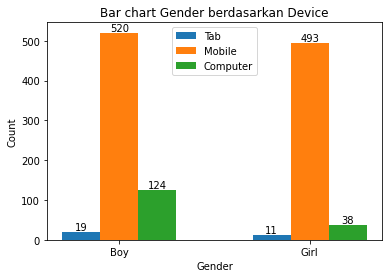

Persentase Age pada Device:
21-25: 31.04% (374/1205) [Tab:6.68% (25/374), Mobile:62.83% (235/374), Computer:30.48% (114/374)]
16-20: 23.07% (278/1205) [Tab:1.8% (5/278), Mobile:91.01% (253/278), Computer:7.19% (20/278)]
11-15: 29.29% (353/1205) [Tab:0.0% (0/353), Mobile:96.88% (342/353), Computer:3.12% (11/353)]
26-30: 5.64% (68/1205) [Tab:0.0% (0/68), Mobile:75.0% (51/68), Computer:25.0% (17/68)]
6-10: 4.23% (51/1205) [Tab:0.0% (0/51), Mobile:100.0% (51/51), Computer:0.0% (0/51)]
1-5: 6.72% (81/1205) [Tab:0.0% (0/81), Mobile:100.0% (81/81), Computer:0.0% (0/81)]


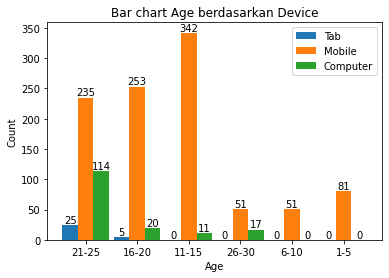

Persentase Education Level pada Device:
University: 37.84% (456/1205) [Tab:5.48% (25/456), Mobile:62.94% (287/456), Computer:31.58% (144/456)]
College: 18.17% (219/1205) [Tab:2.28% (5/219), Mobile:95.43% (209/219), Computer:2.28% (5/219)]
School: 43.98% (530/1205) [Tab:0.0% (0/530), Mobile:97.55% (517/530), Computer:2.45% (13/530)]


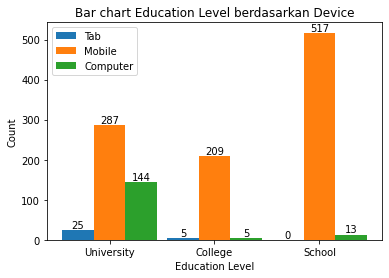

Persentase Institution Type pada Device:
Non Government: 68.3% (823/1205) [Tab:3.04% (25/823), Mobile:80.44% (662/823), Computer:16.52% (136/823)]
Government: 31.7% (382/1205) [Tab:1.31% (5/382), Mobile:91.88% (351/382), Computer:6.81% (26/382)]


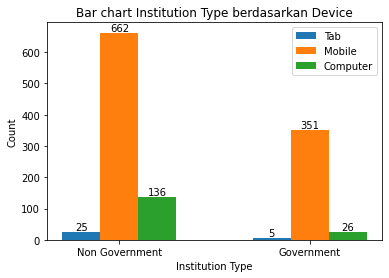

Persentase IT Student pada Device:
No: 74.77% (901/1205) [Tab:2.55% (23/901), Mobile:92.56% (834/901), Computer:4.88% (44/901)]
Yes: 25.23% (304/1205) [Tab:2.3% (7/304), Mobile:58.88% (179/304), Computer:38.82% (118/304)]


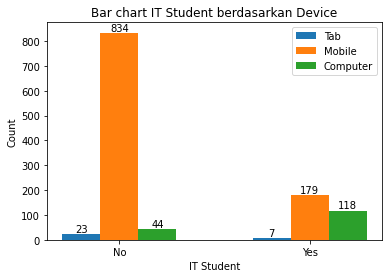

Persentase Is City pada Device:
Yes: 77.59% (935/1205) [Tab:2.99% (28/935), Mobile:81.6% (763/935), Computer:15.4% (144/935)]
No: 22.41% (270/1205) [Tab:0.74% (2/270), Mobile:92.59% (250/270), Computer:6.67% (18/270)]


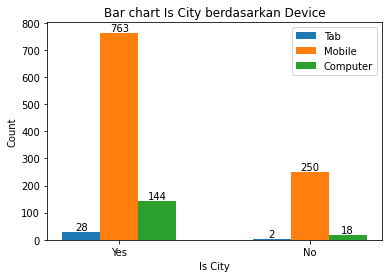

Persentase Load-shedding pada Device:
Low: 83.32% (1004/1205) [Tab:2.79% (28/1004), Mobile:84.36% (847/1004), Computer:12.85% (129/1004)]
High: 16.68% (201/1205) [Tab:1.0% (2/201), Mobile:82.59% (166/201), Computer:16.42% (33/201)]


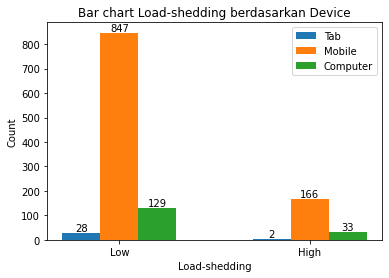

Persentase Financial Condition pada Device:
Mid: 72.86% (878/1205) [Tab:2.73% (24/878), Mobile:83.26% (731/878), Computer:14.01% (123/878)]
Poor: 20.08% (242/1205) [Tab:0.83% (2/242), Mobile:92.15% (223/242), Computer:7.02% (17/242)]
Rich: 7.05% (85/1205) [Tab:4.71% (4/85), Mobile:69.41% (59/85), Computer:25.88% (22/85)]


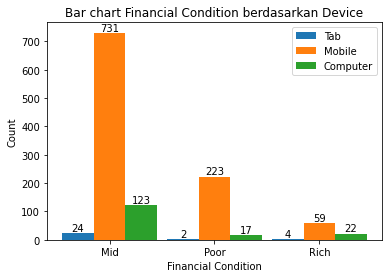

Persentase Internet Type pada Device:
Wifi: 42.32% (510/1205) [Tab:5.88% (30/510), Mobile:66.08% (337/510), Computer:28.04% (143/510)]
Mobile Data: 57.68% (695/1205) [Tab:0.0% (0/695), Mobile:97.27% (676/695), Computer:2.73% (19/695)]


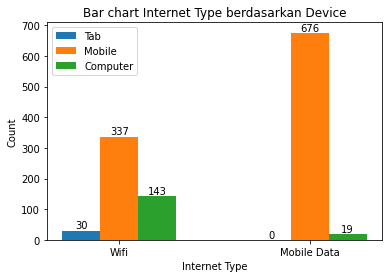

Persentase Network Type pada Device:
4G: 64.32% (775/1205) [Tab:3.61% (28/775), Mobile:80.39% (623/775), Computer:16.0% (124/775)]
3G: 34.11% (411/1205) [Tab:0.0% (0/411), Mobile:90.75% (373/411), Computer:9.25% (38/411)]
2G: 1.58% (19/1205) [Tab:10.53% (2/19), Mobile:89.47% (17/19), Computer:0.0% (0/19)]


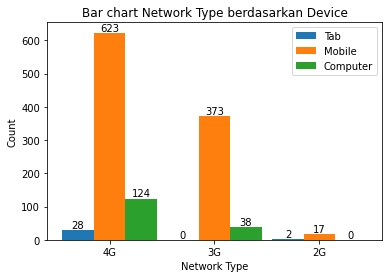

Persentase Class Duration pada Device:
3-6: 17.51% (211/1205) [Tab:11.85% (25/211), Mobile:54.5% (115/211), Computer:33.65% (71/211)]
1-3: 69.71% (840/1205) [Tab:0.6% (5/840), Mobile:89.29% (750/840), Computer:10.12% (85/840)]
0: 12.78% (154/1205) [Tab:0.0% (0/154), Mobile:96.1% (148/154), Computer:3.9% (6/154)]


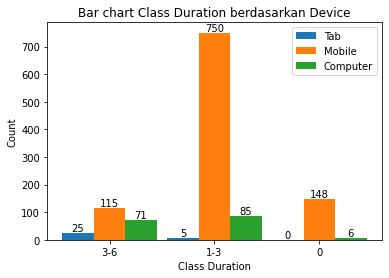

Persentase Self Lms pada Device:
No: 82.57% (995/1205) [Tab:2.31% (23/995), Mobile:88.14% (877/995), Computer:9.55% (95/995)]
Yes: 17.43% (210/1205) [Tab:3.33% (7/210), Mobile:64.76% (136/210), Computer:31.9% (67/210)]


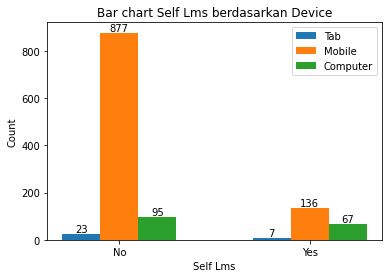

Persentase Adaptivity Level pada Device:
Moderate: 51.87% (625/1205) [Tab:4.16% (26/625), Mobile:81.12% (507/625), Computer:14.72% (92/625)]
Low: 39.83% (480/1205) [Tab:0.42% (2/480), Mobile:91.25% (438/480), Computer:8.33% (40/480)]
High: 8.3% (100/1205) [Tab:2.0% (2/100), Mobile:68.0% (68/100), Computer:30.0% (30/100)]


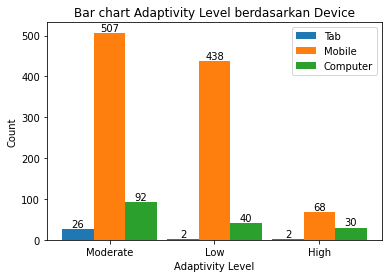

In [ ]:
for col in [x for x in df_eda.columns if x != 'Device']:
  cetakPersentase(col,'Device')
  cetakBar(col,'Device')

##Hasil EDA

Hasil EDA berikut merupakan rangkuman dari informasi-informasi yang telah diperoleh pada tahap-tahap sebelumnya

###Institusi swasta lebih bagus daripada institusi negeri

Untuk tingkat pendidikan selain College, jumlah institusi swastanya melebihi 50%. Salah satu yang membedakan institusi swasta dan negeri yaitu rata-rata durasi kelas mereka lebih lama 0.82 jam dibandingkan dengan durasi kelas institusi negeri. Salah satu pengaruhnya dalam kondisi pembelajaran online adalah siswa masih memerlukan durasi kelas yang idealnya 1-3 jam untuk memberi tingkat adaptasi yang lebih bagus. Selain dari itu, durasi jam yang lebih rendah pada institusi negeri juga menjadi pembuktian bahwa **institusi swasta lebih bagus dari institusi negeri**. Satu-satunya keuntungan dari institusi negeri dibanding dengan swasta adalah persebarannya yang seimbang antara kota dan non kota yaitu hanya dengan selisih 58 institusi yang menandakan bahwa pendidikan di wilayah non kota masih dipeduli oleh pemerintah. Walaupun begitu, selisih institusi negeri dan swasta di wilayah non kota juga tidak terlalu jauh yaitu hanya 54 institusi.

301/456 universitas dan 430/530 sekolah merupakan institusi swasta, sedangkan untuk college hanya 92/219. Untuk tingkat pendidikan selain college, **jumlah institusi swastanya melebihi 50% dari keseluruhan tingkat pendidikan tersebut**.

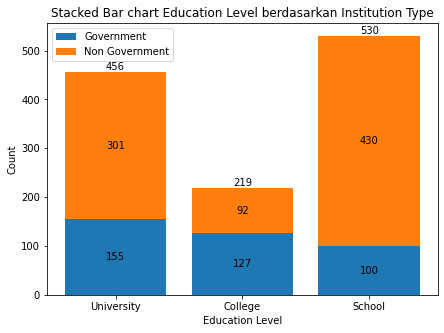

In [ ]:
kategori = 'Education Level' 
legenda = 'Institution Type'
n = df_eda[kategori].unique()
label = df_eda[legenda].unique()
data = {x:[df_eda.loc[(df_eda[kategori]==y) & (df_eda[legenda]==x),kategori].count() for y in n] for x in label}

plt.figure(figsize=(7,5))
p1 = plt.bar(n,data['Government'], label = 'Government')
plt.bar_label(p1, label_type='center')
p2 = plt.bar(n,data['Non Government'],bottom =data['Government'], label = 'Non Government')
plt.bar_label(p2, label_type='center')
plt.bar_label(p2)
plt.legend()
plt.xlabel(kategori)
plt.ylabel('Count')
plt.title(f'Stacked Bar chart {kategori} berdasarkan {legenda}')
plt.show()

Misalkan untuk tiap kategori durasi diubah menjadi median pada range durasi tersebut, maka rata-rata durasi untuk institusi swasta adalah 2.35 jam dan institusi negeri adalah 1.53 jam. **Perbedaan 0.82 jam ini cukup jauh dan menandakan bahwa institusi swasta lebih unggul dalam kualitas pendidikan**

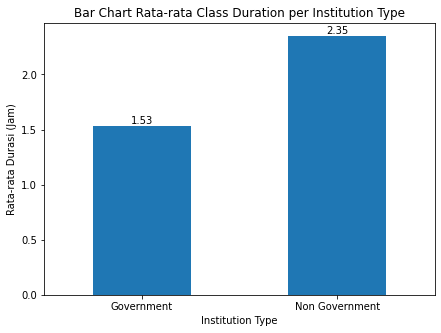

In [ ]:
remap = {'0':0,'1-3':2,'3-6':4}
data = df_eda[['Institution Type','Class Duration']].copy()
data['Class Duration'] = data['Class Duration'].apply(lambda x: remap[x])
p = data.groupby('Institution Type').mean().round(2).plot(kind='bar', y='Class Duration', 
                                                 figsize=(7,5), legend=None, rot=0,
                                                 title='Bar Chart Rata-rata Class Duration per Institution Type')
p.bar_label(p.containers[0])
p.set_ylabel('Rata-rata Durasi (Jam)')
plt.show()

Pada grafik dibawah terlihat bahwa **tingkat adaptasi rendah memiliki durasi 0 jam terbanyak** sedangkan **tingkat adaptasi tinggi tidak memiliki kelas berdurasi 0 jam sama sekali**. Walaupun begitu, bukan berarti juga semakin lama durasi kelasnya maka semakin tinggi tingkat adaptasinya. Oleh karena itu, durasi kelas yang ideal adalah 1-3 jam.

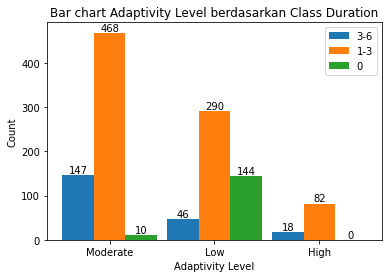

In [ ]:
cetakBar('Adaptivity Level','Class Duration')

Walaupun jauh lebih sedikit dibanding total institusi swasta, persebaran jumlah institusi negeri di kota dan non kota masih terbilang cukup bagus yang berarti **pemerintah masih dapat membantu warga-warga non kota dalam pendidikan mereka**.

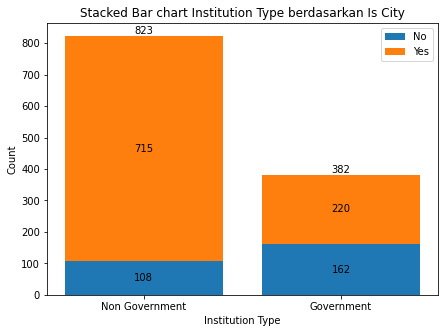

In [ ]:
kategori = 'Institution Type'
legenda = 'Is City'
n = df_eda[kategori].unique()
label = df_eda[legenda].unique()
data = {x:[df_eda.loc[(df_eda[kategori]==y) & (df_eda[legenda]==x),kategori].count() for y in n] for x in label}

plt.figure(figsize=(7,5))
p1 = plt.bar(n,data['No'], label = 'No')
plt.bar_label(p1, label_type='center')
p2 = plt.bar(n,data['Yes'],bottom =data['No'], label = 'Yes')
plt.bar_label(p2, label_type='center')
plt.bar_label(p2)
plt.legend()
plt.xlabel(kategori)
plt.ylabel('Count')
plt.title(f'Stacked Bar chart {kategori} berdasarkan {legenda}')
plt.show()

###Semakin tinggi tingkat pendidikannya, maka semakin tinggi kesulitannya juga.

Siswa yang sudah berada di universitas lebih cenderung memiliki tingkat pelepasan stres yang tinggi dibandingkan dengan siswa pada tingkatan lainnya. Hal ini mungkin karena semakin tinggi tingkat pendidikannya, maka durasi kelasnya semakin lama. Walaupun begitu, bukan berarti tingkat adaptasi siswa menjadi lebih buruk di tingkat pendidikan yang lebih sulit dikarenakan college yang memiliki rata-rata tingkat adaptasi paling rendah dibanding tingkat lain yaitu dengan selisih sebesar 0.25 dengaan tingkat pendidikan terdekat yaitu universitas.

Hal ini bisa saja disebabkan oleh faktor fasilitas yang digunakan oleh siswa pada tiap tingkatan. Untuk fasilitas seperti LMS sendiri dan gadget yang digunakan masih terbatas untuk siswa selain tingkat universitas. Untuk fasilitas lain seperti tipe internet dan jaringannya, college dan universitas masih lebih bervariasi daripada sekolah.


Berdasarkan jumlahnya, **total siswa universitas yang memiliki tingkat pelepasan stres tinggi lebih banyak daripada total gabungan siswa college dan sekolah** yaitu 104 siswa > 94 siswa. Selain dari itu, terlihat jelas bahwa sekolah memiliki tingkat pelepasan stres yang lebih rendah dibanding tingkatan pendidikan lainnya. 

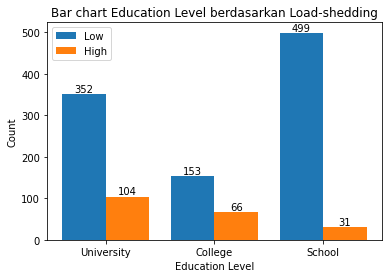

In [ ]:
cetakBar('Education Level','Load-shedding')

**Rata-rata Class Duration berkorelasi positif dengan tingkatan tiap pendidikan**, yang mana semakin tinggi tingkatan pendidikannya maka semakin lama juga durasi kelasnya. 

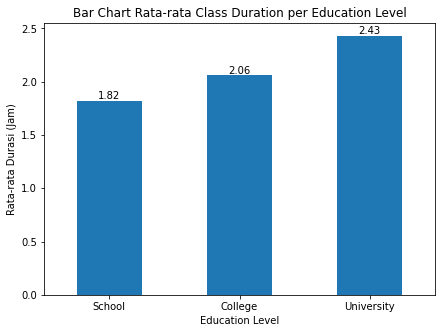

In [ ]:
remap = {'0':0,'1-3':2,'3-6':4}
data = df_eda[['Education Level','Class Duration']].copy()
data['Class Duration'] = data['Class Duration'].apply(lambda x: remap[x])
p = data.groupby('Education Level').mean().round(2).sort_values('Class Duration').plot(kind='bar', y='Class Duration', 
                                                 figsize=(7,5), legend=None, rot=0,
                                                 title='Bar Chart Rata-rata Class Duration per Education Level')
p.bar_label(p.containers[0])
p.set_ylabel('Rata-rata Durasi (Jam)')
plt.show()

**Rata-rata tingkat adaptasi siswa terburuk berada pada pendidikan college dibanding pendidikan lain**, apalagi selisihnya dengan universitas yang cukup jauh yaitu sebesar 0.25 dibanding selisih rata-rata universitas dan sekolah.

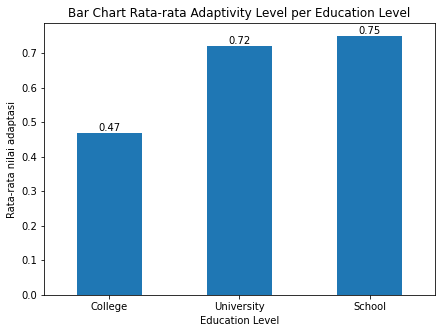

In [ ]:
remap = {'Low':0,'Moderate':1,'High':2}
data = df_eda[['Education Level','Adaptivity Level']].copy()
data['Adaptivity Level'] = data['Adaptivity Level'].apply(lambda x: remap[x])
p = data.groupby('Education Level').mean().round(2).sort_values('Adaptivity Level').plot(kind='bar', y='Adaptivity Level', 
                                                 figsize=(7,5), legend=None, rot=0,
                                                 title='Bar Chart Rata-rata Adaptivity Level per Education Level')
p.bar_label(p.containers[0])
p.set_ylabel('Rata-rata nilai adaptasi')
plt.show()

**Fasilitas yang digunakan oleh siswa di tiap tingkatan mulai terlihat lebih bervariasi dan beberapa menjadi lebih bagus sejak lulus sekolah**. Self Lms mulai banyak digunakan sejak universitas, gadget yang digunakan juga lebih bervariasi di universitas dibanding tingkatan lainnya, lebih banyak yang menggunakan wifi dan jaringan 4G sejak siswa tersebut mulai masuk college atau universitas

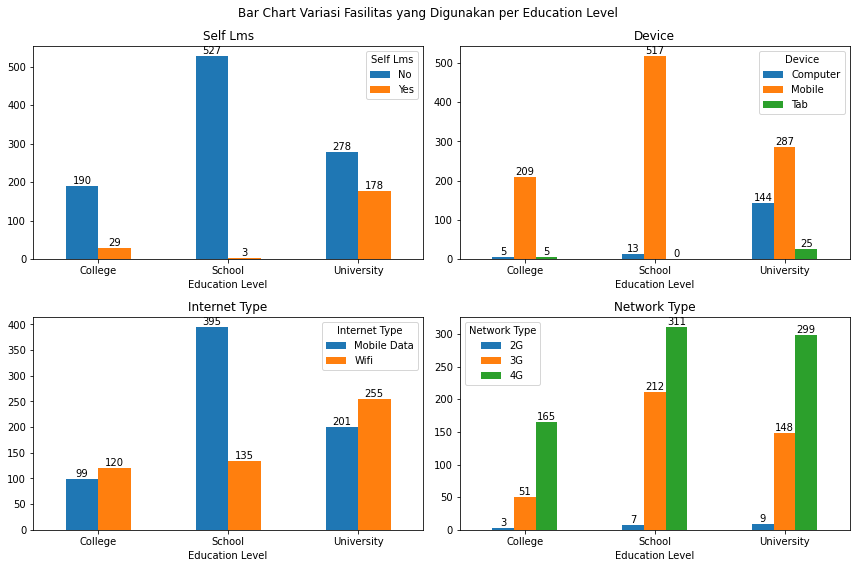

In [ ]:
kategori ='Education Level'
fig, ax = plt.subplots(2,2)
fig.set_size_inches(12,8)
data = df_eda[[kategori,'Self Lms','Device','Internet Type','Network Type']].copy()
for idx,col in enumerate(data.columns[1:]):
  data[[kategori,col]].groupby([kategori,col]).size().unstack(level=1) \
  .plot(kind='bar', rot=0, ax = ax[int(idx/2)][idx%2],title=f'{col}')
  for container in ax[int(idx/2)][idx%2].containers:
    ax[int(idx/2)][idx%2].bar_label(container)
plt.suptitle(f'Bar Chart Variasi Fasilitas yang Digunakan per {kategori}')
plt.tight_layout()
plt.show()

###Kondisi keuangan yang lebih baik membuat siswa lebih mudah beradaptasi

Semakin bagus kondisi keuangan seorang siswa, semakin mudah siswa tersebut beradaptasi. Hal ini dikarenakan kondisi keuangannya yang dapat membantunya memberikan fasilitas yang lebih banyak. Siswa yang kaya lebih mungkin untuk menggunakan Tab atau komputer yang membantu meningkatkan adaptasi mereka, internet yang mereka gunakan juga kebanyakan adalah wifi, dan dengan jaringan yang terbaik yaitu 4G. Selain dari itu, siswa yang kaya juga lebih banyak masuk ke universitas dibandingkan dengan college dikarenakan mereka mampu menanggung biayanya. Keuangan yang bagus juga membuat mereka tidak memiliki tingkat stres yang tinggi.


Rata-rata Adaptivity Level sangat terlihat berbeda jauh antara siswa kaya dan siswa dengan kondisi keuangan lainnya. Bahkan, rata-rata adaptivity level siswa kaya masih 2x lipat dari siswa yang Mid yang membuat terlihat sangat jelas bahwa **semakin bagus kondisi keuangan dari siswa tersebut, semakin mudah beradaptasi**

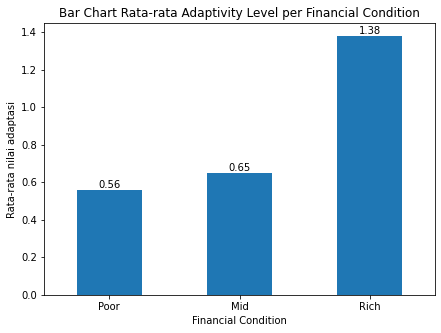

In [ ]:
remap = {'Low':0,'Moderate':1,'High':2}
data = df_eda[['Financial Condition','Adaptivity Level']].copy()
data['Adaptivity Level'] = data['Adaptivity Level'].apply(lambda x: remap[x])
p = data.groupby('Financial Condition').mean().round(2).sort_values('Adaptivity Level').plot(kind='bar', y='Adaptivity Level', 
                                                 figsize=(7,5), legend=None, rot=0,
                                                 title='Bar Chart Rata-rata Adaptivity Level per Financial Condition')
p.bar_label(p.containers[0])
p.set_ylabel('Rata-rata nilai adaptasi')
plt.show()

**Fasilitas yang digunakan untuk tiap tingkat kondisi keuangan berbeda**, gadget yang digunakan siswa yang kaya lebih bervariasi dibandingkan siswa lainnya yang masih kebanyakan menggunakan hp, jaringan yang digunakan oleh siswa kaya lebih dominan wifi daripada mobile data, dan hampir semua siswa kaya sudah menggunakan 4G dan tidak ada yang menggunakan 2G lagi.

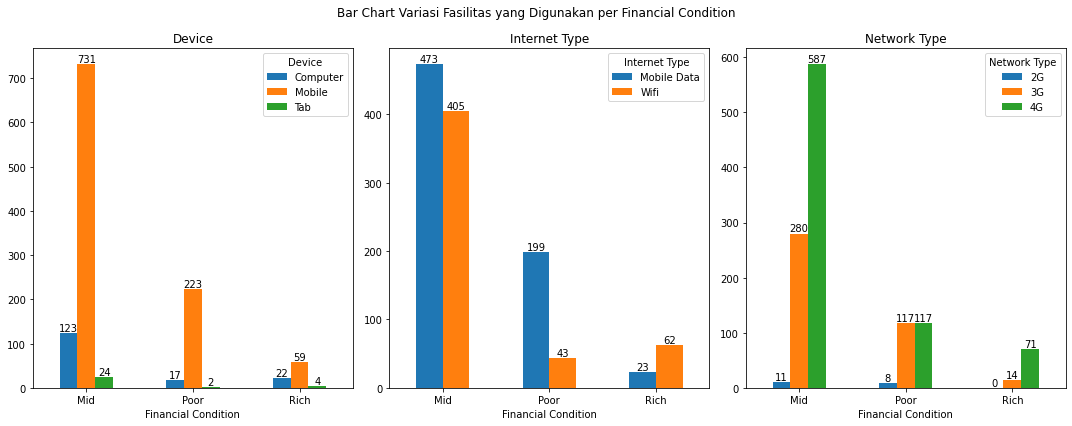

In [ ]:
kategori ='Financial Condition'
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15,6)
data = df_eda[[kategori,'Device','Internet Type','Network Type']].copy()
for idx,col in enumerate(data.columns[1:]):
  data[[kategori,col]].groupby([kategori,col]).size().unstack(level=1) \
  .plot(kind='bar', rot=0, ax = ax[idx],title=f'{col}')
  for container in ax[idx].containers:
    ax[idx].bar_label(container)
plt.suptitle(f'Bar Chart Variasi Fasilitas yang Digunakan per {kategori}')
plt.tight_layout()
plt.show()

Dari 85 siswa kaya yang ada di data, **hanya 2 yang melanjutkan pendidikannya ke college, sisanya ke universitas**. Hal ini bisa saja disebabkan siswa yang kaya lebih mampu dalam membayar pendidikan yang lebih baik dan dengan tingkatan lebih tinggi.

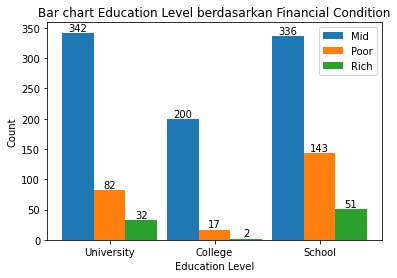

In [ ]:
cetakBar('Education Level','Financial Condition')

Dari semua data siswa yang memiliki tingkat pelepasan stres yang tinggi, **kategori siswa yang kondisi keuangannya kaya tidak muncul sama sekali**.

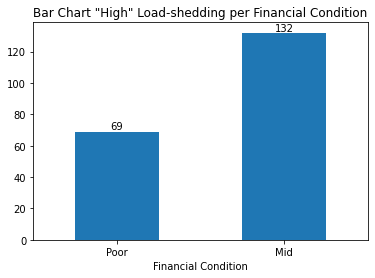

In [ ]:
data = df_eda.loc[df_eda['Load-shedding']=='High',['Financial Condition','Load-shedding']].copy()
p = data.groupby('Financial Condition').count().sort_values('Load-shedding').plot(kind='bar',rot=0,legend=None,title='Bar Chart "High" Load-shedding per Financial Condition')
p.bar_label(p.containers[0])
plt.show()

###Siswa yang miskin belum tentu tidak mampu masuk di institusi swasta

Walaupun terlihat bahwa kondisi keuangan bagus menjadi salah satu faktor penting dalam tingkat adaptasi, hal itu hanya dikarenakan mereka dapat memiliki fasilitas-fasilitas lebih bagus yang mendukung mereka. Siswa yang miskin pun masih dapat bersekolah di sekolah swasta walaupun kebanyakan hanya sebatas sekolah saja dan bukan college ataupun universitas dan ditambah lagi fasilitas yang mereka gunakan masih terbatas seperti menggunakan hp dan mobile data serta jaringan yang mereka gunakan masih seimbang antara 3G dan 4G.


**74.4% siswa miskin masih dapat berpendidikan di institusi swasta**. Walaupun begitu, kebanyakan siswa tersebut melaksanakan pendidikan sekolah mereka di swasta. **Saat ingin melanjutkan pendidikannya, banyak dari mereka masih tetap bergantung dengan institusi negeri**. Untungnya masih ada 46 siswa yang berhasil melanjutkan pendidikannya ke universitas swasta.

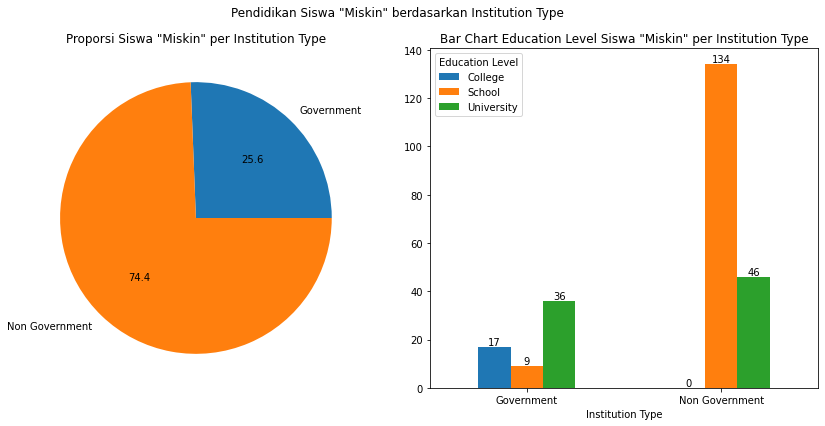

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,6)
data = df_eda.loc[df_eda['Financial Condition'] == 'Poor',['Financial Condition','Institution Type','Education Level']].copy()
data.groupby('Institution Type').count().plot(kind='pie',y='Financial Condition',autopct='%.1f',legend=None, ax=ax[0],
                                              ylabel='',title='Proporsi Siswa "Miskin" per Institution Type')
data[data.columns[1:]].groupby(['Institution Type','Education Level']).size().unstack(level=1).plot(kind='bar', rot=0, ax=ax[1],
                                                                                                    title='Bar Chart Education Level Siswa "Miskin" per Institution Type')
for container in ax[1].containers:
  ax[1].bar_label(container)
plt.suptitle('Pendidikan Siswa "Miskin" berdasarkan Institution Type')
plt.tight_layout()
plt.show()

**Fasilitas yang digunakan oleh siswa miskin masih terbatas untuk satu jenis di beberapa kategori fasilitas**. Misal untuk gadget yang digunakan kebanyakan masih menggunakan hp dan internet yang digunakan masih mobile data. Untungnya tipe jaringan yang digunakan sudah seimbang antara 3G dan 4G walaupun masih ada 8 orang yang masih menggunakan 2G

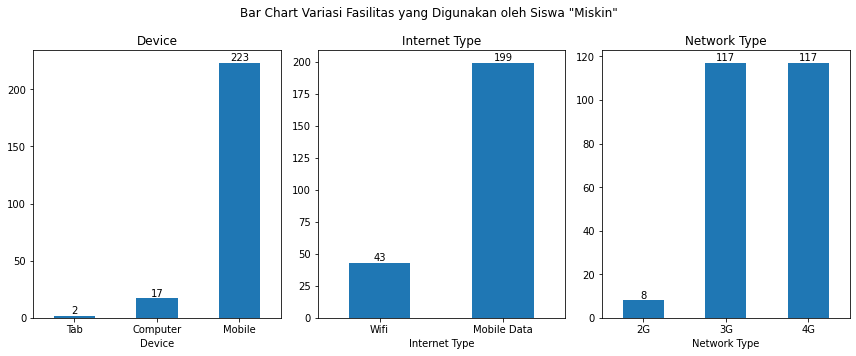

In [ ]:
kategori ='Financial Condition'
fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,5)
data = df_eda.loc[df_eda[kategori]=='Poor',[kategori,'Device','Internet Type','Network Type']].copy()
for idx,col in enumerate(data.columns[1:]):
  data[[kategori,col]].groupby(col).count().sort_values(kategori).plot(kind='bar',legend=None, rot=0, ax = ax[idx],title=f'{col}')
  for container in ax[idx].containers:
    ax[idx].bar_label(container)
plt.suptitle(f'Bar Chart Variasi Fasilitas yang Digunakan oleh Siswa "Miskin"')
plt.tight_layout()
plt.show()

###Tingginya kesenjangan kualitas pendidikan antara kota dan non kota 

Pendidikan di kota dan non kota memiliki perbedaan yang membuat kualitas Pendidikan di non kota lebih rendah dibandingkan Pendidikan di kota. **Kualitas Pendidikan yang rendah ini membuat siswa menjadi semakin susah beradaptasi di masa pandemi**. Mulai dari persebaran sekolah yang mana sekolah swasta sangat sedikit dibandingkan sekolah negeri yang membuat kebanyakan sekolah di wilayah non kota memiliki durasi kelas yang rendah hingga fasilitas yang tersedia di wilayah non kota masih terbatas seperti kurangnya institusi yang menyediakan LMS sendiri, kebanyakan masih menggunakan hp sebagai gadgetnya, dan lebih banyak menggunakan mobile data daripada wifi. Hal ini membuat siswa yang tinggal di non kota masih berkemungkinan lebih besar untuk memiliki tingkat pelepasan stress yang lebih tinggi dibanding siswa yang tinggal di kota.


Rata-rata class duration di wilayah kota lebih tinggi dibandingkan wilayah non kota, yang berarti terdapat pembuktian bahwa **pendidikan di wilayah non kota lebih buruk**

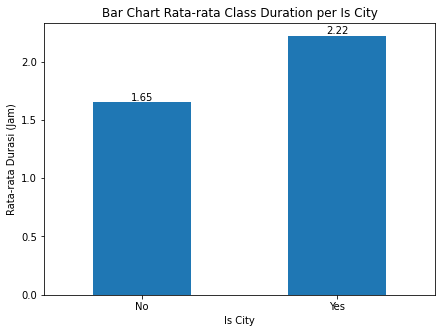

In [ ]:
#Rata-rata durasi berdasarkan is city
remap = {'0':0,'1-3':2,'3-6':4}
data = df_eda[['Is City','Class Duration']].copy()
data['Class Duration'] = data['Class Duration'].apply(lambda x: remap[x])
p = data.groupby('Is City').mean().round(2).sort_values('Class Duration').plot(kind='bar', y='Class Duration', 
                                                 figsize=(7,5), legend=None, rot=0,
                                                 title='Bar Chart Rata-rata Class Duration per Is City')
p.bar_label(p.containers[0])
p.set_ylabel('Rata-rata Durasi (Jam)')
plt.show()

**Fasilitas yang tersedia di wilayah non kota masih terbilang buruk untuk beberapa aspek**. Misalnya institusi yang masih kurang menyediakan LMS sendiri, gadget yang digunakan masih dominan hp, dan internet yang digunakan masih kebanyakan mobile data. Untungnya, jaringan 4G sudah tersedia dan banyak digunakan oleh siswa di wilayah non kota tetapi masih ada 14 siswa yang masih menggunakan 2G

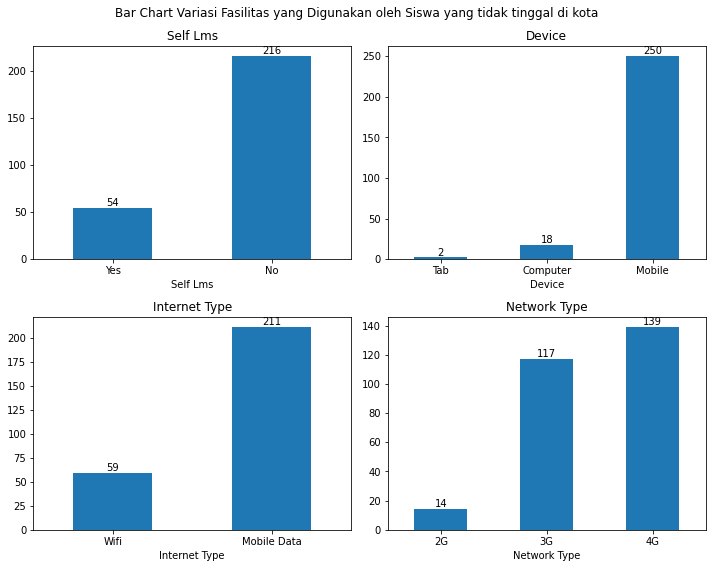

In [ ]:
kategori ='Is City'
fig, ax = plt.subplots(2,2)
fig.set_size_inches(10,8)
data = df_eda.loc[df_eda[kategori]=='No',[kategori,'Self Lms','Device','Internet Type','Network Type']].copy()
for idx,col in enumerate(data.columns[1:]):
  data[[kategori,col]].groupby(col).count().sort_values(kategori).plot(kind='bar',legend=None, rot=0, ax = ax[int(idx/2),idx%2],title=f'{col}')
  for container in ax[int(idx/2),idx%2].containers:
    ax[int(idx/2),idx%2].bar_label(container)
plt.suptitle(f'Bar Chart Variasi Fasilitas yang Digunakan oleh Siswa yang tidak tinggal di kota')
plt.tight_layout()
plt.show()

Walaupun siswa yang tinggal di non kota masih lebih banyak yang memiliki tingkat pelepasan stres yang rendah, rasio antar tingkat pelepasan stres untuk siswa yang tinggal di kota dan non kota sangat berbeda. **Siswa yang tinggal di kota lebih cenderung untuk memiliki tingkat pelepasan stres rendah dibandingkan siswa yang tinggal di non kota**

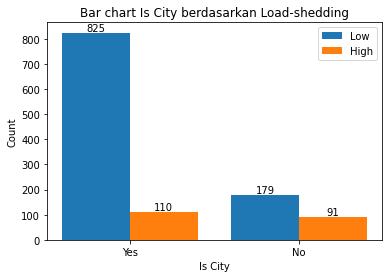

In [ ]:
cetakBar('Is City','Load-shedding')

# Data Preparation

Import seluruh library yang diperlukan

In [ ]:
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

Memisah label dari data dan disimpan dalam variabel target

In [ ]:
df = pd.read_csv("students_adaptability_level_online_education.csv")
target = df['Adaptivity Level']
df = df.drop('Adaptivity Level', axis=1)

Preprocessing yang digunakan pada fitur dataset adalah One-Hot Encoding agar representasi dari data kategorikal lebih ekspresif. One-Hot Encoding yang dibuat akan menyesuaikan berdasarkan dataset yang dimasukkan ke dalam fungsi fit()

In [ ]:
enc = OneHotEncoder()
enc.fit(df)

OneHotEncoder()

Untuk mengubah dataset berdasarkan penyesuaian sebelumnya, digunakanlah fungsi transform() dari One-Hot Encoding. Fungsi ini akan mengubah dataset dari DataFrame menjadi matriks.

Yang awalnya terdapat 14 kolom fitur, sekarang menjadi 35 kolom dikarenakan proses One-Hot Encoding

In [ ]:
x = enc.transform(df)
y = target.values
print(x.shape)

(1205, 35)


Melakukan Oversampling menggunakan SMOTE untuk mengatasi data yang imbalance. Oversampling adalah teknik untuk menyesuaikan distribusi dataset dengan menambahkan beberapa data acak dari kelas yang minoritas dan menambahkannya ke dataset.

In [ ]:
sm = SMOTE(random_state=2)
x_res, y_res = sm.fit_resample(x, y)

Hasil akhirnya adalah total data dalam dataset menjadi 1500. Terlihat bahwa ada penambahan data sejumlah 295.

Terakhir, data dipisah menjadi 2 jenis yaitu data latih dan data uji. Data latih digunakan untuk melatih model dan data uji berperan sebagai data asing bagi model untuk menguji apakah model yang dibuat memiliki akurasi yang baik atau tidak. Data dibagi dengan perbandingan 80:20 yang mana data latih sebesar 80% dan data uji sebesar 20%. Total terdapat 1125 baris data latih, dan 375 baris data uji.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res , test_size=0.2, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=0)
print ('Train set:', x_train.shape)
print ('Test set:', x_test.shape)

Train set: (1125, 35)
Test set: (375, 35)


Memasukkan data preprocessing ke dalam file csv

In [ ]:
Data_Preparation = df.to_csv('DataPreparation.csv')

# Data Modeling

## SVM

Support Vector Machine merupakan algoritma klasifikasi yang membagi data tersebut menjadi dua data yang berbeda dengan dibatasi oleh bidang miring atau hyperplane. 
Sebelumnya SVM ditujukan untuk mencari hyperplane terbaik dengan memaksimalkan jarak antar kelas. Hyperplane ini dapat memisahkan dua buah kelas dengan sebuah garis linear yang disebut sebagai decision boundary.

Hyperparameter yang di-tuning adalah C, kernel, gamma, dan random_state. 
Menggunakan Cross Validation = 10.

In [ ]:
# SVM
model_SVC = SVC()
grid_SVC = {'C': [0.1, 1, 10, 100],
        'kernel' : ["rbf", "poly", "sigmoid", "linear"],
        'gamma' : [1, 0.1, 'scale', 'auto'],
        'random_state':[1,51,101]}
clf_SVC = GridSearchCV(model_SVC, grid_SVC, scoring='accuracy', cv=10)
clf_SVC.fit(x_val, y_val)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 'scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
                         'random_state': [1, 51, 101]},
             scoring='accuracy')

In [ ]:
print(clf_SVC.best_params_)
print(clf_SVC.best_score_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 1}
0.869203413940256


hyperparameter terbaik yaitu C = 100, gamma = =.1, kernel = rbf, dan random_state=1 yang memberikan akurasi 86.9% pada data validasi.

Pembuatan Model

In [ ]:
model_SVC = SVC(gamma=clf_SVC.best_params_['gamma'], 
                C=clf_SVC.best_params_['C'], 
                kernel=clf_SVC.best_params_['kernel'],
                random_state = clf_SVC.best_params_['random_state'])
model_SVC.fit(x_train, y_train)
predict_SVC = model_SVC.predict(x_test)

Evaluasi

In [ ]:
print(classification_report(y_test, predict_SVC))

              precision    recall  f1-score   support

        High       0.88      0.98      0.93       127
         Low       0.89      0.93      0.91       120
    Moderate       0.93      0.78      0.85       128

    accuracy                           0.90       375
   macro avg       0.90      0.90      0.90       375
weighted avg       0.90      0.90      0.90       375



## Decision Tree

Decision Tree merupakan algoritma pembelajaran klasifikasi yang dapat digunakan untuk memprediksi atau klasifikasi

Hyperparameter yang di-tuning adalah criterion, splitter, min_samples_split, dan random_state. 
Menggunakan Cross Validation = 10.

In [ ]:
# Decision Tree Classifier
model_DT = DecisionTreeClassifier()
grid_DT = {'criterion': ["gini", "entropy"],
        'splitter' : ["best", "random"],
        'min_samples_split': [2, 3, 4, 5, 6],
        'random_state':[1,51,101]}
clf_DT = GridSearchCV(model_DT, grid_DT, scoring='accuracy', cv=10)
clf_DT.fit(x_val, y_val)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'random_state': [1, 51, 101],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
print(clf_DT.best_params_)
print(clf_DT.best_score_)

{'criterion': 'entropy', 'min_samples_split': 3, 'random_state': 51, 'splitter': 'random'}
0.8667852062588904


hyperparameter terbaik yaitu criterion = entropy, min_samples_split = 3, dan random_state = 51 yang memberikan akurasi 86.6% pada data validasi.

Pembuatan Model

In [ ]:
model_DT = DecisionTreeClassifier(criterion = clf_DT.best_params_['criterion'],
                                  splitter = clf_DT.best_params_['splitter'],  
                                  min_samples_split = clf_DT.best_params_['min_samples_split'],
                                  random_state = clf_DT.best_params_['random_state'])
model_DT.fit(x_train, y_train)
predict_DT = model_DT.predict(x_test)

Evaluasi

In [ ]:
print(classification_report(y_test, predict_DT))

              precision    recall  f1-score   support

        High       0.88      0.99      0.93       127
         Low       0.86      0.90      0.88       120
    Moderate       0.91      0.75      0.82       128

    accuracy                           0.88       375
   macro avg       0.88      0.88      0.88       375
weighted avg       0.88      0.88      0.88       375



## Random Forest

Random Forest adalah kumpulan dari decision tree atau pohon keputusan. Algoritma ini merupakan kombinasi masing-masing tree dari decision tree yang kemudian digabungkan menjadi satu model.

Hyperparameter yang di-tuning adalah criterion, n_estimator, min_samples_split, dan random_state. 
Menggunakan Cross Validation = 10.

In [ ]:
# Random Forest
model_RF = RandomForestClassifier()
grid = {'n_estimators':[50,100], 
        'criterion': ["gini", "entropy"],
        'min_samples_split': [2, 3, 4],
        'random_state':[1,51,101]}
clf_RF = GridSearchCV(model_RF, grid, scoring='accuracy', cv=10)
clf_RF.fit(x_val, y_val)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100],
                         'random_state': [1, 51, 101]},
             scoring='accuracy')

In [ ]:
print(clf_RF.best_params_)
print(clf_RF.best_score_)

{'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 51}
0.8585348506401138


hyperparameter terbaik yaitu criterion = entropy, min_samples_split = 2, n_estimators = 100, dan random_state = 51 yang memberikan akurasi 85.8% pada data validasi.

Pembuatan Model

In [ ]:
model_RF = RandomForestClassifier(criterion = clf_RF.best_params_['criterion'], 
                               min_samples_split = clf_RF.best_params_['min_samples_split'],
                               n_estimators = clf_RF.best_params_['n_estimators'],
                               random_state = clf_RF.best_params_['random_state'])
model_RF.fit(x_train, y_train)
predict_RF = model_RF.predict(x_test)

Evaluasi

In [ ]:
print(classification_report(y_test, predict_RF))

              precision    recall  f1-score   support

        High       0.88      1.00      0.94       127
         Low       0.89      0.93      0.91       120
    Moderate       0.94      0.78      0.85       128

    accuracy                           0.90       375
   macro avg       0.90      0.90      0.90       375
weighted avg       0.90      0.90      0.90       375



Grafik perbandingan akurasi antar penelitian kami dan penelitian referensi utama

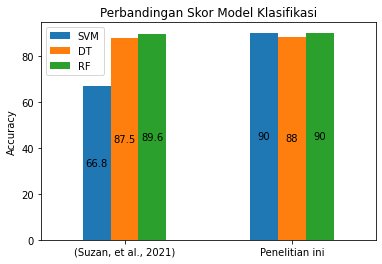

In [ ]:
score_df = pd.DataFrame({'SVM':[66.8,90.0],'DT':[87.5,88.0],'RF':[89.6,90.0]})
p = score_df.rename({0:'(Suzan, et al., 2021)',1:'Penelitian ini'},axis=0).plot(kind='bar',rot=0,title='Perbandingan Skor Model Klasifikasi',ylabel='Accuracy')
for con in p.containers:
  p.bar_label(con,label_type='center')
plt.show()

Pickle adalah sebuah modul pada standard library python, yang dapat digunakan untuk menyimpan dan membaca data ke dalam sebuah file

In [ ]:
pickle.dump(model_DT, open('model_Decision_Tree.pkl', 'wb'))
pickle.dump(model_SVC, open('model_SVM.pkl', 'wb'))
pickle.dump(model_RF, open('model_Random_Forest.pkl', 'wb'))
pickle.dump(enc, open('enc.pkl', 'wb'))